# Reading data

In [4]:
import numpy as np
import pandas as pd
import re
#============= Read CSV and apply data preperation =============#
df_train = pd.read_csv("./UNR_IDD_dataset/train.csv")
df_test=pd.read_csv("./UNR_IDD_dataset/test.csv")
df_val=pd.read_csv("./UNR_IDD_dataset/val.csv")

In [5]:
df_train

Switch ID Port Number  Received Packets  Received Bytes  \
0     of:0000000000000004     Port#:1               240           16586   
1     of:0000000000000004     Port#:2               158           20530   
2     of:0000000000000008     Port#:3              1930        37881404   
3     of:0000000000000001     Port#:4               903        18946410   
4     of:000000000000000b     Port#:1               423           29020   
...                   ...         ...               ...             ...   
2614  of:0000000000000008     Port#:1               646        18927937   
2615  of:000000000000000b     Port#:2              3149        25488846   
2616  of:000000000000000c     Port#:3               386         6324623   
2617  of:000000000000000c     Port#:2               807        12638724   
2618  of:0000000000000001     Port#:2               545         6338371   

      Sent Bytes  Sent Packets  Port alive Duration (S)  \
0       12622603           467                      126   
1          35464           376                      171   
2       67857371        414333                     1297   
3       17900326         98088                      176   
4       19138042          1562                     1451   
...          ...           ...                      ...   
2614       26139           253                      151   
2615    31784484          3205                     2326   
2616       13285            97                      101   
2617    25268608          1238                      366   
2618    12626198           497                      161   

      Delta Received Packets  Delta Received Bytes  Delta Sent Bytes  ...  \
0                          0                     0               280  ...   
1                          4                   556              3407  ...   
2                          0                     0               556  ...   
3                          3                   320            270280  ...   
4                          0                     0               560  ...   
...                      ...                   ...               ...  ...   
2614                       2                   278               278  ...   
2615                       4                   556               556  ...   
2616                      27                526635               556  ...   
2617                      47                  3379           3939658  ...   
2618                       2                   278               278  ...   

      Connection Point  Total Load/Rate  Total Load/Latest  Unknown Load/Rate  \
0                    1                0                  0                  0   
1                    2                0                  0                  0   
2                    2                0                  0                  0   
3                    3                0                  0                  0   
4                    1                0                  0                  0   
...                ...              ...                ...                ...   
2614                 4                0                  0                  0   
2615                 3                0                  0                  0   
2616                 2                0                  0                  0   
2617                 2           630355            6303550             630355   
2618                 4                0                  0                  0   

      Unknown Load/Latest  Latest bytes counter  Active Flow Entries  \
0                       0                     0                    4   
1                       0                     0                    5   
2                       0                     0                    8   
3                       0                     0                    8   
4                       0                     0                    4   
...                   ...                   ...                  ...   
2614

In [6]:
df_test

Switch ID Port Number  Received Packets  Received Bytes  \
0    of:0000000000000004     Port#:2               117           15705   
1    of:000000000000000a     Port#:4            349224        14743367   
2    of:000000000000000a     Port#:2               127            8855   
3    of:0000000000000005     Port#:3              1396        25241475   
4    of:000000000000000a     Port#:1                12            1016   
..                   ...         ...               ...             ...   
556  of:000000000000000c     Port#:1              2314        31679329   
557  of:0000000000000008     Port#:2              5923       101167794   
558  of:0000000000000001     Port#:1               472        12623572   
559  of:0000000000000005     Port#:3               253           26245   
560  of:000000000000000a     Port#:3               677        12635680   

     Sent Bytes  Sent Packets  Port alive Duration (S)  \
0         15537           113                      126   
1      38139845        156153                     1430   
2       6316408           271                       96   
3      31751210          2853                     2172   
4         13549           101                      101   
..          ...           ...                      ...   
556     6456143          1448                     1431   
557    19135198          2378                     2116   
558       24419           235                      136   
559       18904           147                      156   
560     6323665           375                       96   

     Delta Received Packets  Delta Received Bytes  Delta Sent Bytes  ...  \
0                         2                   278               348  ...   
1                         4                   556               560  ...   
2                         0                     0               280  ...   
3                       178               4992757              7565  ...   
4                         0                     0               556  ...   
..                      ...                   ...               ...  ...   
556                       2                   278               280  ...   
557                       4                   556               556  ...   
558                       2                   278               278  ...   
559                       6                   640               640  ...   
560                      47                  3525               280  ...   

     Connection Point  Total Load/Rate  Total Load/Latest  Unknown Load/Rate  \
0                   3                0                  0                  0   
1                   4                0                  0                  0   
2                   2                0                  0                  0   
3                   1                0                  0                  0   
4                   2                0                  0                  0   
..                ...              ...                ...                ...   
556                 5                0                  0                  0   
557                 2                0                  0                  0   
558                 2                0                  0                  0   
559                 2                0                  0                  0   
560                 3                0                  0                  0   

     Unknown Load/Latest  Latest bytes counter  Active Flow Entries  \
0                      0                     0                    6   
1                      0                     0                    4   
2                      0                     0                    6   
3                      0                     0                    8   
4                      0                     0                   10   
..                   ...                   ...                  ...   
556                    0                     0            

In [7]:
df_val

Switch ID Port Number  Received Packets  Received Bytes  \
0    of:000000000000000a     Port#:1              2594        75671796   
1    of:0000000000000002     Port#:1                10             856   
2    of:000000000000000a     Port#:3              2192        12805806   
3    of:0000000000000002     Port#:1               401         6327186   
4    of:0000000000000002     Port#:1              3799        82050574   
..                   ...         ...               ...             ...   
556  of:0000000000000005     Port#:3               133            9251   
557  of:000000000000000a     Port#:4              1216        31540813   
558  of:000000000000000b     Port#:2              1736        19039951   
559  of:000000000000000b     Port#:2            187954        52149755   
560  of:0000000000000008     Port#:2              3820        88336200   

     Sent Bytes  Sent Packets  Port alive Duration (S)  \
0      31757809          3308                     1672   
1          9732            74                       61   
2      31695352          2412                     1566   
3         24401           240                      131   
4      88575612          5526                     2547   
..          ...           ...                      ...   
556     6317978           286                      106   
557    36309076        413180                     1037   
558     6408719          1005                     1071   
559    55635486        121662                     2560   
560    82333704          5849                     3237   

     Delta Received Packets  Delta Received Bytes  Delta Sent Bytes  ...  \
0                         0                     0               560  ...   
1                         0                     0               348  ...   
2                        57               1839337              2615  ...   
3                        85                  6316               759  ...   
4                         0                     0               556  ...   
..                      ...                   ...               ...  ...   
556                       0                     0               560  ...   
557                      80                  5557           6171245  ...   
558                       3                   348               280  ...   
559                       2                   280               280  ...   
560                       0                     0               560  ...   

     Connection Point  Total Load/Rate  Total Load/Latest  Unknown Load/Rate  \
0                   2                0                  0                  0   
1                   2                0                  0                  0   
2                   2                0                  0                  0   
3                   4                0                  0                  0   
4                   1                0                  0                  0   
..                ...              ...                ...                ...   
556                 1                0                  0                  0   
557                 2                0                  0                  0   
558                 5                0                  0                  0   
559                 2                0                  0                  0   
560                 2                0                  0                  0   

     Unknown Load/Latest  Latest bytes counter  Active Flow Entries  \
0                      0                     0                    6   
1                      0                     0                    8   
2                      0                     0                    6   
3                      0                     0                    6   
4                      0                     0                    4   
..                   ...                   ...                  ...   
556                    0                     0            

# Number of instances per class

In [8]:
label_list=[]
label_list=df_train['Label'].unique()


In [9]:
label_list

array(['TCP-SYN', 'Normal', 'PortScan', 'Overflow', 'Diversion',
       'Blackhole'], dtype=object)

In [10]:
l0=(len(df_train[df_train['Label'] == 'TCP-SYN']))
l1=(len(df_train[df_train['Label'] == 'Normal']))
l2=(len(df_train[df_train['Label'] == 'Overflow']))
l3=(len(df_train[df_train['Label'] == 'PortScan']))
l4=(len(df_train[df_train['Label'] == 'Diversion']))
l5=(len(df_train[df_train['Label'] == 'Blackhole']))
my_list=[]
my_list.append(l0)
my_list.append(l1)
my_list.append(l2)
my_list.append(l3)
my_list.append(l4)
my_list.append(l5)

In [11]:
my_list

[651, 254, 73, 666, 414, 561]

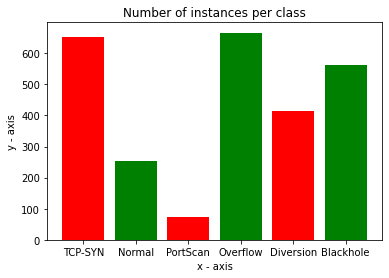

In [12]:
import matplotlib.pyplot as plt
  
# plotting a bar chart
plt.bar(label_list, my_list,
        width = 0.8, color = ['red', 'green'])
  
# naming the x-axis
plt.xlabel('x - axis')
# naming the y-axis
plt.ylabel('y - axis')
# plot title
plt.title('Number of instances per class')
  
# function to show the plot
plt.show()

Find Null Values

In [13]:
feature_list=[]
null_list=[]


In [14]:
for (columnName, columnData) in df_train.iteritems():
    #print('Column Name : ', columnName)
    feature_list.append(columnName)
    null_list.append(df_train[columnName].isnull().sum())
    #print(df_train[columnName].isnull().sum())

Detect outliers

Getting Number of possible outliers 

In [3]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [ ]:
df_train

Switch ID Port Number  Received Packets  Received Bytes  \
0     of:0000000000000004     Port#:1               240           16586   
1     of:0000000000000004     Port#:2               158           20530   
2     of:0000000000000008     Port#:3              1930        37881404   
3     of:0000000000000001     Port#:4               903        18946410   
4     of:000000000000000b     Port#:1               423           29020   
...                   ...         ...               ...             ...   
2614  of:0000000000000008     Port#:1               646        18927937   
2615  of:000000000000000b     Port#:2              3149        25488846   
2616  of:000000000000000c     Port#:3               386         6324623   
2617  of:000000000000000c     Port#:2               807        12638724   
2618  of:0000000000000001     Port#:2               545         6338371   

      Sent Bytes  Sent Packets  Port alive Duration (S)  \
0       12622603           467                      126   
1          35464           376                      171   
2       67857371        414333                     1297   
3       17900326         98088                      176   
4       19138042          1562                     1451   
...          ...           ...                      ...   
2614       26139           253                      151   
2615    31784484          3205                     2326   
2616       13285            97                      101   
2617    25268608          1238                      366   
2618    12626198           497                      161   

      Delta Received Packets  Delta Received Bytes  Delta Sent Bytes  ...  \
0                          0                     0               280  ...   
1                          4                   556              3407  ...   
2                          0                     0               556  ...   
3                          3                   320            270280  ...   
4                          0                     0               560  ...   
...                      ...                   ...               ...  ...   
2614                       2                   278               278  ...   
2615                       4                   556               556  ...   
2616                      27                526635               556  ...   
2617                      47                  3379           3939658  ...   
2618                       2                   278               278  ...   

      Connection Point  Total Load/Rate  Total Load/Latest  Unknown Load/Rate  \
0                    1                0                  0                  0   
1                    2                0                  0                  0   
2                    2                0                  0                  0   
3                    3                0                  0                  0   
4                    1                0                  0                  0   
...                ...              ...                ...                ...   
2614                 4                0                  0                  0   
2615                 3                0                  0                  0   
2616                 2                0                  0                  0   
2617                 2           630355            6303550             630355   
2618                 4                0                  0                  0   

      Unknown Load/Latest  Latest bytes counter  Active Flow Entries  \
0                       0                     0                    4   
1                       0                     0                    5   
2                       0                     0                    8   
3                       0                     0                    8   
4                       0                     0                    4   
...                   ...                   ...                  ...   
2614

In [7]:
feat_list=feature_list[2:-1]
feat_list

['Received Packets',
 'Received Bytes',
 'Sent Bytes',
 'Sent Packets',
 'Port alive Duration (S)',
 'Delta Received Packets',
 'Delta Received Bytes',
 'Delta Sent Bytes',
 'Delta Sent Packets',
 'Delta Port alive Duration (S)',
 'Connection Point',
 'Total Load/Rate',
 'Total Load/Latest',
 'Unknown Load/Rate',
 'Unknown Load/Latest',
 'Latest bytes counter',
 'Active Flow Entries',
 'Packets Looked Up',
 'Packets Matched']

In [8]:
outliers_list=[]
outliers_list.append((len(find_outliers_IQR(df_train['Received Packets']))))
outliers_list.append((len(find_outliers_IQR(df_train['Received Bytes']))))
outliers_list.append((len(find_outliers_IQR(df_train['Sent Bytes']))))
outliers_list.append((len(find_outliers_IQR(df_train['Sent Packets']))))
outliers_list.append((len(find_outliers_IQR(df_train['Port alive Duration (S)']))))
outliers_list.append((len(find_outliers_IQR(df_train['Delta Received Packets']))))
outliers_list.append((len(find_outliers_IQR(df_train['Delta Received Bytes']))))
outliers_list.append((len(find_outliers_IQR(df_train['Delta Sent Bytes']))))
outliers_list.append((len(find_outliers_IQR(df_train['Delta Sent Packets']))))
outliers_list.append((len(find_outliers_IQR(df_train['Delta Port alive Duration (S)']))))
outliers_list.append((len(find_outliers_IQR(df_train['Connection Point']))))
outliers_list.append((len(find_outliers_IQR(df_train['Total Load/Rate']))))
outliers_list.append((len(find_outliers_IQR(df_train['Total Load/Latest']))))
outliers_list.append((len(find_outliers_IQR(df_train['Unknown Load/Rate']))))
outliers_list.append((len(find_outliers_IQR(df_train['Unknown Load/Latest']))))
outliers_list.append((len(find_outliers_IQR(df_train['Latest bytes counter']))))
outliers_list.append((len(find_outliers_IQR(df_train['Active Flow Entries']))))
outliers_list.append((len(find_outliers_IQR(df_train['Packets Looked Up']))))
outliers_list.append((len(find_outliers_IQR(df_train['Packets Matched']))))
feat_list=feature_list[2:-1]


In [9]:
outliers_list

[312,
 186,
 222,
 379,
 0,
 649,
 648,
 604,
 604,
 441,
 0,
 396,
 501,
 396,
 501,
 396,
 152,
 536,
 536]

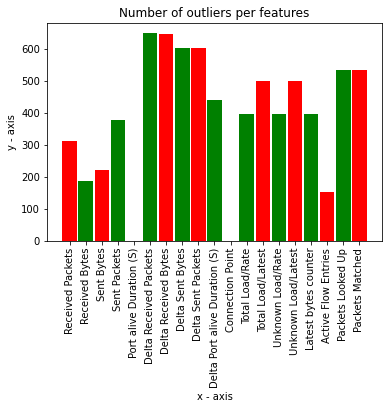

In [10]:
import matplotlib.pyplot as plt
  
# plotting a bar chart
plt.bar(feat_list, outliers_list,
        width = 0.9, color = ['red', 'green'])
  
# naming the x-axis
plt.xlabel('x - axis')
# naming the y-axis
plt.ylabel('y - axis')
# plot title
plt.title('Number of outliers per features')
plt.xticks(rotation = 90)  
# function to show the plot
plt.show()

In [ ]:
for (columnName, columnData) in df_train.iteritems():
    if df_train[columnName]=='Switch ID'  :
       continue
    outliers = find_outliers_IQR(df_train[columnName])
    outliers_list.append(str(len(outliers)))
   

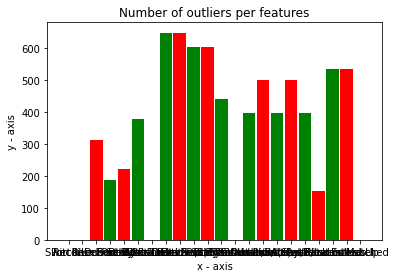

In [ ]:
import matplotlib.pyplot as plt
  
# plotting a bar chart
plt.bar(feature_list, outliers_list,
        width = 0.9, color = ['red', 'green'])
  
# naming the x-axis
plt.xlabel('x - axis')
# naming the y-axis
plt.ylabel('y - axis')
# plot title
plt.title('Number of outliers per features')
  
# function to show the plot
plt.show()

Basic statistical analysis for every feature (mean, std, min, max)


In [ ]:
df_train.max()


Switch ID                        of:000000000000000c
Port Number                                  Port#:4
Received Packets                              352584
Received Bytes                             258942192
Sent Bytes                                 213072768
Sent Packets                                  420806
Port alive Duration (S)                         3317
Delta Received Packets                         15588
Delta Received Bytes                         6171714
Delta Sent Bytes                             6302910
Delta Sent Packets                             15593
Delta Port alive Duration (S)                      5
Connection Point                                   5
Total Load/Rate                              1260657
Total Load/Latest                           12753863
Unknown Load/Rate                            1260657
Unknown Load/Latest                         12753863
Latest bytes counter                         1260657
Active Flow Entries                           

In [ ]:
df_train.min()

Switch ID                        of:0000000000000001
Port Number                                  Port#:1
Received Packets                                  10
Received Bytes                                   856
Sent Bytes                                      6025
Sent Packets                                      44
Port alive Duration (S)                           26
Delta Received Packets                             0
Delta Received Bytes                               0
Delta Sent Bytes                                 278
Delta Sent Packets                                 2
Delta Port alive Duration (S)                      4
Connection Point                                   1
Total Load/Rate                              -644624
Total Load/Latest                                  0
Unknown Load/Rate                            -644624
Unknown Load/Latest                                0
Latest bytes counter                         -644624
Active Flow Entries                           

In [ ]:
df_train.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Received Packets                 1.992910e+04
Received Bytes                   2.606639e+07
Sent Bytes                       2.372645e+07
Sent Packets                     3.367657e+04
Port alive Duration (S)          8.905391e+02
Delta Received Packets           1.749488e+02
Delta Received Bytes             3.254661e+05
Delta Sent Bytes                 2.957171e+05
Delta Sent Packets               1.606079e+02
Delta Port alive Duration (S)    4.831615e+00
Connection Point                 2.450935e+00
Total Load/Rate                  2.044276e+04
Total Load/Latest                5.033087e+05
Unknown Load/Rate                2.044276e+04
Unknown Load/Latest              5.033087e+05
Latest bytes counter             2.044276e+04
Active Flow Entries              9.497289e+01
Packets Looked Up                9.920463e+04
Packets Matched                  9.908445e+04
dtype: float64

In [ ]:
df_train.std()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Received Packets                 6.181786e+04
Received Bytes                   3.670801e+07
Sent Bytes                       3.309908e+07
Sent Packets                     9.056515e+04
Port alive Duration (S)          9.709168e+02
Delta Received Packets           1.028908e+03
Delta Received Bytes             1.166624e+06
Delta Sent Bytes                 1.107859e+06
Delta Sent Packets               9.724840e+02
Delta Port alive Duration (S)    3.742792e-01
Connection Point                 1.159286e+00
Total Load/Rate                  1.141013e+05
Total Load/Latest                1.796231e+06
Unknown Load/Rate                1.141013e+05
Unknown Load/Latest              1.796231e+06
Latest bytes counter             1.141013e+05
Active Flow Entries              8.281811e+02
Packets Looked Up                2.363175e+05
Packets Matched                  2.363162e+05
dtype: float64

#Label Encoding

In [15]:
# Importing LabelEncoder from Sklearn
# library from preprocessing Module.
from sklearn.preprocessing import LabelEncoder
 
# Creating a instance of label Encoder.
le = LabelEncoder()
 
b1 = le.fit_transform(df_train['Port Number'])
b2 = le.fit_transform(df_train['Switch ID'])
label = le.fit_transform(df_train['Label'])
df_train['Port Number']=b1
df_train['Switch ID']=b2
df_train["Label"] = label
 

In [ ]:
df_train

Switch ID  Port Number  Received Packets  Received Bytes  Sent Bytes  \
0             3            0               240           16586    12622603   
1             3            1               158           20530       35464   
2             7            2              1930        37881404    67857371   
3             0            3               903        18946410    17900326   
4            10            0               423           29020    19138042   
...         ...          ...               ...             ...         ...   
2614          7            0               646        18927937       26139   
2615         10            1              3149        25488846    31784484   
2616         11            2               386         6324623       13285   
2617         11            1               807        12638724    25268608   
2618          0            1               545         6338371    12626198   

      Sent Packets  Port alive Duration (S)  Delta Received Packets  \
0              467                      126                       0   
1              376                      171                       4   
2           414333                     1297                       0   
3            98088                      176                       3   
4             1562                     1451                       0   
...            ...                      ...                     ...   
2614           253                      151                       2   
2615          3205                     2326                       4   
2616            97                      101                      27   
2617          1238                      366                      47   
2618           497                      161                       2   

      Delta Received Bytes  Delta Sent Bytes  ...  Connection Point  \
0                        0               280  ...                 1   
1                      556              3407  ...                 2   
2                        0               556  ...                 2   
3                      320            270280  ...                 3   
4                        0               560  ...                 1   
...                    ...               ...  ...               ...   
2614                   278               278  ...                 4   
2615                   556               556  ...                 3   
2616                526635               556  ...                 2   
2617                  3379           3939658  ...                 2   
2618                   278               278  ...                 4   

      Total Load/Rate  Total Load/Latest  Unknown Load/Rate  \
0                   0                  0                  0   
1                   0                  0                  0   
2                   0                  0                  0   
3                   0                  0                  0   
4                   0                  0                  0   
...               ...                ...                ...   
2614                0                  0                  0   
2615                0                  0                  0   
2616                0                  0                  0   
2617           630355            6303550             630355   
2618                0                  0                  0   

      Unknown Load/Latest  Latest bytes counter  Active Flow Entries  \
0                       0                     0                    4   
1                       0                     0                    5   
2                       0                     0                    8   
3                       0                     0                    8   
4                       0                     0                    4   
...                   ...                   ...                  ...   
2614                    0                     0                    6   
2615                    0     

In [16]:
b_test1 = le.fit_transform(df_test['Port Number'])
b_test2 = le.fit_transform(df_test['Switch ID'])
label2 = le.fit_transform(df_test['Label'])
df_test['Port Number']=b_test1
df_test['Switch ID']=b_test2
df_test["Label"] = label2

In [ ]:
df_test

Switch ID  Port Number  Received Packets  Received Bytes  Sent Bytes  \
0            3            1               117           15705       15537   
1            9            3            349224        14743367    38139845   
2            9            1               127            8855     6316408   
3            4            2              1396        25241475    31751210   
4            9            0                12            1016       13549   
..         ...          ...               ...             ...         ...   
556         11            0              2314        31679329     6456143   
557          7            1              5923       101167794    19135198   
558          0            0               472        12623572       24419   
559          4            2               253           26245       18904   
560          9            2               677        12635680     6323665   

     Sent Packets  Port alive Duration (S)  Delta Received Packets  \
0             113                      126                       2   
1          156153                     1430                       4   
2             271                       96                       0   
3            2853                     2172                     178   
4             101                      101                       0   
..            ...                      ...                     ...   
556          1448                     1431                       2   
557          2378                     2116                       4   
558           235                      136                       2   
559           147                      156                       6   
560           375                       96                      47   

     Delta Received Bytes  Delta Sent Bytes  ...  Connection Point  \
0                     278               348  ...                 3   
1                     556               560  ...                 4   
2                       0               280  ...                 2   
3                 4992757              7565  ...                 1   
4                       0               556  ...                 2   
..                    ...               ...  ...               ...   
556                   278               280  ...                 5   
557                   556               556  ...                 2   
558                   278               278  ...                 2   
559                   640               640  ...                 2   
560                  3525               280  ...                 3   

     Total Load/Rate  Total Load/Latest  Unknown Load/Rate  \
0                  0                  0                  0   
1                  0                  0                  0   
2                  0                  0                  0   
3                  0                  0                  0   
4                  0                  0                  0   
..               ...                ...                ...   
556                0                  0                  0   
557                0                  0                  0   
558                0                  0                  0   
559                0                  0                  0   
560                0                  0                  0   

     Unknown Load/Latest  Latest bytes counter  Active Flow Entries  \
0                      0                     0                    6   
1                      0                     0                    4   
2                      0                     0                    6   
3                      0                     0                    8   
4                      0                     0                   10   
..                   ...                   ...                  ...   
556                    0                     0                    8   
557                    0                     0                    8   
558           

In [17]:
b_val1 = le.fit_transform(df_val['Port Number'])
b_val2 = le.fit_transform(df_val['Switch ID'])
label3 = le.fit_transform(df_val['Label'])
df_val['Port Number']=b_val1
df_val['Switch ID']=b_val2
df_val["Label"] = label3

In [ ]:
df_val

Switch ID  Port Number  Received Packets  Received Bytes  Sent Bytes  \
0            9            0              2594        75671796    31757809   
1            1            0                10             856        9732   
2            9            2              2192        12805806    31695352   
3            1            0               401         6327186       24401   
4            1            0              3799        82050574    88575612   
..         ...          ...               ...             ...         ...   
556          4            2               133            9251     6317978   
557          9            3              1216        31540813    36309076   
558         10            1              1736        19039951     6408719   
559         10            1            187954        52149755    55635486   
560          7            1              3820        88336200    82333704   

     Sent Packets  Port alive Duration (S)  Delta Received Packets  \
0            3308                     1672                       0   
1              74                       61                       0   
2            2412                     1566                      57   
3             240                      131                      85   
4            5526                     2547                       0   
..            ...                      ...                     ...   
556           286                      106                       0   
557        413180                     1037                      80   
558          1005                     1071                       3   
559        121662                     2560                       2   
560          5849                     3237                       0   

     Delta Received Bytes  Delta Sent Bytes  ...  Connection Point  \
0                       0               560  ...                 2   
1                       0               348  ...                 2   
2                 1839337              2615  ...                 2   
3                    6316               759  ...                 4   
4                       0               556  ...                 1   
..                    ...               ...  ...               ...   
556                     0               560  ...                 1   
557                  5557           6171245  ...                 2   
558                   348               280  ...                 5   
559                   280               280  ...                 2   
560                     0               560  ...                 2   

     Total Load/Rate  Total Load/Latest  Unknown Load/Rate  \
0                  0                  0                  0   
1                  0                  0                  0   
2                  0                  0                  0   
3                  0                  0                  0   
4                  0                  0                  0   
..               ...                ...                ...   
556                0                  0                  0   
557                0                  0                  0   
558                0                  0                  0   
559                0                  0                  0   
560                0                  0                  0   

     Unknown Load/Latest  Latest bytes counter  Active Flow Entries  \
0                      0                     0                    6   
1                      0                     0                    8   
2                      0                     0                    6   
3                      0                     0                    6   
4                      0                     0                    4   
..                   ...                   ...                  ...   
556                    0                     0                    8   
557                    0                     0                    6   
558           

# Splitting the Data 

In [18]:
X_train=df_train.iloc[:,:-1]
y_train=df_train.iloc[: , -1]

X_test=df_test.iloc[:,:-1]
y_test=df_test.iloc[: , -1]

X_val=df_val.iloc[:,:-1]
y_val=df_val.iloc[: , -1]

In [ ]:
y_test

0      5
1      2
2      5
3      0
4      5
      ..
556    1
557    0
558    5
559    5
560    4
Name: Label, Length: 561, dtype: int32

In [ ]:
X_test.shape

(561, 21)

In [ ]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))
print(len(X_val))
print(len(y_val))

2619
2619
561
561
561
561


# Data Normalization

In [19]:
def data_normalization(df):
  # copy the data
  df_max_scaled = df.copy()
  
  # apply normalization techniques
  for column in df_max_scaled.columns:
     df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max()
      
  # view normalized data
  return(df_max_scaled)
  
  

In [20]:
X_train=data_normalization(X_train)
X_test=data_normalization(X_test)
X_val=data_normalization(X_val)

In [21]:
X_train

Switch ID  Port Number  Received Packets  Received Bytes  Sent Bytes  \
0      0.272727     0.000000          0.000681        0.000064    0.059241   
1      0.272727     0.333333          0.000448        0.000079    0.000166   
2      0.636364     0.666667          0.005474        0.146293    0.318470   
3      0.000000     1.000000          0.002561        0.073168    0.084010   
4      0.909091     0.000000          0.001200        0.000112    0.089819   
...         ...          ...               ...             ...         ...   
2614   0.636364     0.000000          0.001832        0.073097    0.000123   
2615   0.909091     0.333333          0.008931        0.098435    0.149172   
2616   1.000000     0.666667          0.001095        0.024425    0.000062   
2617   1.000000     0.333333          0.002289        0.048809    0.118591   
2618   0.000000     0.333333          0.001546        0.024478    0.059258   

      Sent Packets  Port alive Duration (S)  Delta Received Packets  \
0         0.001110                 0.037986                0.000000   
1         0.000894                 0.051553                0.000257   
2         0.984618                 0.391016                0.000000   
3         0.233096                 0.053060                0.000192   
4         0.003712                 0.437443                0.000000   
...            ...                      ...                     ...   
2614      0.000601                 0.045523                0.000128   
2615      0.007616                 0.701236                0.000257   
2616      0.000231                 0.030449                0.001732   
2617      0.002942                 0.110341                0.003015   
2618      0.001181                 0.048538                0.000128   

      Delta Received Bytes  Delta Sent Bytes  ...  \
0                 0.000000          0.000044  ...   
1                 0.000090          0.000541  ...   
2                 0.000000          0.000088  ...   
3                 0.000052          0.042882  ...   
4                 0.000000          0.000089  ...   
...                    ...               ...  ...   
2614              0.000045          0.000044  ...   
2615              0.000090          0.000088  ...   
2616              0.085330          0.000088  ...   
2617              0.000547          0.625054  ...   
2618              0.000045          0.000044  ...   

      Delta Port alive Duration (S)  Connection Point  Total Load/Rate  \
0                               1.0               0.2         0.000000   
1                               1.0               0.4         0.000000   
2                               1.0               0.4         0.000000   
3                               0.8               0.6         0.000000   
4                               1.0               0.2         0.000000   
...                             ...               ...              ...   
2614                            1.0               0.8         0.000000   
2615                            1.0               0.6         0.000000   
2616                            0.8               0.4         0.000000   
2617                            1.0               0.4         0.500021   
2618                            1.0               0.8         0.000000   

      Total Load/Latest  Unknown Load/Rate  Unknown Load/Latest  \
0              0.000000           0.000000             0.000000   
1              0.000000           0.000000             0.000000   
2              0.000000           0.000000             0.000000   
3              0.000000           0.000000             0.000000   
4              0.000000           0.000000             0.000000   
...                 ...                ...                  ...   
2614           0.000000           0.000000             0.000000   
2615           0.000000           0.000000             0.000000   
2616           0.000000           0.000000             0.000000   
2617           0.494

In [33]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))
print(len(X_val))
print(len(y_val))

2619
2619
561
561
561
561


In [ ]:
y_train.unique()

array([5, 2, 4, 3, 1, 0])

# MLP

Build an MLP classifier using the provided dataset and the following parameters: 				(4 marks)
1 hidden layers with 10 neurons
Relu activation function 
Use AdamW optimizer and set the learning rate as 0.001
of epochs=500
Batch size =1


In [26]:
# import required packages
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras
# make it easier to understand by importing the required libraries within keras
from tensorflow.keras.layers import Dense, Flatten
from statistics import mean
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [29]:
!pip install keras

  Using cached keras-2.9.0-py2.py3-none-any.whl (1.6 MB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.6.0 requires clang~=5.0, which is not installed.
tensorflow 2.6.0 requires flatbuffers~=1.12, but you have flatbuffers 20210226132247 which is incompatible.


In [17]:
# define the model type (still empty)
mlp = keras.models.Sequential()


mlp.add(Flatten(input_shape=(21,)))


mlp.add(Dense(10, activation='relu', input_shape=(21*21,)))

# add the output layer with 6 units and Softmax activation function
mlp.add(Dense(6, activation='softmax'))


In [ ]:
print(mlp.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 21)                0         
                                                                 
 dense (Dense)               (None, 10)                220       
                                                                 
 dense_1 (Dense)             (None, 6)                 66        
                                                                 
Total params: 286
Trainable params: 286
Non-trainable params: 0
_________________________________________________________________
None


In [30]:
!pip install tensorflow-addons
!pip install tensorflow==2.2.0-rc3

ERROR: Could not find a version that satisfies the requirement tensorflow==2.2.0-rc3 (from versions: 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.5, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.7.2, 2.7.3, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.10.0rc0)
ERROR: No matching distribution found for tensorflow==2.2.0-rc3


In [31]:
from keras.layers import Dense
#Lw tensor flow

import tensorflow_addons as tfa

ImportError: cannot import name 'dtensor' from 'tensorflow.compat.v2.experimental' (c:\Users\river\anaconda3\envs\tf\lib\site-packages\tensorflow\_api\v2\compat\v2\experimental\__init__.py)

In [20]:
optimizer = tfa.optimizers.AdamW(learning_rate=0.001, weight_decay=0.001)
mlp.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

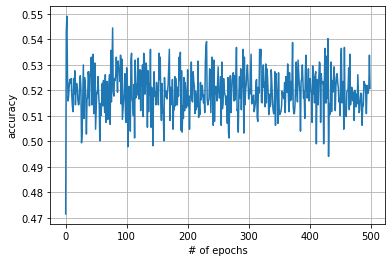

In [ ]:
h_baseline = mlp.fit(X_train, y_train, epochs=500, batch_size=1, verbose=0)

# plot the training accuracy
plt.plot(h_baseline.history['accuracy'])
plt.xlabel("# of epochs")
plt.ylabel("accuracy")
plt.grid()

In [ ]:
baseline_acc=h_baseline.history['accuracy']
print(baseline_acc)

[0.4715540409088135, 0.5429553389549255, 0.5490645170211792, 0.5253913998603821, 0.5158457159996033, 0.5181366801261902, 0.522718608379364, 0.5242459177970886, 0.522718608379364, 0.5246277451515198, 0.5181366801261902, 0.5139366388320923, 0.5116456747055054, 0.5246277451515198, 0.5185185074806213, 0.5276823043823242, 0.5143184661865234, 0.5208094716072083, 0.522718608379364, 0.5211912989616394, 0.5162275433540344, 0.5143184661865234, 0.5147002935409546, 0.5231004357337952, 0.5257731676101685, 0.5208094716072083, 0.49942725896835327, 0.5032455325126648, 0.5169911980628967, 0.5299732685089111, 0.5089728832244873, 0.5250095725059509, 0.522718608379364, 0.5181366801261902, 0.5028637051582336, 0.5166093707084656, 0.5169911980628967, 0.5273004770278931, 0.5242459177970886, 0.5139366388320923, 0.5273004770278931, 0.5273004770278931, 0.5330278873443604, 0.5143184661865234, 0.5181366801261902, 0.5341733694076538, 0.5108820199966431, 0.5223367810249329, 0.5307369232177734, 0.5047728419303894, 0.

Callbacks & getting losses

In [ ]:
import tensorflow as tf
from tensorflow import keras
class EvaluateEpochEnd(tf.keras.callbacks.Callback):
    def __init__(self, test_data):
        self.test_data = test_data

    def on_epoch_end(self, epoch, logs={}):
        x, y = self.test_data
        scores = self.model.evaluate(x, y, verbose=False)
        print('\nTesting loss: {}, accuracy: {}\n'.format(scores[0], scores[1]))

In [ ]:
h_train=mlp.fit(X_train, y_train, epochs=500, batch_size=1, verbose=0, callbacks=[EvaluateEpochEnd((X_test, y_test))])


Testing loss: 1.3862067461013794, accuracy: 0.4545454680919647


Testing loss: 1.3788468837738037, accuracy: 0.565062403678894


Testing loss: 1.3744913339614868, accuracy: 0.5204991102218628


Testing loss: 1.3733206987380981, accuracy: 0.6042780876159668


Testing loss: 1.3688716888427734, accuracy: 0.48128342628479004


Testing loss: 1.3706129789352417, accuracy: 0.541889488697052


Testing loss: 1.3781545162200928, accuracy: 0.5561497211456299


Testing loss: 1.3705313205718994, accuracy: 0.5490196347236633


Testing loss: 1.3677730560302734, accuracy: 0.5721924901008606


Testing loss: 1.3858181238174438, accuracy: 0.5775400996208191


Testing loss: 1.3815280199050903, accuracy: 0.565062403678894


Testing loss: 1.3824923038482666, accuracy: 0.4545454680919647


Testing loss: 1.3810540437698364, accuracy: 0.531194269657135


Testing loss: 1.3712514638900757, accuracy: 0.5169340372085571


Testing loss: 1.3751099109649658, accuracy: 0.6131907105445862


Testing loss: 1.38728487491

In [ ]:
print('Test accuracy: %.2f %%'%(100*mlp.evaluate(X_test,y_test, verbose=0)[1]))

Test accuracy: 55.61 %


In [ ]:
h_train.history

Validation

In [ ]:
#h_train_val = mlp.fit(X_train,y_train,validation_data =(X_val, y_val), epochs=10,verbose=0)

In [ ]:
h_train_val=mlp.fit(X_train, y_train,validation_data =(X_val, y_val), epochs=500, batch_size=1, verbose=0, callbacks=[EvaluateEpochEnd((X_test, y_test))])


Testing loss: 1.3745366334915161, accuracy: 0.5989304780960083


Testing loss: 1.377031922340393, accuracy: 0.5632798671722412


Testing loss: 1.3849083185195923, accuracy: 0.6078431606292725


Testing loss: 1.3722277879714966, accuracy: 0.6274510025978088


Testing loss: 1.3765555620193481, accuracy: 0.6203208565711975


Testing loss: 1.3747197389602661, accuracy: 0.5828877091407776


Testing loss: 1.393394112586975, accuracy: 0.5383244156837463


Testing loss: 1.3816635608673096, accuracy: 0.5668449401855469


Testing loss: 1.3716455698013306, accuracy: 0.5793226361274719


Testing loss: 1.375845193862915, accuracy: 0.5561497211456299



In [ ]:
h_train_val=mlp.fit(X_train, y_train,validation_data =(X_val, y_val), epochs=500, batch_size=1, verbose=0, callbacks=[EvaluateEpochEnd((X_test, y_test))])


Testing loss: 1.3739807605743408, accuracy: 0.602495551109314


Testing loss: 1.383144497871399, accuracy: 0.5347593426704407


Testing loss: 1.377342939376831, accuracy: 0.602495551109314


Testing loss: 1.3817163705825806, accuracy: 0.5864527821540833


Testing loss: 1.381844401359558, accuracy: 0.6185383200645447


Testing loss: 1.3667995929718018, accuracy: 0.5401069521903992


Testing loss: 1.393198847770691, accuracy: 0.591800332069397


Testing loss: 1.3691073656082153, accuracy: 0.541889488697052


Testing loss: 1.3718225955963135, accuracy: 0.5508021116256714


Testing loss: 1.383656620979309, accuracy: 0.5436720252037048


Testing loss: 1.3750725984573364, accuracy: 0.6185383200645447


Testing loss: 1.3813711404800415, accuracy: 0.6185383200645447


Testing loss: 1.3756710290908813, accuracy: 0.5614973306655884


Testing loss: 1.3681223392486572, accuracy: 0.5561497211456299


Testing loss: 1.377824068069458, accuracy: 0.6167557835578918


Testing loss: 1.3803921937942505, 

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint


In [ ]:
filepath='best_model.hdf5'
checkpoint = ModelCheckpoint(filepath,
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True, mode='max')

# fit the keras model on the dataset
hist = mlp.fit(X_train,
                    y_train,
                    epochs=500,
                    batch_size=1,
                    verbose=1,
                    validation_data=(X_val, y_val),
                    validation_batch_size=X_test.shape[0],
                    callbacks=[checkpoint]
                   )

Epoch 1/500
2584/2619 [============================>.] - ETA: 0s - loss: 1.5190 - accuracy: 0.4896
Epoch 1: val_accuracy improved from -inf to 0.48128, saving model to best_model.hdf5
2619/2619 [==============================] - 2s 608us/step - loss: 1.5173 - accuracy: 0.4884 - val_loss: 1.3855 - val_accuracy: 0.4813
Epoch 2/500
2618/2619 [============================>.] - ETA: 0s - loss: 1.3504 - accuracy: 0.5202
Epoch 2: val_accuracy improved from 0.48128 to 0.57932, saving model to best_model.hdf5
2619/2619 [==============================] - 1s 512us/step - loss: 1.3505 - accuracy: 0.5200 - val_loss: 1.3416 - val_accuracy: 0.5793
Epoch 3/500
2611/2619 [============================>.] - ETA: 0s - loss: 1.3359 - accuracy: 0.5216
Epoch 3: val_accuracy did not improve from 0.57932
2619/2619 [==============================] - 1s 492us/step - loss: 1.3355 - accuracy: 0.5220 - val_loss: 1.3397 - val_accuracy: 0.4991
Epoch 4/500
2558/2619 [============================>.] - ETA: 0s - loss: 1

In [ ]:
# create model architecture

mlp.load_weights(filepath)

train_acc_base = mlp.evaluate(X_train, y_train)[1]
test_acc_base = mlp.evaluate(X_test, y_test)[1]
val_acc_base = mlp.evaluate(X_val, y_val)[1]

18/18 [==============================] - 0s 753us/step - loss: 1.3535 - accuracy: 0.6542


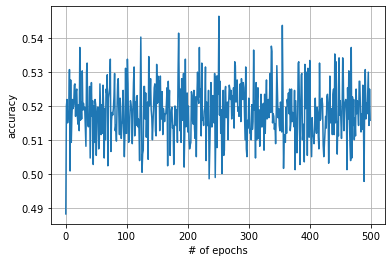

In [ ]:
# plot the training accuracy
plt.plot(hist.history['accuracy'])
plt.xlabel("# of epochs")
plt.ylabel("accuracy")
plt.grid()

In [ ]:
hist.history

{'loss': [1.5173120498657227,
  1.3505438566207886,
  1.335509181022644,
  1.3361190557479858,
  1.3409992456436157,
  1.3377389907836914,
  1.3352108001708984,
  1.33616304397583,
  1.338150978088379,
  1.3367491960525513,
  1.3375446796417236,
  1.3382471799850464,
  1.3355158567428589,
  1.3360527753829956,
  1.3362213373184204,
  1.3344998359680176,
  1.3361937999725342,
  1.3343884944915771,
  1.340137243270874,
  1.3359445333480835,
  1.3386749029159546,
  1.33951735496521,
  1.336530327796936,
  1.3395180702209473,
  1.3389928340911865,
  1.3343052864074707,
  1.3352724313735962,
  1.3395464420318604,
  1.341167688369751,
  1.3384956121444702,
  1.3369611501693726,
  1.3352500200271606,
  1.3370280265808105,
  1.3421776294708252,
  1.3345189094543457,
  1.3395814895629883,
  1.3329323530197144,
  1.3422960042953491,
  1.3356356620788574,
  1.3350530862808228,
  1.3391942977905273,
  1.3331935405731201,
  1.3393467664718628,
  1.3386588096618652,
  1.3399959802627563,
  1.3348358

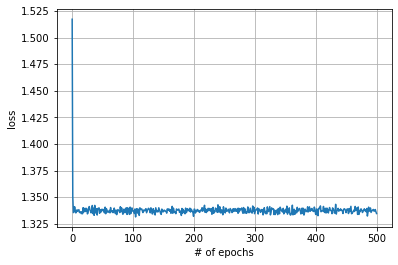

In [ ]:
# plot the training accuracy
plt.plot(hist.history['loss'])
plt.xlabel("# of epochs")
plt.ylabel("loss")
plt.grid()

Plot the training and testing losses vs. the number of epochs	

train loss: 133.46 % 
val loss: 135.67 %


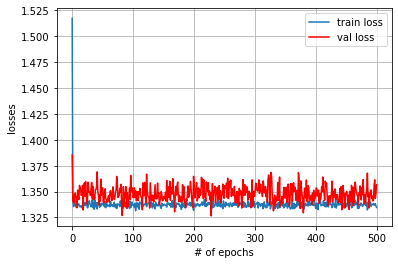

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'], 'r')
plt.legend(['train loss', 'val loss'])
plt.xlabel("# of epochs")
plt.ylabel("losses")
plt.grid()

print('train loss: %.2f %% \nval loss: %.2f %%'%(hist.history['loss'][-1]*100,hist.history['val_loss'][-1]*100))

train acc: 53.88 % 
val acc: 54.37 %


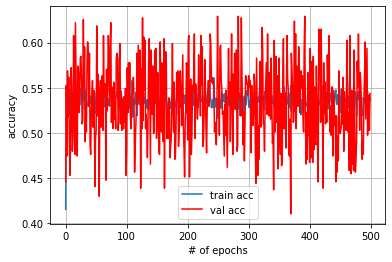

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'], 'r')
plt.legend(['train acc', 'val acc'])
plt.xlabel("# of epochs")
plt.ylabel("accuracy")
plt.grid()

print('train acc: %.2f %% \nval acc: %.2f %%'%(hist.history['accuracy'][-1]*100,hist.history['val_accuracy'][-1]*100))

Getting Avarage

In [ ]:
lis=hist.history["accuracy"]
df_all=pd.DataFrame(lis)

In [ ]:
max_training=max(hist.history["accuracy"])
min_training=min(hist.history["accuracy"])

In [ ]:
max_training

0.5609011054039001

In [ ]:
#add another hidden layer to test the performance
h_total_train=np.empty((0,500))
h_total_val=np.empty((0,500))
h_total_test=np.empty((0,500))
total_acc=[]
number_of_runs=5
train_list=[]
val_list=[]
test_list=[]
for i in range(number_of_runs):
  mlp =keras.models.Sequential([
  Flatten(input_shape=(21,)),
  (Dense(10, activation='relu', input_shape=(21*21,))),
  (Dense(6, activation='softmax'))])

  optimizer = tfa.optimizers.AdamW(learning_rate=0.001, weight_decay=0.001)
  mlp.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

  h = mlp.fit(X_train,
                    y_train,
                    epochs=500,
                    batch_size=1,
                    verbose=1,
                    validation_data=(X_val, y_val),
                    validation_batch_size=X_test.shape[0],
                    callbacks=[checkpoint]
                   )

  h_total_train=np.append(h_total_train,np.array([h.history['accuracy']]),axis=0)
  h_total_val=np.append(h_total_val,np.array([h.history['val_accuracy']]),axis=0)
  #h_total_val=np.append(h_total_test,np.array([h.history['test_accuracy']]),axis=0)
  total_acc.append(mlp.evaluate(X_test,y_test, verbose=0)[1])

  mlp.load_weights(filepath)
  trainset_acc = mlp.evaluate(X_train, y_train)[1]
  train_list.append(trainset_acc)

  valset_acc = mlp.evaluate(X_val, y_val)[1]
  val_list.append(valset_acc)

  testset_acc = mlp.evaluate(X_test, y_test)[1]
  test_list.append(testset_acc)

Streaming output truncated to the last 5000 lines.
Epoch 389/500
2599/2619 [============================>.] - ETA: 0s - loss: 1.3265 - accuracy: 0.5364
Epoch 389: val_accuracy did not improve from 0.63280
2619/2619 [==============================] - 5s 2ms/step - loss: 1.3268 - accuracy: 0.5365 - val_loss: 1.3562 - val_accuracy: 0.4848
Epoch 390/500
2595/2619 [============================>.] - ETA: 0s - loss: 1.3351 - accuracy: 0.5403
Epoch 390: val_accuracy did not improve from 0.63280
2619/2619 [==============================] - 5s 2ms/step - loss: 1.3344 - accuracy: 0.5410 - val_loss: 1.3357 - val_accuracy: 0.5615
Epoch 391/500
2605/2619 [============================>.] - ETA: 0s - loss: 1.3298 - accuracy: 0.5294
Epoch 391: val_accuracy did not improve from 0.63280
2619/2619 [==============================] - 5s 2ms/step - loss: 1.3296 - accuracy: 0.5284 - val_loss: 1.3406 - val_accuracy: 0.5365
Epoch 392/500
2604/2619 [============================>.] - ETA: 0s - loss: 1.3302 - accu

In [ ]:
#add another hidden layer to test the performance
h_total_train=np.empty((0,500))
h_total_val=np.empty((0,500))
h_total_test=np.empty((0,500))
total_acc=[]
number_of_runs=5
train_list=[]
val_list=[]
test_list=[]
for i in range(number_of_runs):
  mlp =keras.models.Sequential([
  Flatten(input_shape=(21,)),
  (Dense(10, activation='relu', input_shape=(21*21,))),
  (Dense(6, activation='softmax'))])

  optimizer = tfa.optimizers.AdamW(learning_rate=0.001, weight_decay=0.001)
  mlp.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

  h = mlp.fit(X_train,
                    y_train,
                    epochs=500,
                    batch_size=1,
                    verbose=1,
                    validation_data=(X_val, y_val),
                    validation_batch_size=X_test.shape[0],
                    callbacks=[checkpoint]
                   )

  h_total_train=np.append(h_total_train,np.array([h.history['accuracy']]),axis=0)
  h_total_val=np.append(h_total_val,np.array([h.history['val_accuracy']]),axis=0)
  #h_total_val=np.append(h_total_test,np.array([h.history['test_accuracy']]),axis=0)
  total_acc.append(mlp.evaluate(X_test,y_test, verbose=0)[1])

  mlp.load_weights(filepath)
  trainset_acc = mlp.evaluate(X_train, y_train)[1]
  train_list.append(trainset_acc)

  valset_acc = mlp.evaluate(X_val, y_val)[1]
  val_list.append(valset_acc)

  testset_acc = mlp.evaluate(X_test, y_test)[1]
  test_list.append(testset_acc)

Streaming output truncated to the last 5000 lines.
Epoch 251/500
2610/2619 [============================>.] - ETA: 0s - loss: 1.3494 - accuracy: 0.5218
Epoch 251: val_accuracy did not improve from 0.65775
2619/2619 [==============================] - 14s 5ms/step - loss: 1.3496 - accuracy: 0.5216 - val_loss: 1.3614 - val_accuracy: 0.5508
Epoch 252/500
2607/2619 [============================>.] - ETA: 0s - loss: 1.3537 - accuracy: 0.5205
Epoch 252: val_accuracy did not improve from 0.65775
2619/2619 [==============================] - 14s 5ms/step - loss: 1.3537 - accuracy: 0.5212 - val_loss: 1.3722 - val_accuracy: 0.5152
Epoch 253/500
2613/2619 [============================>.] - ETA: 0s - loss: 1.3520 - accuracy: 0.5300
Epoch 253: val_accuracy did not improve from 0.65775
2619/2619 [==============================] - 12s 5ms/step - loss: 1.3519 - accuracy: 0.5300 - val_loss: 1.3645 - val_accuracy: 0.5455
Epoch 254/500
2614/2619 [============================>.] - ETA: 0s - loss: 1.3526 - a

Max & Min & Avarrage Training accuracy

In [ ]:
mlp.load_weights(filepath)

trainset_acc = mlp.evaluate(X_train, y_train)[1]
testset_acc = mlp.evaluate(X_test, y_test)[1]
valset_acc = mlp.evaluate(X_val, y_val)[1]

18/18 [==============================] - 0s 2ms/step - loss: 1.3817 - accuracy: 0.6578


In [21]:
def Average(lst):
    return sum(lst) / len(lst)

In [ ]:
df_train_acc_all=pd.DataFrame(h_total_train)
max_acc_train=df_train_acc_all.max()
min_acc_train=df_train_acc_all.min()
print(max_acc_train,min_acc_train)
avg_acc_train=Average(h_total_train)

0      0.470027
1      0.545246
2      0.536846
3      0.517755
4      0.525391
         ...   
495    0.537610
496    0.526537
497    0.528064
498    0.523100
499    0.526537
Length: 500, dtype: float64 0      0.391371
1      0.487209
2      0.504773
3      0.505536
4      0.508591
         ...   
495    0.491791
496    0.481100
497    0.504391
498    0.501336
499    0.484536
Length: 500, dtype: float64


In [ ]:
min(max_acc_train)

In [ ]:
total_acc

[0.531194269657135,
 0.45989304780960083,
 0.458110511302948,
 0.46702316403388977,
 0.5811051726341248]

In [13]:
tAcc=[0.531194269657135,0.45989304780960083,0.458110511302948,0.46702316403388977,0.5811051726341248]
avg_test_acc=sum(tAcc)/5
avg_test_acc

0.49946523308753965

Max & Min & Avarrage Testing accuracy 

In [ ]:
df_test_acc_all=pd.DataFrame(total_acc)
max_acc_test=df_test_acc_all.max()
min_acc_test=df_test_acc_all.min()
avg_acc_test=Average(total_acc)
print(max_acc_test,min_acc_test,avg_acc_test)

0    0.581105
dtype: float64 0    0.458111
dtype: float64 0.49946523308753965


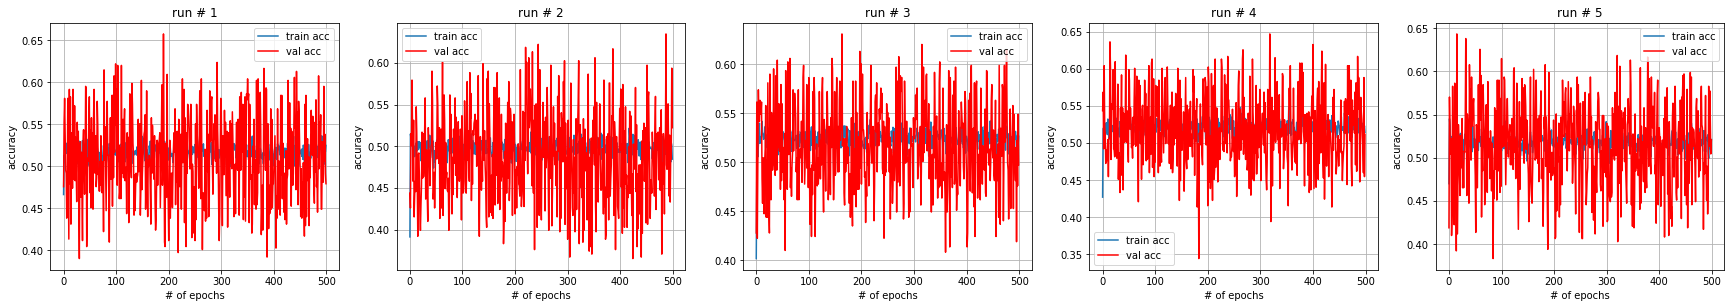

In [ ]:
for i in range(number_of_runs):
  f=plt.subplot(2,5,i+1)
  f.figure.set_size_inches(30,10)
  plt.plot(h_total_train[i])
  plt.plot(h_total_val[i],'r')
  plt.legend(['train acc', 'val acc']) 
  plt.title("run # %d"%(i+1))
  plt.xlabel("# of epochs")
  plt.ylabel("accuracy")
  plt.grid()

Plotting the baseline with the avarage acc

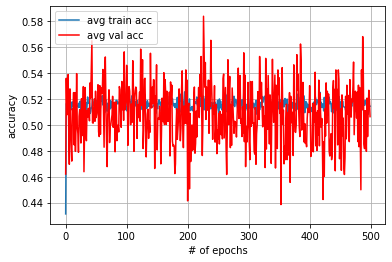

In [ ]:
h_avg_train=np.average(h_total_train,axis=0)
h_avg_val=np.average(h_total_val,axis=0)
plt.plot(h_avg_train)
plt.plot(h_avg_val, 'r')
plt.legend(['avg train acc', 'avg val acc'])
plt.xlabel("# of epochs")
plt.ylabel("accuracy")
plt.grid()

In [ ]:
print('Test accuracy: %.2f %%'%(100*mean(total_acc)))

Test accuracy: 49.95 %


Avarage Training accuracy

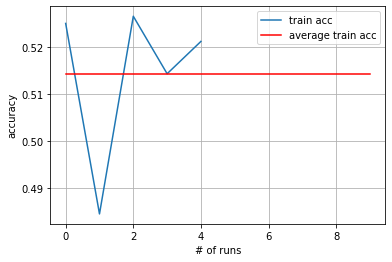

In [ ]:
ten_runs_train=[]
ten_runs_val=[]
for i in range(number_of_runs):
  ten_runs_train.append(h_total_train[i][-1])
  ten_runs_val.append(h_total_val[i][-1])

plt.plot(ten_runs_train)
plt.plot(range(0,10),[h_avg_train[-1]]*10,'r')
plt.legend(['train acc', 'average train acc']) 
plt.xlabel("# of runs")
plt.ylabel("accuracy")
plt.grid()

# TSNE

In [ ]:
from sklearn.manifold import TSNE
from sklearn.utils.multiclass import unique_labels
from sklearn.manifold import TSNE
from numpy import reshape
import seaborn as sns
import pandas as pd  
def draw_Tsne(x,y,title):
  tsne = TSNE(n_components=2, verbose=1, random_state=123)
  z = tsne.fit_transform(X_train)
  df = pd.DataFrame()
  df["y"] = y_train
  df["comp-1"] = z[:,0]
  df["comp-2"] = z[:,1]

  sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 6),
                data=df).set(title=title)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2619 samples in 0.001s...
[t-SNE] Computed neighbors for 2619 samples in 0.214s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2619
[t-SNE] Computed conditional probabilities for sample 2000 / 2619
[t-SNE] Computed conditional probabilities for sample 2619 / 2619
[t-SNE] Mean sigma: 0.159583
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.413979
[t-SNE] KL divergence after 1000 iterations: 0.678976


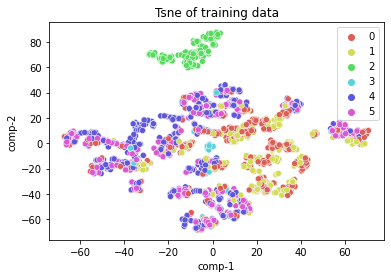

In [ ]:
draw_Tsne(X_train,y_train,"Tsne of training data")

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2619 samples in 0.000s...
[t-SNE] Computed neighbors for 2619 samples in 0.216s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2619
[t-SNE] Computed conditional probabilities for sample 2000 / 2619
[t-SNE] Computed conditional probabilities for sample 2619 / 2619
[t-SNE] Mean sigma: 0.159583
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.413979
[t-SNE] KL divergence after 1000 iterations: 0.678976


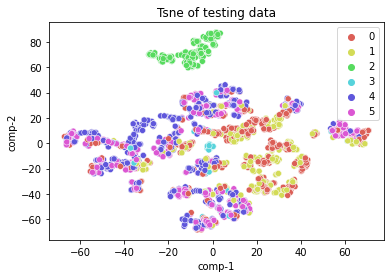

In [ ]:
draw_Tsne(X_test,y_test,"Tsne of testing data")

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2619 samples in 0.000s...
[t-SNE] Computed neighbors for 2619 samples in 0.215s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2619
[t-SNE] Computed conditional probabilities for sample 2000 / 2619
[t-SNE] Computed conditional probabilities for sample 2619 / 2619
[t-SNE] Mean sigma: 0.159583
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.413979
[t-SNE] KL divergence after 1000 iterations: 0.678976


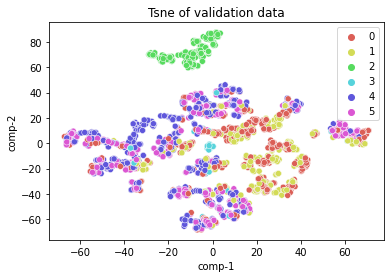

In [ ]:
draw_Tsne(X_val,y_val,"Tsne of validation data")

Confusion Matrix

In [68]:
def draw_confusion_matrix(actual,predicted):
  from sklearn import metrics
  confusion_matrix = metrics.confusion_matrix(actual, predicted)
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

# Question Two

# Deminstionality Reduction 

In [22]:
# performing preprocessing part
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
 
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Find the best value for n_components based on the test accuracy of the MLP classifier, using Principal Component Analysis,=21 giving acc=0.70944744348526

In [24]:
def create_mlp(num_x):
  # define the model type (still empty)
  mlp = keras.models.Sequential()

# add a layer that just flattens the input (no weights here)
  mlp.add(Flatten(input_shape=(num_x,)))

  mlp.add(Dense(10, activation='relu', input_shape=(num_x*num_x,)))

# add the output layer with 6 units and Softmax activation function
  mlp.add(Dense(6, activation='softmax'))
  return mlp

In [37]:
from sklearn.decomposition import PCA
total_acc_pca=[]
for i in range (1,22):
  pca = PCA(n_components = i,random_state=0)
  X_train_pca = pca.fit_transform(X_train)
  X_test_pca = pca.transform(X_test)
  mlp_pca=create_mlp(i)
  optimizer = tfa.optimizers.AdamW(learning_rate=0.001, weight_decay=0.001)
  mlp_pca.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  h_pca = mlp_pca.fit(X_train_pca,y_train, epochs=100,verbose=0)
  
  total_acc_pca.append(mlp_pca.evaluate(X_test_pca,y_test, verbose=0)[1])


In [ ]:
print(total_acc_pca)

[0.4634581208229065, 0.5347593426704407, 0.6345810890197754, 0.625668466091156, 0.6720142364501953, 0.6595365405082703, 0.6773618459701538, 0.6666666865348816, 0.6880570650100708, 0.6809269189834595, 0.7130124568939209, 0.7040998339653015, 0.6951871514320374, 0.6880570650100708, 0.675579309463501, 0.7058823704719543, 0.7290552854537964, 0.7290552854537964, 0.7112299203872681, 0.7308377623558044, 0.7308377623558044]


Plot the (number of component-test accuracy) graph with the baseline performance. 

acc baseline : 51.58 % 
  acc after pca acc: 73.08 %


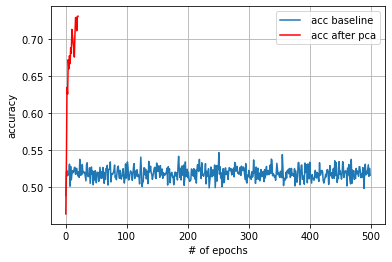

In [ ]:

plt.plot(hist.history['accuracy'])
plt.plot(total_acc_pca, 'r')
plt.legend([' acc baseline', ' acc after pca'])
plt.xlabel("# of epochs")
plt.ylabel("accuracy")
plt.grid()

print('acc baseline : %.2f %% \n  acc after pca acc: %.2f %%'%(hist.history['accuracy'][-1]*100,total_acc_pca[-1]*100))

test acc baseline : 51.58 % 
  acc after pca acc: 73.08 %


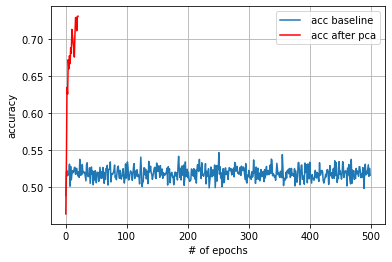

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(total_acc_pca, 'r')
plt.legend([' acc baseline', ' acc after pca'])
plt.xlabel("# of epochs")
plt.ylabel("accuracy")
plt.grid()

print('test acc baseline : %.2f %% \n  acc after pca acc: %.2f %%'%(hist.history['accuracy'][-1]*100,total_acc_pca[-1]*100))

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 17,random_state=0)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
mlp_pca=create_mlp(17)
optimizer = tfa.optimizers.AdamW(learning_rate=0.001, weight_decay=0.001)
mlp_pca.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
h_pca = mlp_pca.fit(X_train_pca,y_train, epochs=10,verbose=0)
print('Test accuracy after pca: %.2f %%'%(100*mlp_pca.evaluate(X_test_pca,y_test, verbose=0)[1]))

In [70]:
y_pred = np.argmax(mlp_pca.predict(X_test_pca), axis=-1)
#data= confusion_matrix(y_test, y_pred)
#confusion.append(data)
labels =['TCP-SYN ','PortScan ','Blackhole','Diversion','Normal','Overflow']
draw_confusion_matrix(y_test,y_pred)

In [73]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)



[[ 65  27   0   0   7  23]
 [ 23  62   0   0   0   5]
 [  0   0  49   0   0   0]
 [  0   1   0   2   1  13]
 [  0   0   0   0  74  53]
 [  0   0   0   0  27 129]]


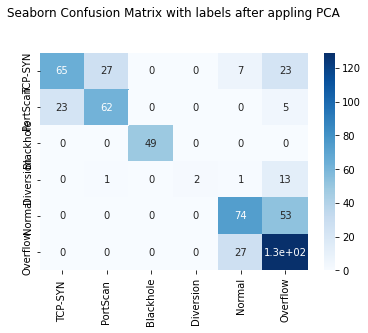

In [77]:
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels after appling PCA\n\n');
#ax.set_xlabel('\nPredicted Values')
#ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['TCP-SYN ','PortScan ','Blackhole','Diversion','Normal','Overflow'])
ax.yaxis.set_ticklabels(['TCP-SYN ','PortScan ','Blackhole','Diversion','Normal','Overflow'])
plt.xticks(rotation = 90) 

## Display the visualization of the Confusion Matrix.
plt.show()

In [42]:

pca = PCA(n_components = 17,random_state=0)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
X_val_pca=pca.transform(X_val)
mlp_pca=create_mlp(17)
optimizer = tfa.optimizers.AdamW(learning_rate=0.001, weight_decay=0.001)
mlp_pca.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
h_pca = mlp_pca.fit(X_train_pca,y_train,validation_data =(X_val_pca, y_val), epochs=10,verbose=0)
print('Test accuracy: %.2f %%'%(100*mlp_pca.evaluate(X_test_pca,y_test, verbose=0)[1]))
print('val accuracy: %.2f %%'%(100*h_pca.history['val_accuracy'][1]))


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but PCA was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Test accuracy: 67.91 %
val accuracy: 20.32 %


Apply TSNE(n_components=2, random_state=0) to visualise the training and test datasets after DR

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2619 samples in 0.000s...
[t-SNE] Computed neighbors for 2619 samples in 0.157s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2619
[t-SNE] Computed conditional probabilities for sample 2000 / 2619
[t-SNE] Computed conditional probabilities for sample 2619 / 2619
[t-SNE] Mean sigma: 0.648755
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.098183
[t-SNE] KL divergence after 1000 iterations: 0.613378


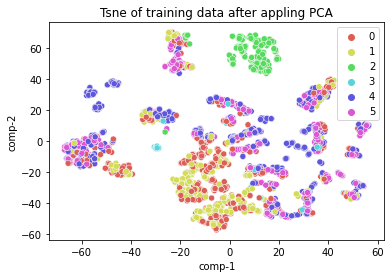

In [ ]:
draw_Tsne(X_train_pca,y_train,"Tsne of training data after appling PCA")

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2619 samples in 0.001s...
[t-SNE] Computed neighbors for 2619 samples in 0.135s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2619
[t-SNE] Computed conditional probabilities for sample 2000 / 2619
[t-SNE] Computed conditional probabilities for sample 2619 / 2619
[t-SNE] Mean sigma: 0.648755
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.098183
[t-SNE] KL divergence after 1000 iterations: 0.613378


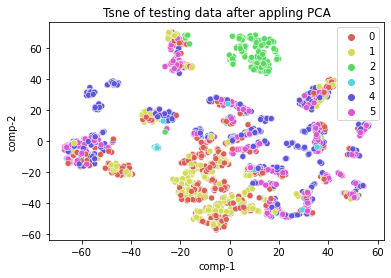

In [ ]:
draw_Tsne(X_test_pca,y_test,"Tsne of testing data after appling PCA")

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 17,random_state=0)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
mlp_pca=create_mlp(17)
optimizer = tfa.optimizers.AdamW(learning_rate=0.001, weight_decay=0.001)
mlp_pca.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
h_pca = mlp_pca.fit(X_train_pca,y_train, epochs=10,verbose=0)
print('Test accuracy after pca: %.2f %%'%(100*mlp_pca.evaluate(X_test_pca,y_test, verbose=0)[1]))


# feature selection Using ANOVA

In [ ]:

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

Appply ANOVA feature selection on data 
Find the best number of features based on the MLP test accuracy, using the feature selection methods:
ANOVA


In [ ]:
total_acc_anova=[]
for i in range (2,22):
    
    fvalue_Best = SelectKBest(f_classif, k=i)
    X_k_train_best = fvalue_Best.fit_transform(X_train, y_train)
    X_k_test_best = fvalue_Best.fit_transform(X_test, y_test)
    
    mlp_anova=create_mlp(i)
    optimizer = tfa.optimizers.AdamW(learning_rate=0.001, weight_decay=0.001)
    mlp_anova.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    h_anova = mlp_anova.fit(X_k_train_best,y_train, epochs=200,verbose=0)
  #h_anova = mlp_anova.fit(x=X_train,y= y_train,validation_data= (X_val,y_val), epochs=500, batch_size= 32, verbose=0, callbacks =[earlystopping])
  
    total_acc_anova.append(mlp_anova.evaluate(X_k_test_best,y_test, verbose=0)[1])

In [ ]:
print(total_acc_anova)

[0.48128342628479004, 0.4777183532714844, 0.6934046149253845, 0.686274528503418, 0.6684492230415344, 0.6827094554901123, 0.5971479415893555, 0.7237076759338379, 0.7254902124404907, 0.7272727489471436, 0.23707665503025055, 0.25668448209762573, 0.7147949934005737, 0.6541889309883118, 0.648841381072998, 0.6577540040016174, 0.7023172974586487, 0.70944744348526, 0.7272727489471436, 0.7201426029205322]


So  the best number of features based on the MLP test accuracy, using the ANOVA feature selection =**10**

 baseline train acc: 51.58 % 
 train acc after ANOVA acc: 72.01 %


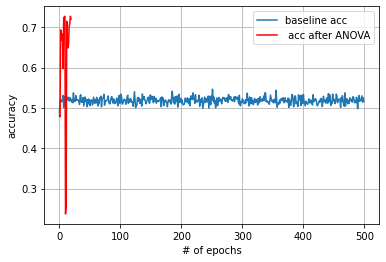

In [ ]:

plt.plot(hist.history['accuracy'])
plt.plot(total_acc_anova, 'r')
plt.legend(['baseline acc', ' acc after ANOVA'])
plt.xlabel("# of epochs")
plt.ylabel("accuracy")
plt.grid()

print(' baseline train acc: %.2f %% \n train acc after ANOVA acc: %.2f %%'%(hist.history['accuracy'][-1]*100,total_acc_anova[-1]*100))


Apply ANOVA feature selection  with number of feaures baised on the higest testing accuracy

In [ ]:
n_highest=11
fvalue_Best = SelectKBest(f_classif, k=n_highest)
X_k_train_best = fvalue_Best.fit_transform(X_train, y_train)
X_k_test_best = fvalue_Best.fit_transform(X_test, y_test)
X_k_val_best = fvalue_Best.fit_transform(X_val, y_val)
mlp_anova=create_mlp(n_highest)
optimizer = tfa.optimizers.AdamW(learning_rate=0.001, weight_decay=0.001)
mlp_anova.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
h_anova = mlp_anova.fit(X_k_train_best,y_train, epochs=10,verbose=0)
#h_anova = mlp_anova.fit(x=X_train,y= y_train,validation_data= (X_val,y_val), epochs=500, batch_size= 32, verbose=0, callbacks =[earlystopping])
  
print('Test accuracy after applied the ANOVA feature selection : %.2f %%'%(100*mlp_anova.evaluate(X_k_test_best,y_test, verbose=0)[1]))

Test accuracy after applied the ANOVA feature selection : 67.56 %


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2619 samples in 0.001s...
[t-SNE] Computed neighbors for 2619 samples in 0.154s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2619
[t-SNE] Computed conditional probabilities for sample 2000 / 2619
[t-SNE] Computed conditional probabilities for sample 2619 / 2619
[t-SNE] Mean sigma: 0.648755
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.098183
[t-SNE] KL divergence after 1000 iterations: 0.613378


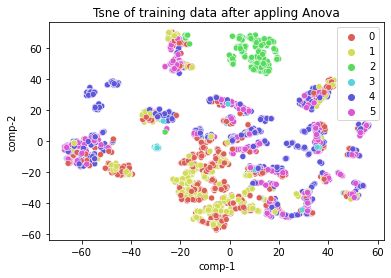

In [ ]:
draw_Tsne(X_k_train_best,y_train,"Tsne of training data after appling Anova")

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2619 samples in 0.001s...
[t-SNE] Computed neighbors for 2619 samples in 0.151s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2619
[t-SNE] Computed conditional probabilities for sample 2000 / 2619
[t-SNE] Computed conditional probabilities for sample 2619 / 2619
[t-SNE] Mean sigma: 0.648755
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.098183
[t-SNE] KL divergence after 1000 iterations: 0.613378


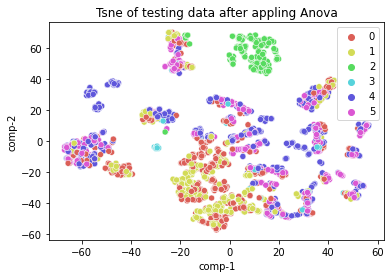

In [ ]:
draw_Tsne(X_k_test_best,y_train,"Tsne of testing data after appling Anova")

# #feature selection Using Mutual Information

In [ ]:
pip install --upgrade category_encoders

In [ ]:

import pandas as pd
from sklearn.datasets import fetch_openml
import category_encoders as ce

from sklearn.feature_selection import SelectKBest, SelectPercentile, mutual_info_classif


In [ ]:
total_acc_mutual_info=[]
for i in range (2,22):
  selector = SelectKBest(mutual_info_classif, k=i)
  X_train_reduced = selector.fit_transform(X_train, y_train)
  X_test_reduced = selector.fit_transform(X_test, y_test)
  mlp_mutual_info=create_mlp(i)
  optimizer = tfa.optimizers.AdamW(learning_rate=0.001, weight_decay=0.001)
  mlp_mutual_info.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  h_mutual_info = mlp_mutual_info.fit(X_train_reduced,y_train, epochs=200,verbose=0)
  total_acc_mutual_info.append(mlp_mutual_info.evaluate(X_test_reduced,y_test, verbose=0)[1])
  

In [ ]:
print(total_acc_mutual_info)

[0.6595365405082703, 0.6773618459701538, 0.6613190770149231, 0.6631016135215759, 0.6791443824768066, 0.6791443824768066, 0.6809269189834595, 0.6773618459701538, 0.6666666865348816, 0.6684492230415344, 0.6702316999435425, 0.6898396015167236, 0.6238859295845032, 0.6131907105445862, 0.6880570650100708, 0.2549019753932953, 0.27272728085517883, 0.3529411852359772, 0.6773618459701538, 0.7058823704719543]


So  the best number of features based on the MLP test accuracy, using the Mutual Information feature selection =**19**

train acc: 51.58 % 
 acc after mutual info acc: 70.59 %


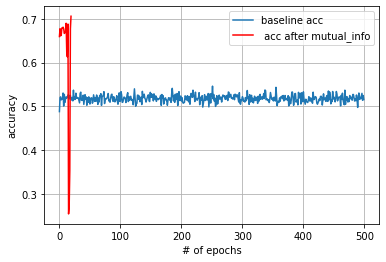

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(total_acc_mutual_info, 'r')
plt.legend(['baseline acc', ' acc after mutual_info'])
plt.xlabel("# of epochs")
plt.ylabel("accuracy")
plt.grid()
print('train acc: %.2f %% \n acc after mutual info acc: %.2f %%'%(hist.history['accuracy'][-1]*100,total_acc_mutual_info[-1]*100))


Apply Mutual Information feature selection  with number of feaures=19 baised on the higest testing accuracy

In [ ]:
selector = SelectKBest(mutual_info_classif, k=19)
X_train_reduced = selector.fit_transform(X_train, y_train)
X_test_reduced = selector.fit_transform(X_test, y_test)
mlp_mutual_info=create_mlp(19)
optimizer = tfa.optimizers.AdamW(learning_rate=0.001, weight_decay=0.001)
mlp_mutual_info.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
h_mutual_info = mlp_mutual_info.fit(X_train_reduced,y_train, epochs=10,verbose=0)
print('Test accuracy after applied the Mutual Information feature selection : %.2f %%'%(100*mlp_mutual_info.evaluate(X_test_reduced,y_test, verbose=0)[1]))

Test accuracy after applied the Mutual Information feature selection : 64.35 %


Choose the method that achieves the best test accuracy results (either the ANOVA or mutual information), and provide 2D TSNE plots, one for the training set and one for the test set.


**The Mutual Information feature selection achieves the best test accuracy results**

provide 2D TSNE plots, one for the training set and one for the test set.



[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2619 samples in 0.000s...
[t-SNE] Computed neighbors for 2619 samples in 0.141s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2619
[t-SNE] Computed conditional probabilities for sample 2000 / 2619
[t-SNE] Computed conditional probabilities for sample 2619 / 2619
[t-SNE] Mean sigma: 0.648755
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.098183
[t-SNE] KL divergence after 1000 iterations: 0.613378


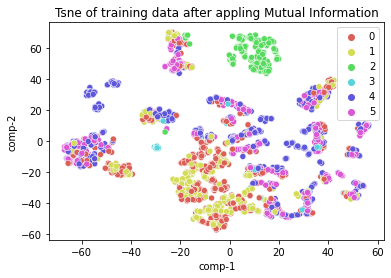

In [ ]:
draw_Tsne(X_train_reduced,y_train,"Tsne of training data after appling Mutual Information")

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2619 samples in 0.000s...
[t-SNE] Computed neighbors for 2619 samples in 0.145s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2619
[t-SNE] Computed conditional probabilities for sample 2000 / 2619
[t-SNE] Computed conditional probabilities for sample 2619 / 2619
[t-SNE] Mean sigma: 0.648755
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.098183
[t-SNE] KL divergence after 1000 iterations: 0.613378


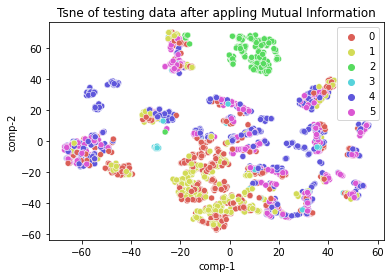

In [ ]:
draw_Tsne(X_test_reduced,y_train,"Tsne of testing data after appling Mutual Information")

Update your dataset, to be used in the next steps, based on the technique that provides you with highest validation accuracy (either dimensionality reduction or feature selection), and provide the confusion matrix. 

** the technique that provides you with highest validation accuracy (either dimensionality reduction or feature selection) is PCA**

# Question Three

**(3.1)**

# Firstly Using the Batch size =32

In [45]:
def create_mlp_get_total_acc(batch_size,num_n,X_train_pca,y_train,X_val_pca,y_val,X_test_pca,y_test):
    
  #add another hidden layer to test the performance
    h_total_train=np.empty((0,200))
    h_total_val=np.empty((0,200))
    h_total_test=np.empty((0,200))
    total_acc=[]
    number_of_runs=5
    for i in range(number_of_runs):
        mlp =keras.models.Sequential([
        Flatten(input_shape=(17,)),
        (Dense(num_n, activation='relu', input_shape=(17*17,))),
        (Dense(6, activation='softmax'))])

        optimizer = tfa.optimizers.AdamW(learning_rate=0.001, weight_decay=0.001)
        mlp.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

        h = mlp.fit(X_train_pca,y_train,validation_data =(X_val_pca, y_val), epochs=200,verbose=0,batch_size=batch_size)
        h_total_train=np.append(h_total_train,np.array([h.history['accuracy']]),axis=0)
        h_total_val=np.append(h_total_val,np.array([h.history['val_accuracy']]),axis=0)

        total_acc.append(mlp.evaluate(X_test_pca,y_test, verbose=0)[1])
    return h_total_train,h_total_val,h_total_test,total_acc

In [ ]:
#add another hidden layer to test the performance
h_total_train_first_batches=np.empty((0,10))
h_total_val_first_batches=np.empty((0,10))
h_total_test_first_batches=np.empty((0,10))
total_acc_first_batches=[]

In [ ]:
train_list=[]
val_list=[]
test_list=[]

In [ ]:
h_total_train_first_batches,h_total_val_first_batches,h_total_test_first_batches,total_acc_first_batches=create_mlp_get_total_acc(32,10,X_train_pca,y_train,X_val_pca,y_val,X_test_pca,y_test)

In [ ]:
print(h_total_train_first_batches)

[[0.24093166 0.34364262 0.50210005 0.574265   0.59946543 0.61779302
  0.6323024  0.64795727 0.65979379 0.67201221 0.67201221 0.67888504
  0.66590303 0.67850327 0.67850327 0.68461245 0.68881249 0.68957615
  0.69339442 0.69186711 0.69644904 0.69377625 0.69759452 0.6945399
  0.69263077 0.69644904 0.69874001 0.70332187 0.69874001 0.69759452
  0.70255822 0.70141274 0.70103091 0.70408553 0.70255822 0.70217639
  0.70026726 0.70637649 0.70294005 0.7037037  0.70637649 0.70561284
  0.70637649 0.7037037  0.70866746 0.70637649 0.70828563 0.70866746
  0.70904928 0.70828563 0.70714015 0.71095836 0.70523101 0.70943105
  0.71057653 0.70904928 0.70637649 0.7079038  0.70866746 0.70828563
  0.70828563 0.70828563 0.70637649 0.70828563 0.70637649 0.70866746
  0.70828563 0.7079038  0.7079038  0.70026726 0.70561284 0.70294005
  0.70408553 0.70599467 0.69759452 0.70561284 0.70484918 0.69912177
  0.70484918 0.70828563 0.70714015 0.70828563 0.70523101 0.70637649
  0.70828563 0.70943105 0.69683087 0.70866746 0.7

In [ ]:
def Average (lis):
    
    return sum(lis) / len(lis)

Max & Min & Avarrage Training accuracy Using** Batch size =32**

In [48]:
def get_max_min_avg_acc(mylist):
  df_acc_all=pd.DataFrame(mylist)
  max_acc=df_acc_all.max()
  min_acc=df_acc_all.min()
  avg_acc=Average(mylist)
  return max_acc,min_acc,avg_acc

In [ ]:
max_acc_train_b1,min_acc_train_b1,avg_acc_train_b1=get_max_min_avg_acc(h_total_train_first_batches)

In [ ]:
print(max(max_acc_train_b1))
print(min(min_acc_train_b1))
print(Average(avg_acc_train_b1))

0.7262313961982727
0.09049255400896072
0.7020740756765009


In [ ]:
total_acc_first_batches

[0.7147949934005737,
 0.7254902124404907,
 0.7272727489471436,
 0.7201426029205322,
 0.7290552854537964]

Max & Min & Avarrage Testing accuracy Using Batch size=32

In [ ]:
max_acc_test_b1,min_acc_test_b1,avg_acc_test_b1=get_max_min_avg_acc(total_acc_first_batches)
print(max_acc_test_b1,min_acc_test_b1,avg_acc_test_b1)

0    0.729055
dtype: float64 0    0.714795
dtype: float64 0.7233511686325074


In [49]:
def plotting_five_runs(number_of_runs,h_total_train,h_total_val):
  for i in range(number_of_runs):
    f=plt.subplot(2,5,i+1)
    f.figure.set_size_inches(30,10)
    plt.plot(h_total_train[i])
    plt.plot(h_total_val[i],'r')
    plt.legend(['train acc', 'val acc']) 
    plt.title("run # %d"%(i+1))
    plt.xlabel("# of epochs")
    plt.ylabel("accuracy")
    plt.grid()
  

In [ ]:
h_total_train_first_batches

array([[0.24093166, 0.34364262, 0.50210005, 0.574265  , 0.59946543,
        0.61779302, 0.6323024 , 0.64795727, 0.65979379, 0.67201221,
        0.67201221, 0.67888504, 0.66590303, 0.67850327, 0.67850327,
        0.68461245, 0.68881249, 0.68957615, 0.69339442, 0.69186711,
        0.69644904, 0.69377625, 0.69759452, 0.6945399 , 0.69263077,
        0.69644904, 0.69874001, 0.70332187, 0.69874001, 0.69759452,
        0.70255822, 0.70141274, 0.70103091, 0.70408553, 0.70255822,
        0.70217639, 0.70026726, 0.70637649, 0.70294005, 0.7037037 ,
        0.70637649, 0.70561284, 0.70637649, 0.7037037 , 0.70866746,
        0.70637649, 0.70828563, 0.70866746, 0.70904928, 0.70828563,
        0.70714015, 0.71095836, 0.70523101, 0.70943105, 0.71057653,
        0.70904928, 0.70637649, 0.7079038 , 0.70866746, 0.70828563,
        0.70828563, 0.70828563, 0.70637649, 0.70828563, 0.70637649,
        0.70866746, 0.70828563, 0.7079038 , 0.7079038 , 0.70026726,
        0.70561284, 0.70294005, 0.70408553, 0.70

In [ ]:
h_total_val_first_batches

array([[0.25846702, 0.30124778, 0.30481285, 0.3262032 , 0.32976827,
        0.35828876, 0.36720142, 0.36720142, 0.38502672, 0.37433156,
        0.38324422, 0.40106952, 0.37967914, 0.41176471, 0.37611407,
        0.39393941, 0.39393941, 0.40463459, 0.39928699, 0.39393941,
        0.39393941, 0.39393941, 0.39750445, 0.39215687, 0.39215687,
        0.39750445, 0.39928699, 0.39393941, 0.39750445, 0.39393941,
        0.38324422, 0.39572191, 0.39572191, 0.39215687, 0.39393941,
        0.39393941, 0.39037433, 0.38680926, 0.39393941, 0.39215687,
        0.39393941, 0.39393941, 0.39037433, 0.3885918 , 0.39215687,
        0.39215687, 0.39215687, 0.39393941, 0.39393941, 0.38502672,
        0.39215687, 0.39750445, 0.38146168, 0.39572191, 0.39393941,
        0.39393941, 0.38680926, 0.39393941, 0.39750445, 0.39037433,
        0.40106952, 0.39750445, 0.39750445, 0.39037433, 0.39572191,
        0.39928699, 0.39928699, 0.39928699, 0.39928699, 0.39572191,
        0.40106952, 0.39215687, 0.3885918 , 0.39

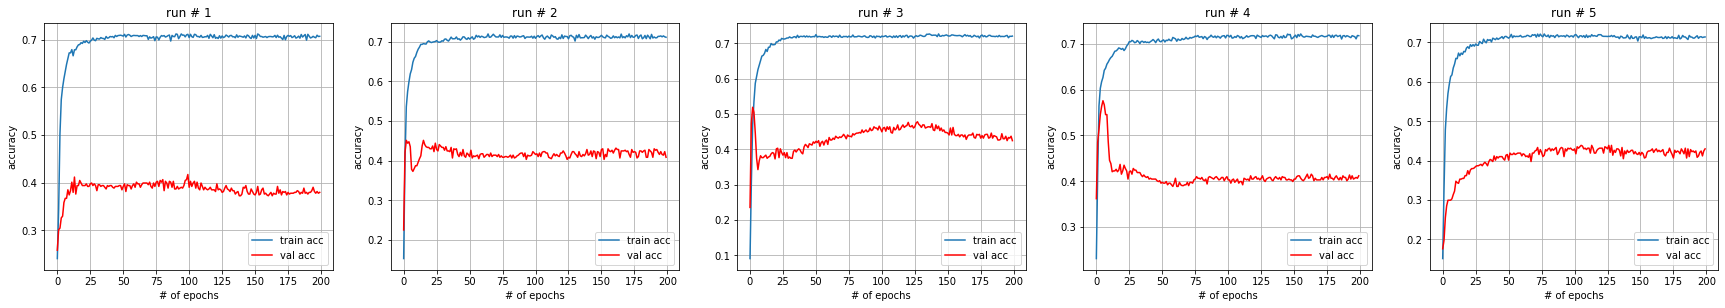

In [ ]:
plotting_five_runs(5,h_total_train_first_batches,h_total_val_first_batches)

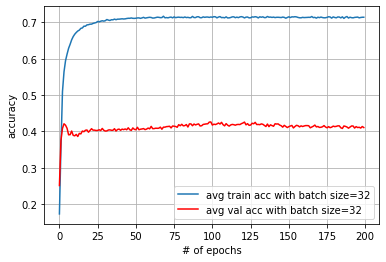

In [ ]:
h_avg_train=np.average(h_total_train_first_batches,axis=0)
h_avg_val=np.average(h_total_val_first_batches,axis=0)
plt.plot(h_avg_train)
plt.plot(h_avg_val, 'r')
plt.legend(['avg train acc with batch size=32', 'avg val acc with batch size=32'])
plt.xlabel("# of epochs")
plt.ylabel("accuracy")
plt.grid()

In [ ]:
print('Test accuracy: %.2f %%'%(100*mean(total_acc_first_batches)))

Test accuracy: 72.34 %


In [50]:
def plotting_train_acc_vs_average_train_acc(number_of_runs,h_total_train,h_total_val):
  ten_runs_train=[]
  ten_runs_val=[]
  for i in range(number_of_runs):
    ten_runs_train.append(h_total_train[i][-1])
    ten_runs_val.append(h_total_val[i][-1])

  plt.plot(ten_runs_train)
  plt.plot(range(0,10),[h_avg_train[-1]]*10,'r')
  plt.legend(['train acc', 'average val acc']) 
  plt.xlabel("# of runs")
  plt.ylabel("accuracy")
  plt.grid()

Getting the Averrage valdiation accuracy=**71%**

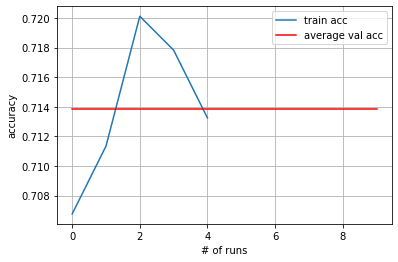

In [ ]:
plotting_train_acc_vs_average_train_acc(5,h_total_train_first_batches,h_total_val_first_batches)

# Seconly using the batch size=64

In [ ]:
#add another hidden layer to test the performance
h_total_train_second_batches=np.empty((0,5))
h_total_val_second_batches=np.empty((0,5))
h_total_test_second_batches=np.empty((0,5))
total_acc_second_batches=[]

In [ ]:
h_total_train_second_batches,h_total_val_second_batches,h_total_test_second_batches,total_acc_second_batches=create_mlp_get_total_acc(64,10,X_train_pca,y_train,X_val_pca,y_val,X_test_pca,y_test)

Max & Min & Avarrage Training accuracy Using** Batch size =64**

In [ ]:
max_acc_train_b2,min_acc_train_b2,avg_acc_train_b2=get_max_min_avg_acc(h_total_train_second_batches)

In [ ]:
print(max(max_acc_train_b2))
print(min(min_acc_train_b2))
print(Average(avg_acc_train_b2))

0.7311950922012329
0.10729286074638367
0.6949480720832945


 **Max & Min & Avarrage Testing accuracy Using Batch size=64**

In [ ]:
max_acc_test_b2,min_acc_test_b2,avg_acc_test_b2=get_max_min_avg_acc(total_acc_second_batches)
print(max_acc_test_b2,min_acc_test_b2,avg_acc_test_b2)

0    0.734403
dtype: float64 0    0.720143
dtype: float64 0.7272727251052856


In [ ]:
h_total_train_second_batches

array([[0.21802215, 0.28445971, 0.33791524, 0.38717067, 0.44329897,
        0.50515461, 0.54180986, 0.57464683, 0.60137457, 0.61473846,
        0.62886596, 0.63344789, 0.64642996, 0.65406644, 0.65788472,
        0.66590303, 0.66972125, 0.67239404, 0.67926687, 0.68270332,
        0.6796487 , 0.69224894, 0.68995798, 0.68346697, 0.69072163,
        0.69110346, 0.68957615, 0.69224894, 0.69148529, 0.69072163,
        0.69530356, 0.69339442, 0.69568539, 0.6972127 , 0.69835818,
        0.69874001, 0.6972127 , 0.70141274, 0.70026726, 0.69797635,
        0.69988543, 0.69988543, 0.69797635, 0.70064908, 0.70103091,
        0.69683087, 0.69988543, 0.70217639, 0.70294005, 0.70141274,
        0.70446736, 0.70484918, 0.70332187, 0.70255822, 0.70217639,
        0.70561284, 0.70446736, 0.70255822, 0.70561284, 0.70675832,
        0.70523101, 0.70332187, 0.70294005, 0.70561284, 0.70637649,
        0.70484918, 0.70294005, 0.70179456, 0.70828563, 0.70599467,
        0.70179456, 0.70484918, 0.70561284, 0.70

In [ ]:
h_total_val_second_batches

array([[0.27272728, 0.30837789, 0.38324422, 0.44741532, 0.49554366,
        0.5151515 , 0.50980395, 0.49910873, 0.48128343, 0.46702316,
        0.44385028, 0.42067736, 0.40998217, 0.39928699, 0.37433156,
        0.37789661, 0.38324422, 0.38680926, 0.38502672, 0.38502672,
        0.39037433, 0.39215687, 0.40106952, 0.40106952, 0.40463459,
        0.40819964, 0.40463459, 0.4064171 , 0.4064171 , 0.40285206,
        0.4064171 , 0.39750445, 0.40463459, 0.39572191, 0.39750445,
        0.39750445, 0.39750445, 0.39215687, 0.39928699, 0.39750445,
        0.39928699, 0.39037433, 0.39750445, 0.39393941, 0.39928699,
        0.39572191, 0.39037433, 0.39215687, 0.39215687, 0.39393941,
        0.39572191, 0.39037433, 0.3885918 , 0.38502672, 0.39215687,
        0.39037433, 0.38502672, 0.38502672, 0.38146168, 0.3885918 ,
        0.3885918 , 0.38146168, 0.38680926, 0.38146168, 0.37967914,
        0.38680926, 0.38146168, 0.38680926, 0.38324422, 0.38324422,
        0.38146168, 0.37789661, 0.37611407, 0.36

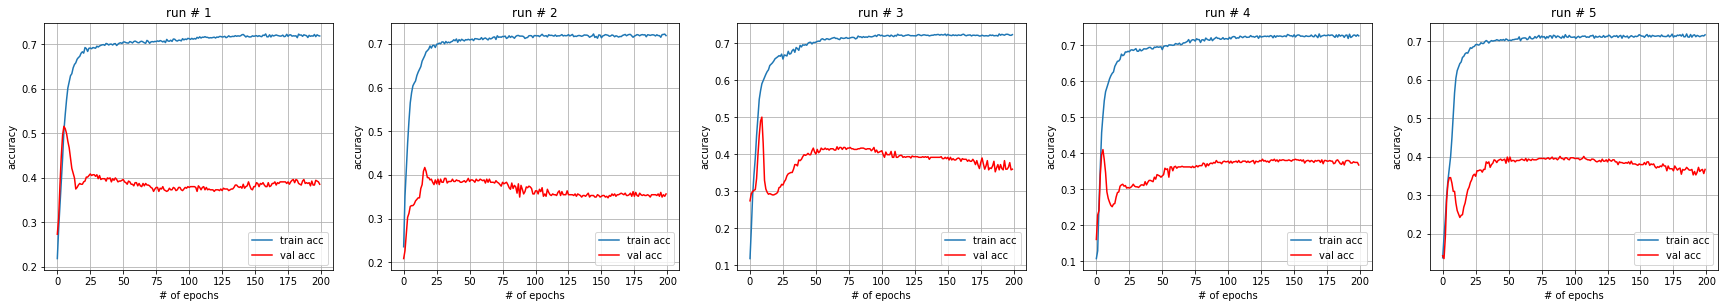

In [ ]:
plotting_five_runs(5,h_total_train_second_batches,h_total_val_second_batches)

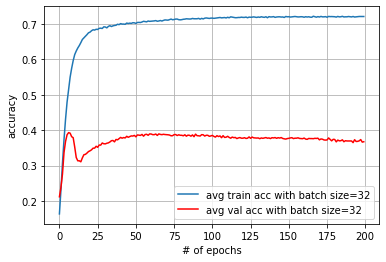

In [ ]:
h_avg_train=np.average(h_total_train_second_batches,axis=0)
h_avg_val=np.average(h_total_val_second_batches,axis=0)
plt.plot(h_avg_train)
plt.plot(h_avg_val, 'r')
plt.legend(['avg train acc with batch size=32', 'avg val acc with batch size=32'])
plt.xlabel("# of epochs")
plt.ylabel("accuracy")
plt.grid()

Avarage Training Accuracy

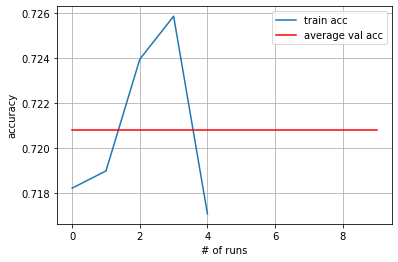

In [ ]:
plotting_train_acc_vs_average_train_acc(5,h_total_train_second_batches,h_total_val_second_batches)

# **Thirdly using the batch size=128**

In [ ]:
#add another hidden layer to test the performance
h_total_train_third_batches=np.empty((0,10))
h_total_val_third_batches=np.empty((0,10))
h_total_test_third_batches=np.empty((0,10))
total_acc_third_batches=[]

In [ ]:
h_total_train_third_batches,h_total_val_third_batches,h_total_test_third_batches,total_acc_third_batches=create_mlp_get_total_acc(128,10,X_train_pca,y_train,X_val_pca,y_val,X_test_pca,y_test)

Max & Min & Avarrage Training accuracy Using** Batch size =128**

In [ ]:
max_acc_train_b3,min_acc_train_b3,avg_acc_train_b3=get_max_min_avg_acc(h_total_train_third_batches)

In [ ]:
print(max(max_acc_train_b3))
print(min(min_acc_train_b3))
print(Average(avg_acc_train_b3))

0.7327224016189575
0.09583810716867447
0.6872840787842864


Max & Min & Avarrage Testing accuracy Using** Batch size =128**

In [ ]:
max_acc_test_b3,min_acc_test_b3,avg_acc_test_b3=get_max_min_avg_acc(total_acc_third_batches)
print(max_acc_test_b3,min_acc_test_b3,avg_acc_test_b3)

0    0.736185
dtype: float64 0    0.727273
dtype: float64 0.7311942934989929


In [ ]:
h_total_train_third_batches

array([[0.13669339, 0.18136694, 0.23902252, 0.28675067, 0.34287897,
        0.40893471, 0.45704466, 0.48377243, 0.51470029, 0.54562813,
        0.56242841, 0.5834288 , 0.59831995, 0.60366553, 0.61435664,
        0.62733871, 0.63306606, 0.63612068, 0.64375716, 0.64872086,
        0.65139365, 0.65521193, 0.66284841, 0.66933942, 0.6704849 ,
        0.67621231, 0.67773962, 0.68155783, 0.68308514, 0.68537611,
        0.68843073, 0.68690342, 0.68919432, 0.69186711, 0.69377625,
        0.69148529, 0.69492173, 0.69568539, 0.69683087, 0.69568539,
        0.70064908, 0.70103091, 0.70523101, 0.70675832, 0.7079038 ,
        0.70714015, 0.70828563, 0.70943105, 0.71057653, 0.70943105,
        0.70752198, 0.7079038 , 0.70904928, 0.70828563, 0.70714015,
        0.70599467, 0.7128675 , 0.71210384, 0.70866746, 0.70904928,
        0.71248567, 0.70714015, 0.71019471, 0.71477664, 0.71172202,
        0.71439481, 0.70866746, 0.71439481, 0.71783125, 0.70828563,
        0.71477664, 0.71401298, 0.71401298, 0.71

In [ ]:
h_total_val_third_batches

array([[0.07664884, 0.19964349, 0.29590017, 0.29233512, 0.31729054,
        0.34759358, 0.38502672, 0.41532975, 0.47415331, 0.49554366,
        0.52049911, 0.52049911, 0.44563279, 0.37789661, 0.37076649,
        0.36185384, 0.35294119, 0.35650623, 0.35472372, 0.3600713 ,
        0.34759358, 0.35294119, 0.35294119, 0.35828876, 0.36541888,
        0.35828876, 0.36185384, 0.37076649, 0.36898395, 0.37076649,
        0.36720142, 0.36898395, 0.37254903, 0.37254903, 0.36898395,
        0.36898395, 0.37254903, 0.37433156, 0.36898395, 0.36363637,
        0.37433156, 0.37611407, 0.37254903, 0.37967914, 0.38324422,
        0.38324422, 0.37967914, 0.38324422, 0.37967914, 0.38324422,
        0.3885918 , 0.38680926, 0.3885918 , 0.39037433, 0.38324422,
        0.3885918 , 0.38146168, 0.3885918 , 0.39037433, 0.38680926,
        0.38324422, 0.39037433, 0.39037433, 0.39215687, 0.38502672,
        0.3885918 , 0.38502672, 0.3885918 , 0.38502672, 0.38502672,
        0.38502672, 0.38146168, 0.38324422, 0.38

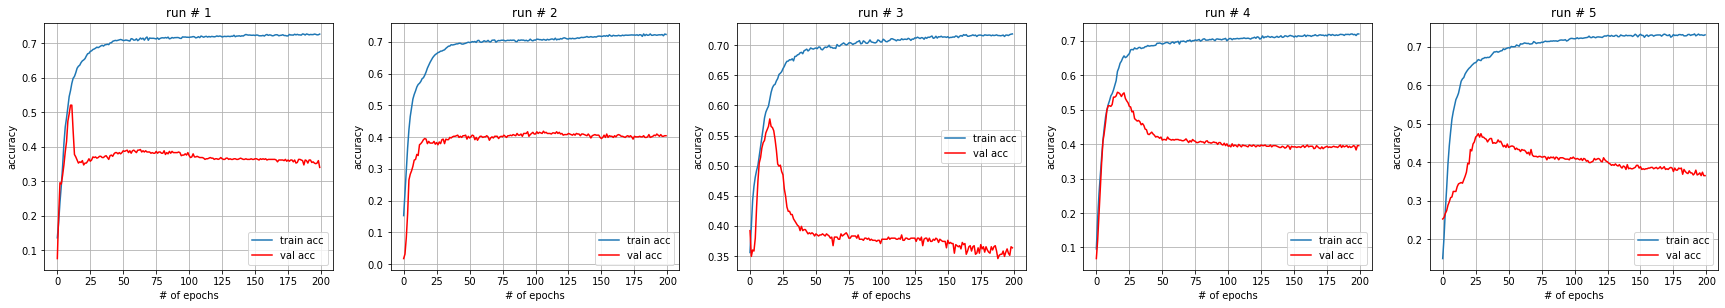

In [ ]:
plotting_five_runs(5,h_total_train_third_batches,h_total_val_third_batches)

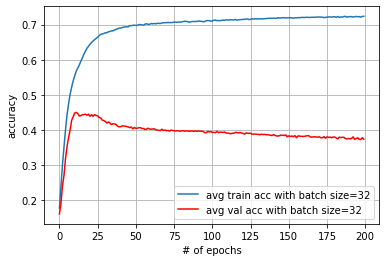

In [ ]:
h_avg_train=np.average(h_total_train_third_batches,axis=0)
h_avg_val=np.average(h_total_val_third_batches,axis=0)
plt.plot(h_avg_train)
plt.plot(h_avg_val, 'r')
plt.legend(['avg train acc with batch size=32', 'avg val acc with batch size=32'])
plt.xlabel("# of epochs")
plt.ylabel("accuracy")
plt.grid()

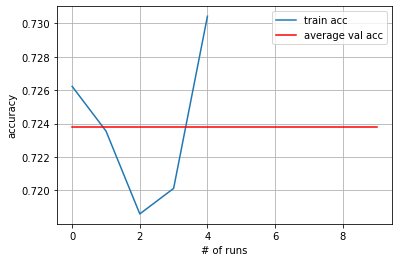

In [ ]:
plotting_train_acc_vs_average_train_acc(5,h_total_train_third_batches,h_total_val_third_batches)

# (3.2)

# With one hidden layer & 20 neouron

In [43]:
#add another hidden layer to test the performance
h_total_train_one_hidden_with20=np.empty((0,10))
h_total_val_one_hidden_with20=np.empty((0,10))
h_total_test_one_hidden_with20=np.empty((0,10))
total_acc_one_hidden_with20=[]

In [46]:
h_total_train_one_hidden_with20,h_total_val_one_hidden_with20,h_total_test_one_hidden_with20,total_acc_one_hidden_with20=create_mlp_get_total_acc(128,20,X_train_pca,y_train,X_val_pca,y_val,X_test_pca,y_test)

Max & Min & Avarrage Training accuracy Using** Batch size =128** and one hidden layer and 20 neourons

In [51]:
max_acc_train_1h20,min_acc_train_1h20,avg_acc_train_1h20=get_max_min_avg_acc(h_total_train_one_hidden_with20)

In [52]:
print(max(max_acc_train_1h20))
print(min(min_acc_train_1h20))
print(Average(avg_acc_train_1h20))

0.7487590909004211
0.09927453100681305
0.7109530348777774


Max & Min & Avarrage Testing accuracy Using** Batch size =128** and one hidden layer and 20 neourons

In [53]:
max_acc_test_1h20,min_acc_test_1h20,avg_acc_test_1h20=get_max_min_avg_acc(total_acc_one_hidden_with20)
print(max_acc_test_1h20,min_acc_test_1h20,avg_acc_test_1h20)

0    0.750446
dtype: float64 0    0.734403
dtype: float64 0.7440285086631775


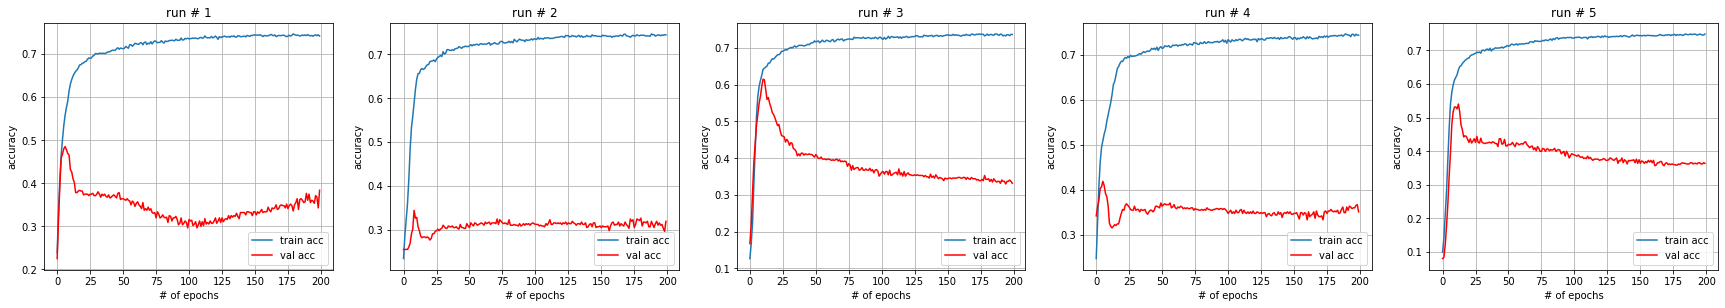

In [54]:
plotting_five_runs(5,h_total_train_one_hidden_with20,h_total_val_one_hidden_with20)

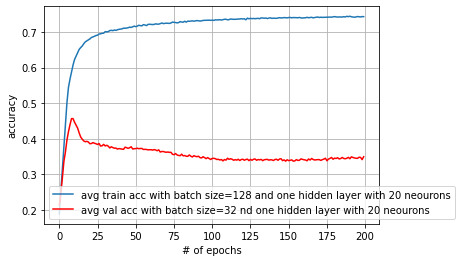

In [55]:
h_avg_train=np.average(h_total_train_one_hidden_with20,axis=0)
h_avg_val=np.average(h_total_val_one_hidden_with20,axis=0)
plt.plot(h_avg_train)
plt.plot(h_avg_val, 'r')
plt.legend(['avg train acc with batch size=128 and one hidden layer with 20 neourons', 'avg val acc with batch size=32 nd one hidden layer with 20 neourons'])
plt.xlabel("# of epochs")
plt.ylabel("accuracy")
plt.grid()

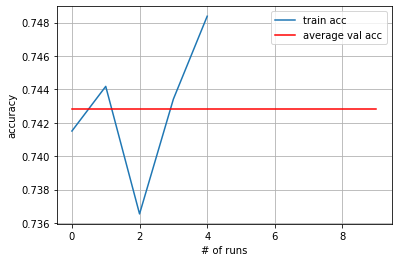

In [56]:
plotting_train_acc_vs_average_train_acc(5,h_total_train_one_hidden_with20,h_total_val_one_hidden_with20)

## **With one hidden layer & 30 neouron**

In [ ]:
#add another hidden layer to test the performance
h_total_train_one_hidden_with30=np.empty((0,10))
h_total_val_one_hidden_with30=np.empty((0,10))
h_total_test_one_hidden_with30=np.empty((0,10))
total_acc_one_hidden_with30=[]

In [ ]:
h_total_train_one_hidden_with30,h_total_val_one_hidden_with30,h_total_test_one_hidden_with30,total_acc_one_hidden_with30=create_mlp_get_total_acc(34,30,X_train_pca,y_train,X_val_pca,y_val,X_test_pca,y_test)

Max & Min & Avarrage Training accuracy Using** Batch size =34** and one hidden layer and 30 neourons

In [ ]:
max_acc_train_1h30,min_acc_train_1h30,avg_acc_train_1h30=get_max_min_avg_acc(h_total_train_one_hidden_with30)

In [ ]:
print(max(max_acc_train_1h30))
print(min(min_acc_train_1h30))
print(Average(avg_acc_train_1h30))

0.7437953352928162
0.2539137005805969
0.7216807936131948


Max & Min & Avarrage Training accuracy Using** Batch size =34** and one hidden layer and 30 neourons

In [ ]:
max_acc_test_1h30,min_acc_test_1h30,avg_acc_test_1h30=get_max_min_avg_acc(total_acc_one_hidden_with30)
print(max_acc_test_1h30,min_acc_test_1h30,avg_acc_test_1h30)

0    0.745098
dtype: float64 0    0.720143
dtype: float64 0.7365418910980225


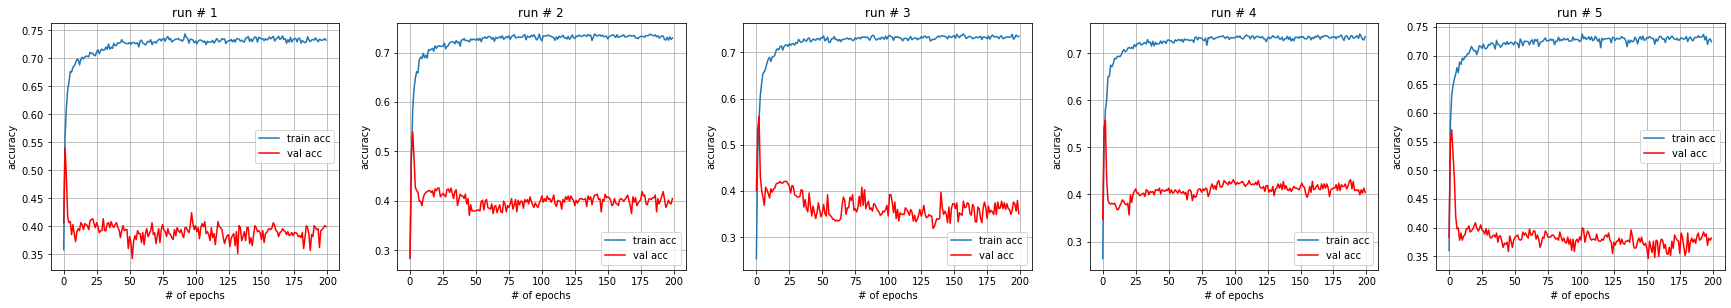

In [ ]:
plotting_five_runs(5,h_total_train_one_hidden_with30,h_total_val_one_hidden_with30)

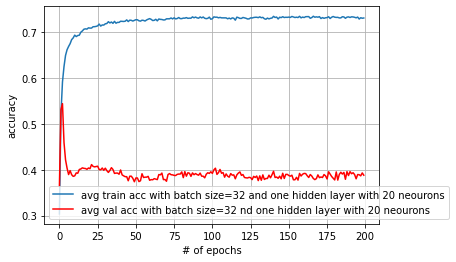

In [ ]:
h_avg_train=np.average(h_total_train_one_hidden_with30,axis=0)
h_avg_val=np.average(h_total_val_one_hidden_with30,axis=0)
plt.plot(h_avg_train)
plt.plot(h_avg_val, 'r')
plt.legend(['avg train acc with batch size=32 and one hidden layer with 20 neourons', 'avg val acc with batch size=32 nd one hidden layer with 20 neourons'])
plt.xlabel("# of epochs")
plt.ylabel("accuracy")
plt.grid()

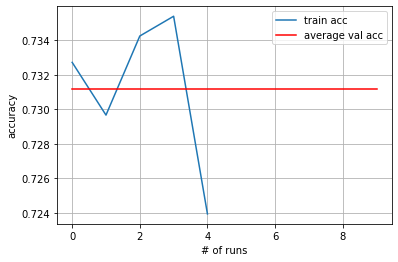

In [ ]:
plotting_train_acc_vs_average_train_acc(5,h_total_train_one_hidden_with30,h_total_val_one_hidden_with30)

# **With one hidden layer & 40 neouron**

In [57]:
#add another hidden layer to test the performance
h_total_train_one_hidden_with40=np.empty((0,10))
h_total_val_one_hidden_with40=np.empty((0,10))
h_total_test_one_hidden_with40=np.empty((0,10))
total_acc_one_hidden_with40=[]

In [58]:
h_total_train_one_hidden_with40,h_total_val_one_hidden_with40,h_total_test_one_hidden_with40,total_acc_one_hidden_with40=create_mlp_get_total_acc(34,40,X_train_pca,y_train,X_val_pca,y_val,X_test_pca,y_test)

Max & Min & Avarrage Training accuracy Using** Batch size =128** and one hidden layer and 40 neourons

In [59]:
max_acc_train_1h40,min_acc_train_1h40,avg_acc_train_1h40=get_max_min_avg_acc(h_total_train_one_hidden_with40)

In [60]:
print(max(max_acc_train_1h40))
print(min(min_acc_train_1h40))
print(Average(avg_acc_train_1h40))

0.7453226447105408
0.303932785987854
0.7265448651611806


Max & Min & Avarrage Testing accuracy Using** Batch size =128** and one hidden layer and 40 neourons

In [61]:
max_acc_test_1h40,min_acc_test_1h40,avg_acc_test_1h40=get_max_min_avg_acc(total_acc_one_hidden_with40)
print(max_acc_test_1h40,min_acc_test_1h40,avg_acc_test_1h40)

0    0.759358
dtype: float64 0    0.73262
dtype: float64 0.7426024913787842


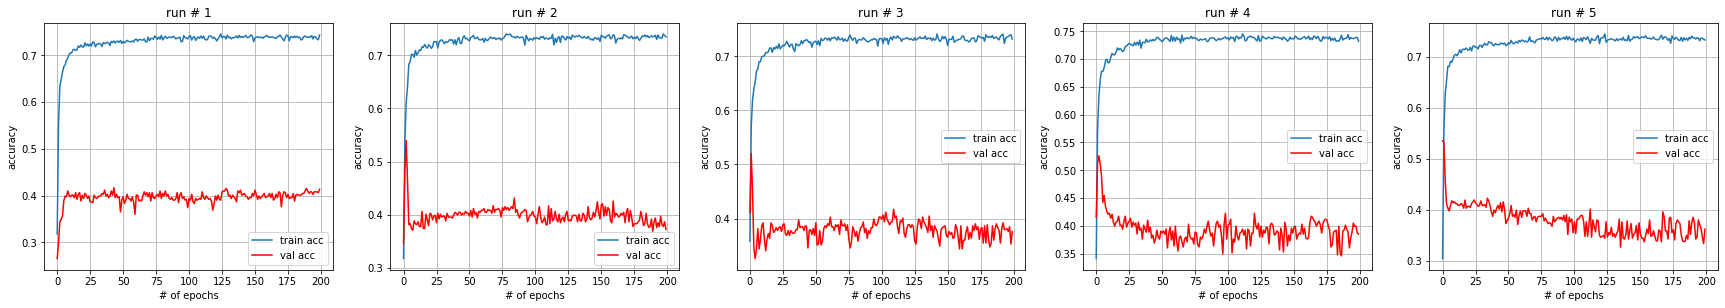

In [62]:
plotting_five_runs(5,h_total_train_one_hidden_with40,h_total_val_one_hidden_with40)

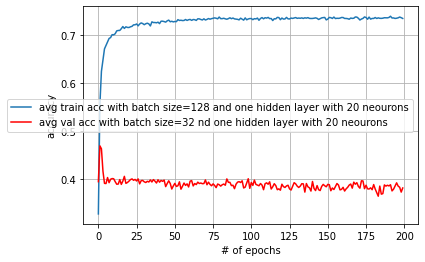

In [63]:
h_avg_train=np.average(h_total_train_one_hidden_with40,axis=0)
h_avg_val=np.average(h_total_val_one_hidden_with40,axis=0)
plt.plot(h_avg_train)
plt.plot(h_avg_val, 'r')
plt.legend(['avg train acc with batch size=128 and one hidden layer with 20 neourons', 'avg val acc with batch size=32 nd one hidden layer with 20 neourons'])
plt.xlabel("# of epochs")
plt.ylabel("accuracy")
plt.grid()

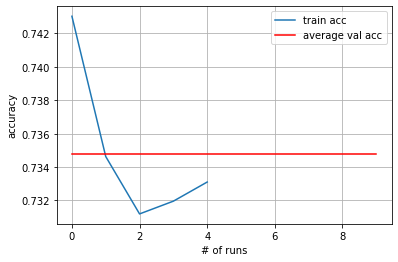

In [64]:
plotting_train_acc_vs_average_train_acc(5,h_total_train_one_hidden_with40,h_total_val_one_hidden_with40)

# **With Two hidden layer & 10 neouron**

In [ ]:
def create_mlp_two_hidden_get_total_acc(batch_size,num_n,X_train_pca,y_train,X_val_pca,y_val,X_test_pca,y_test):
  #add another hidden layer to test the performance
  h_total_train=np.empty((0,10))
  h_total_val=np.empty((0,10))
  h_total_test=np.empty((0,10))
  total_acc=[]
  number_of_runs=5
  for i in range(number_of_runs):
    
    mlp=keras.models.Sequential()
    mlp.add(keras.layers.Dense(num_n, activation='relu', ))
    mlp.add(keras.layers.Dense(num_n, activation='relu', ))
    mlp.add(keras.layers.Dense(6, activation='softmax', ))
    

    optimizer = tfa.optimizers.AdamW(learning_rate=0.001, weight_decay=0.001)
    mlp.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    h = mlp.fit(X_train_pca,y_train,validation_data =(X_val_pca, y_val), epochs=10,verbose=0,batch_size=batch_size)
    h_total_train=np.append(h_total_train,np.array([h.history['accuracy']]),axis=0)
    h_total_val=np.append(h_total_val,np.array([h.history['val_accuracy']]),axis=0)

    total_acc.append(mlp.evaluate(X_test_pca,y_test, verbose=0)[1])
  return h_total_train,h_total_val,h_total_test,total_acc

In [ ]:

h_total_train_two_hidden_with10=np.empty((0,5))
h_total_val_two_hidden_with10=np.empty((0,5))
h_total_test_two_hidden_with10=np.empty((0,5))
total_acc_two_hidden_with10=[]

In [ ]:
h_total_train_two_hidden_with10,h_total_val_two_hidden_with10,h_total_test_two_hidden_with10,total_acc_two_hidden_with10=create_mlp_two_hidden_get_total_acc(128,10,X_train_pca,y_train,X_val_pca,y_val,X_test_pca,y_test)

Max & Min & Avarrage Training accuracy Using** Batch size =128** and two hidden layer and 10 neourons

In [ ]:
max_acc_train_2h10,min_acc_train_2h10,avg_acc_train_2h10=get_max_min_avg_acc(h_total_train_two_hidden_with10)

In [ ]:
print(max(max_acc_train_2h10))
print(min(min_acc_train_2h10))
print(Average(avg_acc_train_2h10))

0.6365025043487549
0.08552882820367813
0.47584574595093726


Max & Min & Avarrage Testing accuracy Using** Batch size =128** and two hidden layer and 10 neourons

In [ ]:
max_acc_test_2h10,min_acc_test_2h10,avg_acc_test_2h10=get_max_min_avg_acc(total_acc_two_hidden_with10)
print(max_acc_test_2h10,min_acc_test_2h10,avg_acc_test_2h10)

0    0.666667
dtype: float64 0    0.593583
dtype: float64 0.6349376082420349


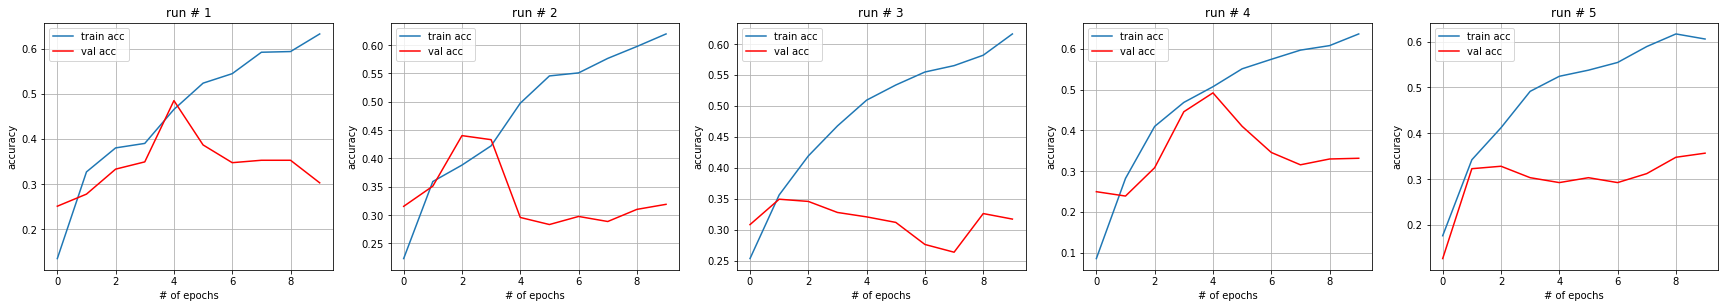

In [ ]:
plotting_five_runs(5,h_total_train_two_hidden_with10,h_total_val_two_hidden_with10)

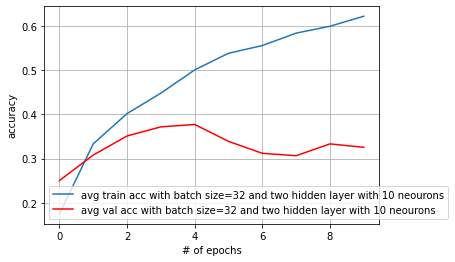

In [ ]:
h_avg_train=np.average(h_total_train_two_hidden_with10,axis=0)
h_avg_val=np.average(h_total_val_two_hidden_with10,axis=0)
plt.plot(h_avg_train)
plt.plot(h_avg_val, 'r')
plt.legend(['avg train acc with batch size=128 and two hidden layer with 10 neourons', 'avg val acc with batch size=32 and two hidden layer with 10 neourons'])
plt.xlabel("# of epochs")
plt.ylabel("accuracy")
plt.grid()

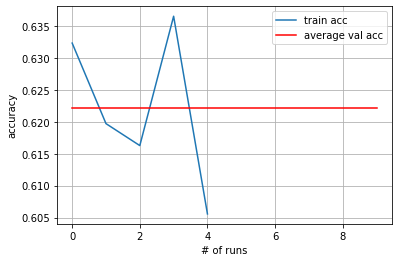

In [ ]:
plotting_train_acc_vs_average_train_acc(5,h_total_train_two_hidden_with10,h_total_val_two_hidden_with10)

# **With Two hidden layer & 20 neouron**

In [ ]:
h_total_train_two_hidden_with20=np.empty((0,10))
h_total_val_two_hidden_with20=np.empty((0,10))
h_total_test_two_hidden_with20=np.empty((0,10))
total_acc_two_hidden_with20=[]

In [ ]:
h_total_train_two_hidden_with20,h_total_val_two_hidden_with20,h_total_test_two_hidden_with20,total_acc_two_hidden_with20=create_mlp_two_hidden_get_total_acc(128,10,X_train_pca,y_train,X_val_pca,y_val,X_test_pca,y_test)

Max & Min & Avarrage Training accuracy Using** Batch size =128** and two hidden layer and 20 neourons

In [ ]:
max_acc_train_2h20,min_acc_train_2h20,avg_acc_train_2h20=get_max_min_avg_acc(h_total_train_two_hidden_with20)

In [ ]:
print(max(max_acc_train_2h20))
print(min(min_acc_train_2h20))
print(Average(avg_acc_train_2h20))

0.6708667278289795
0.1569301187992096
0.5008018276095391


Max & Min & Avarrage Testing accuracy Using** Batch size =128** and two hidden layer and 20 neourons

In [ ]:
max_acc_test_2h20,min_acc_test_2h20,avg_acc_test_2h20=get_max_min_avg_acc(total_acc_two_hidden_with20)
print(max_acc_test_2h20,min_acc_test_2h20,avg_acc_test_2h20)

0    0.664884
dtype: float64 0    0.593583
dtype: float64 0.6377896666526794


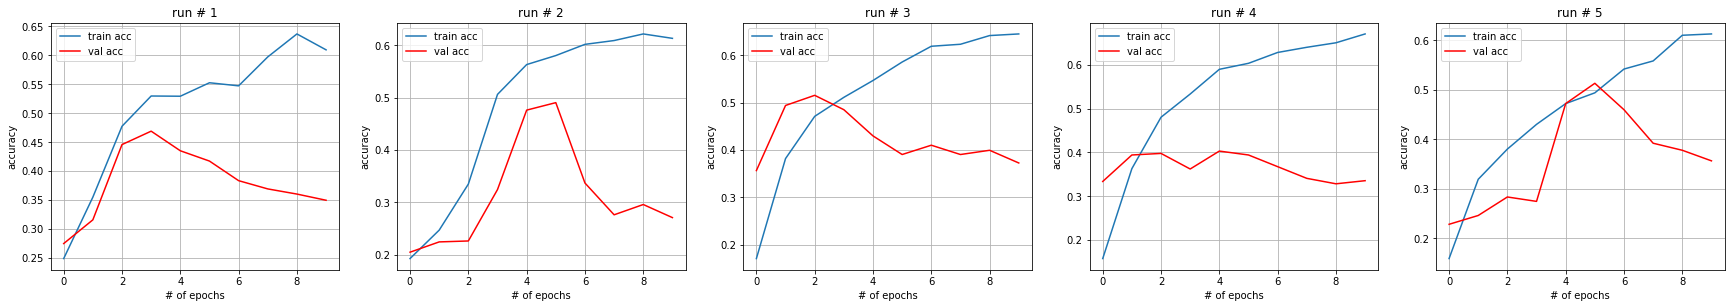

In [ ]:
plotting_five_runs(5,h_total_train_two_hidden_with20,h_total_val_two_hidden_with20)

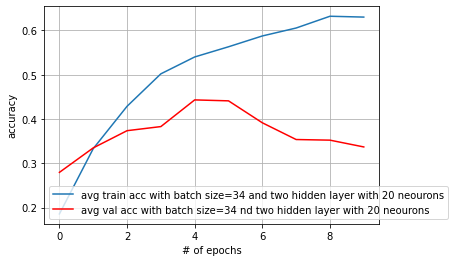

In [ ]:
h_avg_train=np.average(h_total_train_two_hidden_with20,axis=0)
h_avg_val=np.average(h_total_val_two_hidden_with20,axis=0)
plt.plot(h_avg_train)
plt.plot(h_avg_val, 'r')
plt.legend(['avg train acc with batch size=128 and two hidden layer with 20 neourons', 'avg val acc with batch size=34 nd two hidden layer with 20 neourons'])
plt.xlabel("# of epochs")
plt.ylabel("accuracy")
plt.grid()

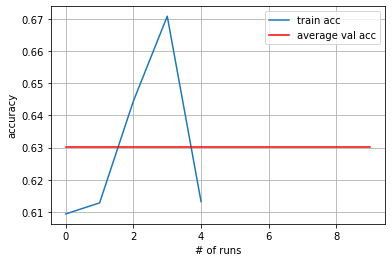

In [ ]:
plotting_train_acc_vs_average_train_acc(5,h_total_train_two_hidden_with20,h_total_val_two_hidden_with20)

# **With Two hidden layer & 30 neouron**

In [ ]:
h_total_train_two_hidden_with30=np.empty((0,10))
h_total_val_two_hidden_with30=np.empty((0,10))
h_total_test_two_hidden_with30=np.empty((0,10))
total_acc_two_hidden_with30=[]

In [ ]:
h_total_train_two_hidden_with30,h_total_val_two_hidden_with30,h_total_test_two_hidden_with30,total_acc_two_hidden_with30=create_mlp_two_hidden_get_total_acc(128,30,X_train_pca,y_train,X_val_pca,y_val,X_test_pca,y_test)

Max & Min & Avarrage Training accuracy Using** Batch size =128** and two hidden layer and 30 neourons

In [ ]:
max_acc_train_2h30,min_acc_train_2h30,avg_acc_train_2h30=get_max_min_avg_acc(h_total_train_two_hidden_with30)

In [ ]:
print(max(max_acc_train_2h30))
print(min(min_acc_train_2h30))
print(Average(avg_acc_train_2h30))

0.7216494679450989
0.4043528139591217
0.6549599081277847


Max & Min & Avarrage Testing accuracy Using** Batch size =128** and two hidden layer and 30 neourons

In [ ]:
max_acc_test_2h30,min_acc_test_2h30,avg_acc_test_2h30=get_max_min_avg_acc(total_acc_two_hidden_with30)
print(max_acc_test_2h30,min_acc_test_2h30,avg_acc_test_2h30)

0    0.745098
dtype: float64 0    0.707665
dtype: float64 0.7240641832351684


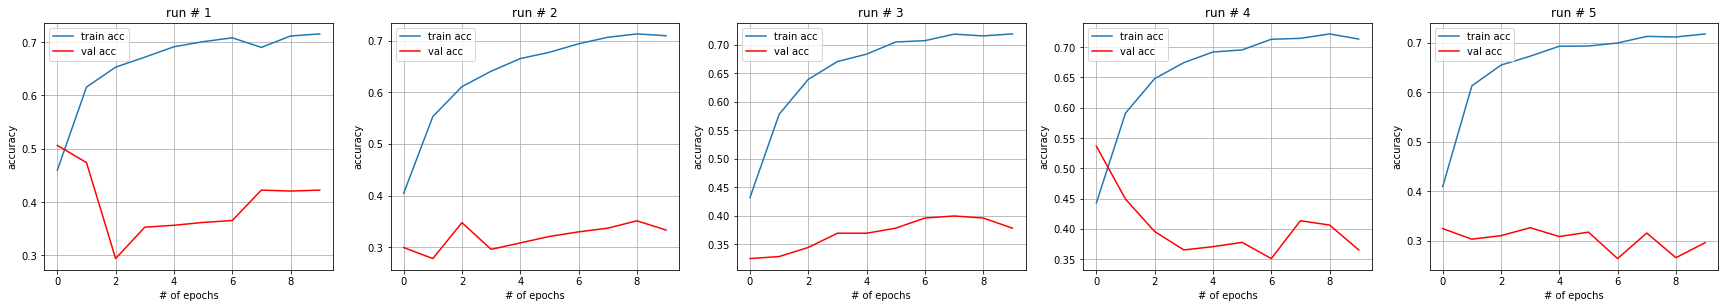

In [ ]:
plotting_five_runs(5,h_total_train_two_hidden_with30,h_total_val_two_hidden_with30)

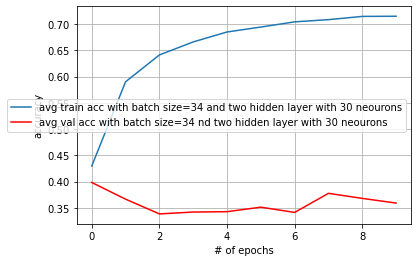

In [ ]:
h_avg_train=np.average(h_total_train_two_hidden_with30,axis=0)
h_avg_val=np.average(h_total_val_two_hidden_with30,axis=0)
plt.plot(h_avg_train)
plt.plot(h_avg_val, 'r')
plt.legend(['avg train acc with batch size=128 and two hidden layer with 30 neourons', 'avg val acc with batch size=34 nd two hidden layer with 30 neourons'])
plt.xlabel("# of epochs")
plt.ylabel("accuracy")
plt.grid()

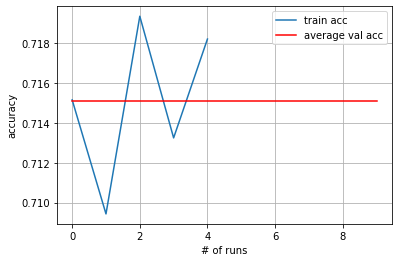

In [ ]:
plotting_train_acc_vs_average_train_acc(5,h_total_train_two_hidden_with30,h_total_val_two_hidden_with30)

# **With Two hidden layer & 40 neouron**

In [ ]:
h_total_train_two_hidden_with40=np.empty((0,10))
h_total_val_two_hidden_with40=np.empty((0,10))
h_total_test_two_hidden_with40=np.empty((0,10))
total_acc_two_hidden_with40=[]

In [ ]:
h_total_train_two_hidden_with40,h_total_val_two_hidden_with40,h_total_test_two_hidden_with40,total_acc_two_hidden_with40=create_mlp_two_hidden_get_total_acc(128,40,X_train_pca,y_train,X_val_pca,y_val,X_test_pca,y_test)

Max & Min & Avarrage Training accuracy Using** Batch size =128** and two hidden layer and 40 neourons

In [ ]:
max_acc_train_2h40,min_acc_train_2h40,avg_acc_train_2h40=get_max_min_avg_acc(h_total_train_two_hidden_with40)

In [ ]:
print(max(max_acc_train_2h40))
print(min(min_acc_train_2h40))
print(Average(avg_acc_train_2h40))

0.7262313961982727
0.4272623062133789
0.6672546756267548


Max & Min & Avarrage Testing accuracy Using** Batch size =128** and two hidden layer and 40 neourons

In [ ]:
max_acc_test_2h40,min_acc_test_2h40,avg_acc_test_2h40=get_max_min_avg_acc(total_acc_two_hidden_with40)
print(max_acc_test_2h40,min_acc_test_2h40,avg_acc_test_2h40)

0    0.73975
dtype: float64 0    0.716578
dtype: float64 0.7315507888793945


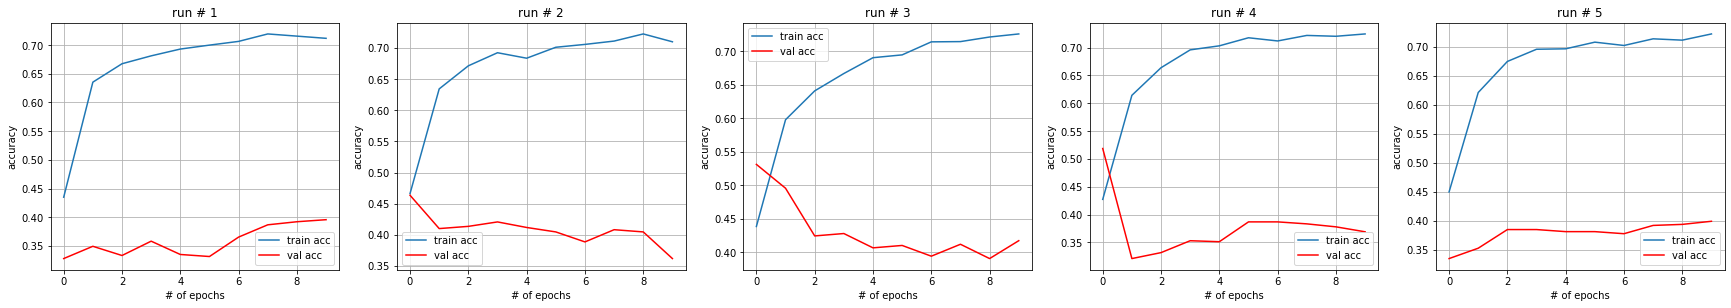

In [ ]:
plotting_five_runs(5,h_total_train_two_hidden_with40,h_total_val_two_hidden_with40)

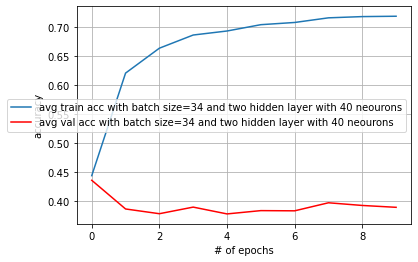

In [ ]:
h_avg_train=np.average(h_total_train_two_hidden_with40,axis=0)
h_avg_val=np.average(h_total_val_two_hidden_with40,axis=0)
plt.plot(h_avg_train)
plt.plot(h_avg_val, 'r')
plt.legend(['avg train acc with batch size=34 and two hidden layer with 40 neourons', 'avg val acc with batch size=34 and two hidden layer with 40 neourons'])
plt.xlabel("# of epochs")
plt.ylabel("accuracy")
plt.grid()

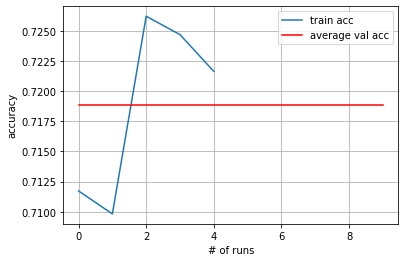

In [ ]:

plotting_train_acc_vs_average_train_acc(5,h_total_train_two_hidden_with40,h_total_val_two_hidden_with40)

# **With four hidden layer & 10 neouron**

In [ ]:
def create_mlp_four_hidden_get_total_acc(batch_size,num_n,X_train_pca,y_train,X_val_pca,y_val,X_test_pca,y_test):
  #add another hidden layer to test the performance
  h_total_train=np.empty((0,10))
  h_total_val=np.empty((0,10))
  h_total_test=np.empty((0,10))
  total_acc=[]
  number_of_runs=5
  for i in range(number_of_runs):
    
    mlp=keras.models.Sequential()
    mlp.add(keras.layers.Dense(num_n, activation='relu', ))
    mlp.add(keras.layers.Dense(num_n, activation='relu', ))
    mlp.add(keras.layers.Dense(num_n, activation='relu', ))
    mlp.add(keras.layers.Dense(num_n, activation='relu', ))
  
    mlp.add(keras.layers.Dense(6, activation='softmax', ))
    

    optimizer = tfa.optimizers.AdamW(learning_rate=0.001, weight_decay=0.001)
    mlp.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    h = mlp.fit(X_train_pca,y_train,validation_data =(X_val_pca, y_val), epochs=10,verbose=0,batch_size=batch_size)
    h_total_train=np.append(h_total_train,np.array([h.history['accuracy']]),axis=0)
    h_total_val=np.append(h_total_val,np.array([h.history['val_accuracy']]),axis=0)

    total_acc.append(mlp.evaluate(X_test_pca,y_test, verbose=0)[1])
  return h_total_train,h_total_val,h_total_test,total_acc

In [ ]:
h_total_train_four_hidden_with10=np.empty((0,10))
h_total_val_four_hidden_with10=np.empty((0,10))
h_total_test_four_hidden_with10=np.empty((0,10))
total_acc_four_hidden_with10=[]

In [ ]:
h_total_train_four_hidden_with10,h_total_val_four_hidden_with10,h_total_test_four_hidden_with10,total_acc_four_hidden_with10=create_mlp_four_hidden_get_total_acc(128,10,X_train_pca,y_train,X_val_pca,y_val,X_test_pca,y_test)

Max & Min & Avarrage Training accuracy Using** Batch size =128** and four hidden layer and 10 neourons

In [ ]:
max_acc_train_4h10,min_acc_train_4h10,avg_acc_train_4h10=get_max_min_avg_acc(h_total_train_four_hidden_with10)

In [ ]:
print(max(max_acc_train_4h10))
print(min(min_acc_train_4h10))
print(Average(avg_acc_train_4h10))

0.6762123107910156
0.23520427942276
0.5167086648941039


Max & Min & Avarrage Testing accuracy Using** Batch size =128** and four hidden layer and 10 neourons

In [ ]:
max_acc_test_4h10,min_acc_test_4h10,avg_acc_test_4h10=get_max_min_avg_acc(total_acc_four_hidden_with10)
print(max_acc_test_4h10,min_acc_test_4h10,avg_acc_test_4h10)

0    0.659537
dtype: float64 0    0.54902
dtype: float64 0.6192513465881347


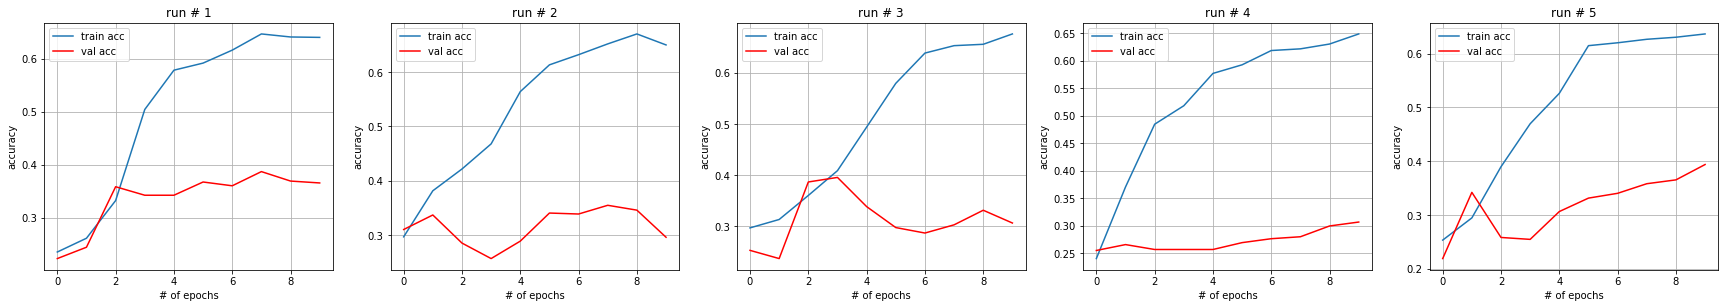

In [ ]:
plotting_five_runs(5,h_total_train_four_hidden_with10,h_total_val_four_hidden_with10)

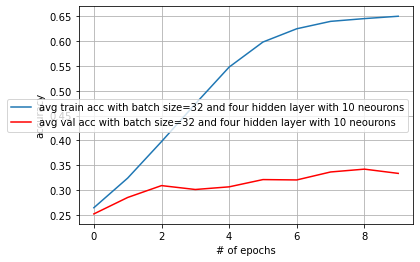

In [ ]:
h_avg_train=np.average(h_total_train_four_hidden_with10,axis=0)
h_avg_val=np.average(h_total_val_four_hidden_with10,axis=0)
plt.plot(h_avg_train)
plt.plot(h_avg_val, 'r')
plt.legend(['avg train acc with batch size=128 and four hidden layer with 10 neourons', 'avg val acc with batch size=32 and four hidden layer with 10 neourons'])
plt.xlabel("# of epochs")
plt.ylabel("accuracy")
plt.grid()

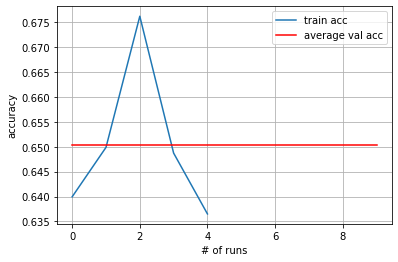

In [ ]:
plotting_train_acc_vs_average_train_acc(5,h_total_train_four_hidden_with10,h_total_val_four_hidden_with10)

# **With four hidden layer & 20 neouron**

In [ ]:
h_total_train_four_hidden_with20=np.empty((0,10))
h_total_val_four_hidden_with20=np.empty((0,10))
h_total_test_four_hidden_with20=np.empty((0,10))
total_acc_four_hidden_with20=[]

In [ ]:
h_total_train_four_hidden_with20,h_total_val_four_hidden_with20,h_total_test_four_hidden_with20,total_acc_four_hidden_with20=create_mlp_four_hidden_get_total_acc(128,20,X_train_pca,y_train,X_val_pca,y_val,X_test_pca,y_test)

Max & Min & Avarrage Training accuracy Using** Batch size =128** and four hidden layer and 20 neourons

In [ ]:
max_acc_train_4h20,min_acc_train_4h20,avg_acc_train_4h20=get_max_min_avg_acc(h_total_train_four_hidden_with20)

In [ ]:
print(max(max_acc_train_4h20))
print(min(min_acc_train_4h20))
print(Average(avg_acc_train_4h20))

0.7239404320716858
0.2665139436721802
0.6233982425928115


Max & Min & Avarrage Testing accuracy Using** Batch size =128** and four hidden layer and 20 neourons

In [ ]:
max_acc_test_4h20,min_acc_test_4h20,avg_acc_test_4h20=get_max_min_avg_acc(total_acc_four_hidden_with20)
print(max_acc_test_4h20,min_acc_test_4h20,avg_acc_test_4h20)

0    0.73262
dtype: float64 0    0.643494
dtype: float64 0.696256673336029


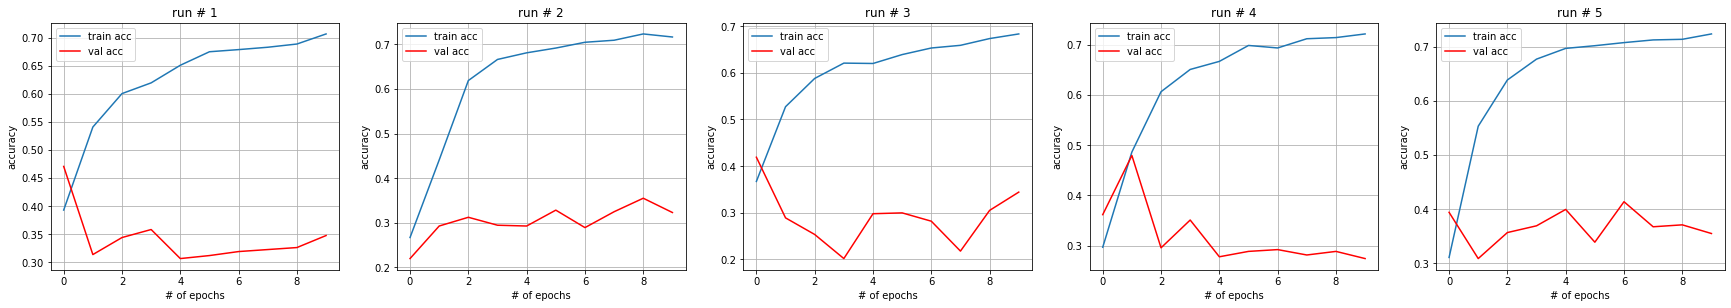

In [ ]:
plotting_five_runs(5,h_total_train_four_hidden_with20,h_total_val_four_hidden_with20)

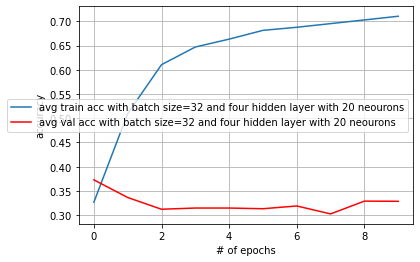

In [ ]:
h_avg_train=np.average(h_total_train_four_hidden_with20,axis=0)
h_avg_val=np.average(h_total_val_four_hidden_with20,axis=0)
plt.plot(h_avg_train)
plt.plot(h_avg_val, 'r')
plt.legend(['avg train acc with batch size=32 and four hidden layer with 20 neourons', 'avg val acc with batch size=32 and four hidden layer with 20 neourons'])
plt.xlabel("# of epochs")
plt.ylabel("accuracy")
plt.grid()

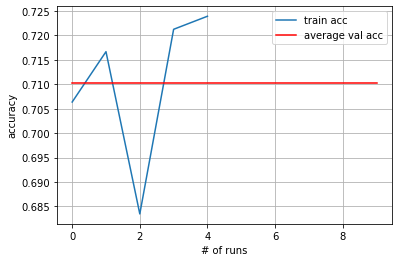

In [ ]:
plotting_train_acc_vs_average_train_acc(5,h_total_train_four_hidden_with20,h_total_val_four_hidden_with20)

# **With four hidden layer & 30 neouron**

In [ ]:
h_total_train_four_hidden_with30=np.empty((0,10))
h_total_val_four_hidden_with30=np.empty((0,10))
h_total_test_four_hidden_with30=np.empty((0,10))
total_acc_four_hidden_with30=[]

In [ ]:
h_total_train_four_hidden_with30,h_total_val_four_hidden_with30,h_total_test_four_hidden_with30,total_acc_four_hidden_with30=create_mlp_four_hidden_get_total_acc(128,30,X_train_pca,y_train,X_val_pca,y_val,X_test_pca,y_test)

Max & Min & Avarrage Training accuracy Using** Batch size =128** and four hidden layer and 30 neourons

In [ ]:
max_acc_train_4h30,min_acc_train_4h30,avg_acc_train_4h30=get_max_min_avg_acc(h_total_train_four_hidden_with30)

In [ ]:
print(max(max_acc_train_4h30))
print(min(min_acc_train_4h30))
print(Average(avg_acc_train_4h30))

0.7361588478088379
0.3169148564338684
0.6599847292900085


Max & Min & Avarrage Testing accuracy Using** Batch size =128** and four hidden layer and 30 neourons

In [ ]:
max_acc_test_4h30,min_acc_test_4h30,avg_acc_test_4h30=get_max_min_avg_acc(total_acc_four_hidden_with30)
print(max_acc_test_4h30,min_acc_test_4h30,avg_acc_test_4h30)

0    0.752228
dtype: float64 0    0.73262
dtype: float64 0.7379678964614869


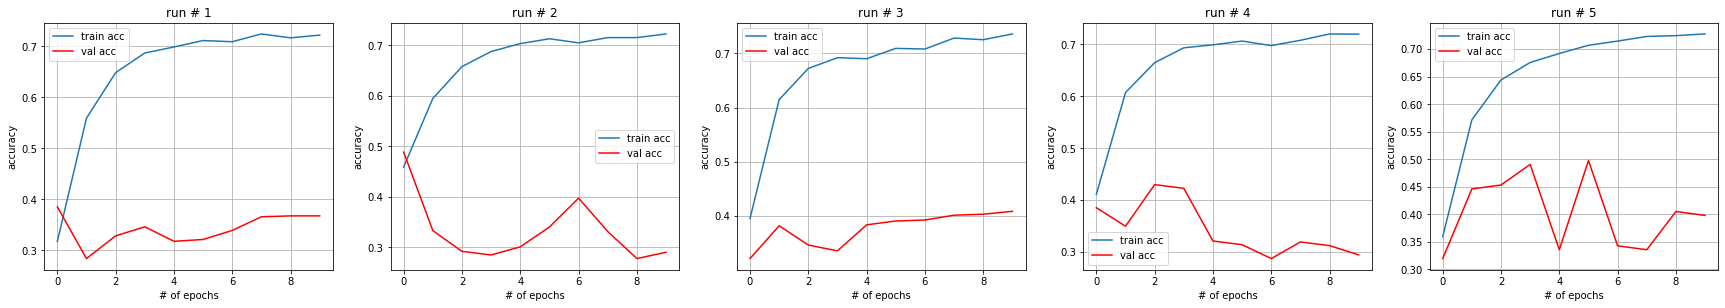

In [ ]:
plotting_five_runs(5,h_total_train_four_hidden_with30,h_total_val_four_hidden_with30)

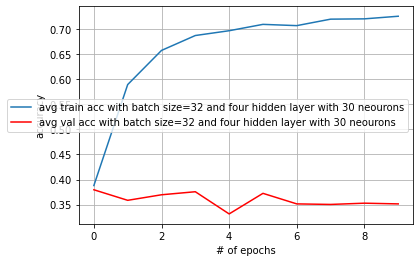

In [ ]:
h_avg_train=np.average(h_total_train_four_hidden_with30,axis=0)
h_avg_val=np.average(h_total_val_four_hidden_with30,axis=0)
plt.plot(h_avg_train)
plt.plot(h_avg_val, 'r')
plt.legend(['avg train acc with batch size=128 and four hidden layer with 30 neourons', 'avg val acc with batch size=32 and four hidden layer with 30 neourons'])
plt.xlabel("# of epochs")
plt.ylabel("accuracy")
plt.grid()

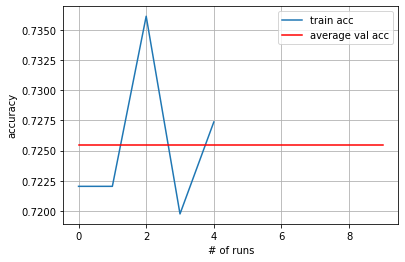

In [ ]:
plotting_train_acc_vs_average_train_acc(5,h_total_train_four_hidden_with30,h_total_val_four_hidden_with30)

# **With four hidden layer & 40 neouron**

In [ ]:
h_total_train_four_hidden_with40=np.empty((0,10))
h_total_val_four_hidden_with40=np.empty((0,10))
h_total_test_four_hidden_with40=np.empty((0,10))
total_acc_four_hidden_with40=[]

In [ ]:
h_total_train_four_hidden_with40,h_total_val_four_hidden_with40,h_total_test_four_hidden_with40,total_acc_four_hidden_with40=create_mlp_four_hidden_get_total_acc(128,40,X_train_pca,y_train,X_val_pca,y_val,X_test_pca,y_test)

Max & Min & Avarrage Training accuracy Using** Batch size =128** and four hidden layer and 40 neourons

In [ ]:
max_acc_train_4h40,min_acc_train_4h40,avg_acc_train_4h40=get_max_min_avg_acc(h_total_train_four_hidden_with40)

In [ ]:
print(max(max_acc_train_4h40))
print(min(min_acc_train_4h40))
print(Average(avg_acc_train_4h40))

0.7403588891029358
0.3879343271255493
0.6841542607545852


Max & Min & Avarrage Testing accuracy Using** Batch size =128** and four hidden layer and 40 neourons

In [ ]:
max_acc_test_4h40,min_acc_test_4h40,avg_acc_test_4h40=get_max_min_avg_acc(total_acc_four_hidden_with40)
print(max_acc_test_4h40,min_acc_test_4h40,avg_acc_test_4h40)

0    0.759358
dtype: float64 0    0.675579
dtype: float64 0.7140820026397705


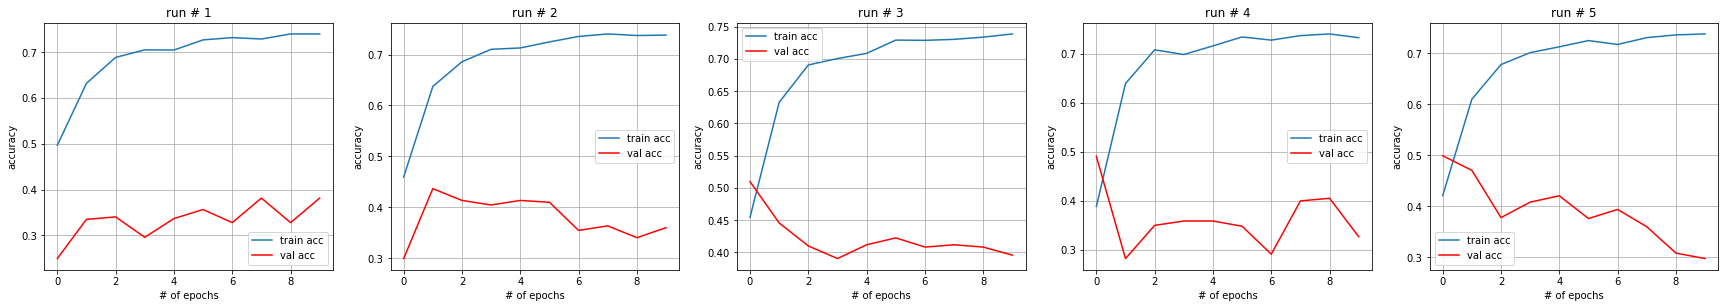

In [ ]:
plotting_five_runs(5,h_total_train_four_hidden_with40,h_total_val_four_hidden_with40)

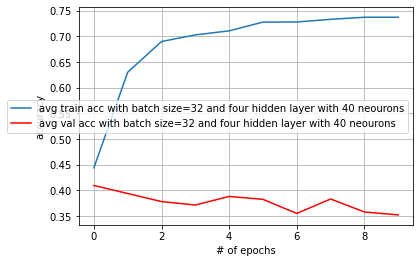

In [ ]:
h_avg_train=np.average(h_total_train_four_hidden_with40,axis=0)
h_avg_val=np.average(h_total_val_four_hidden_with40,axis=0)
plt.plot(h_avg_train)
plt.plot(h_avg_val, 'r')
plt.legend(['avg train acc with batch size=128 and four hidden layer with 40 neourons', 'avg val acc with batch size=32 and four hidden layer with 40 neourons'])
plt.xlabel("# of epochs")
plt.ylabel("accuracy")
plt.grid()

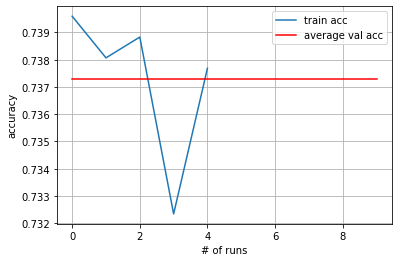

In [ ]:
plotting_train_acc_vs_average_train_acc(5,h_total_train_four_hidden_with40,h_total_val_four_hidden_with40)

# **With Eight hidden layer & 10 neouron**

In [ ]:
def create_mlp_eight_hidden_get_total_acc(batch_size,num_n,X_train_pca,y_train,X_val_pca,y_val,X_test_pca,y_test):
  #add another hidden layer to test the performance
  h_total_train=np.empty((0,10))
  h_total_val=np.empty((0,10))
  h_total_test=np.empty((0,10))
  total_acc=[]
  number_of_runs=5
  for i in range(number_of_runs):
    
    mlp=keras.models.Sequential()
    mlp.add(keras.layers.Dense(num_n, activation='relu', ))
    mlp.add(keras.layers.Dense(num_n, activation='relu', ))
    mlp.add(keras.layers.Dense(num_n, activation='relu', ))
    mlp.add(keras.layers.Dense(num_n, activation='relu', ))
    mlp.add(keras.layers.Dense(num_n, activation='relu', ))
    mlp.add(keras.layers.Dense(num_n, activation='relu', ))
    mlp.add(keras.layers.Dense(num_n, activation='relu', ))
    mlp.add(keras.layers.Dense(num_n, activation='relu', ))
  
    mlp.add(keras.layers.Dense(6, activation='softmax', ))
    

    optimizer = tfa.optimizers.AdamW(learning_rate=0.001, weight_decay=0.001)
    mlp.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    h = mlp.fit(X_train_pca,y_train,validation_data =(X_val_pca, y_val), epochs=10,verbose=0,batch_size=batch_size)
    h_total_train=np.append(h_total_train,np.array([h.history['accuracy']]),axis=0)
    h_total_val=np.append(h_total_val,np.array([h.history['val_accuracy']]),axis=0)

    total_acc.append(mlp.evaluate(X_test_pca,y_test, verbose=0)[1])
  return h_total_train,h_total_val,h_total_test,total_acc

In [ ]:
h_total_train_eight_hidden_with10=np.empty((0,10))
h_total_val_eight_hidden_with10=np.empty((0,10))
h_total_test_eight_hidden_with10=np.empty((0,10))
total_acc_eight_hidden_with10=[]

In [ ]:
h_total_train_eight_hidden_with10,h_total_val_eight_hidden_with10,h_total_test_eight_hidden_with10,total_acc_eight_hidden_with10=create_mlp_eight_hidden_get_total_acc(128,10,X_train_pca,y_train,X_val_pca,y_val,X_test_pca,y_test)

Max & Min & Avarrage Training accuracy Using** Batch size =128** and eight hidden layer and 10 neourons

In [ ]:
max_acc_train_8h10,min_acc_train_8h10,avg_acc_train_8h10=get_max_min_avg_acc(h_total_train_eight_hidden_with10)

In [ ]:
print(max(max_acc_train_8h10))
print(min(min_acc_train_8h10))
print(Average(avg_acc_train_8h10))

0.6571210622787476
0.2157311886548996
0.4877128684520722


Max & Min & Avarrage Testing accuracy Using** Batch size =128** and eight hidden layer and 10 neourons

In [ ]:
max_acc_test_8h10,min_acc_test_8h10,avg_acc_test_8h10=get_max_min_avg_acc(total_acc_eight_hidden_with10)
print(max_acc_test_8h10,min_acc_test_8h10,avg_acc_test_8h10)

0    0.680927
dtype: float64 0    0.575758
dtype: float64 0.6292335152626037


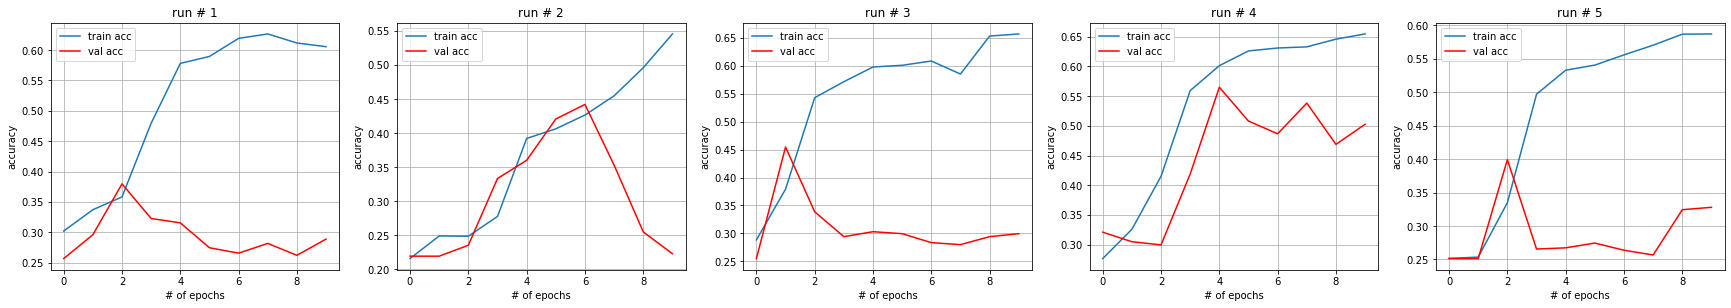

In [ ]:
plotting_five_runs(5,h_total_train_eight_hidden_with10,h_total_val_eight_hidden_with10)

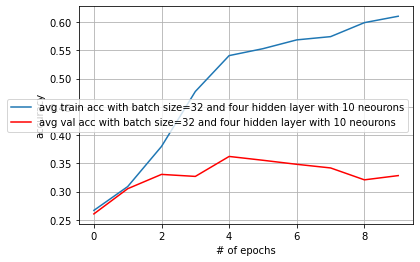

In [ ]:
h_avg_train=np.average(h_total_train_eight_hidden_with10,axis=0)
h_avg_val=np.average(h_total_val_eight_hidden_with10,axis=0)
plt.plot(h_avg_train)
plt.plot(h_avg_val, 'r')
plt.legend(['avg train acc with batch size=32 and four hidden layer with 10 neourons', 'avg val acc with batch size=32 and four hidden layer with 10 neourons'])
plt.xlabel("# of epochs")
plt.ylabel("accuracy")
plt.grid()

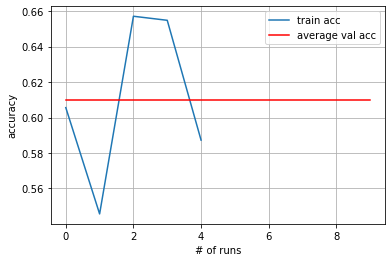

In [ ]:
plotting_train_acc_vs_average_train_acc(5,h_total_train_eight_hidden_with10,h_total_val_eight_hidden_with10)

# **With Eight hidden layer & 20 neouron**

In [ ]:
h_total_train_eight_hidden_with20=np.empty((0,10))
h_total_val_eight_hidden_with20=np.empty((0,10))
h_total_test_eight_hidden_with20=np.empty((0,10))
total_acc_eight_hidden_with20=[]

In [ ]:
h_total_train_eight_hidden_with20,h_total_val_eight_hidden_with20,h_total_test_eight_hidden_with20,total_acc_eight_hidden_with20=create_mlp_eight_hidden_get_total_acc(128,20,X_train_pca,y_train,X_val_pca,y_val,X_test_pca,y_test)

In [ ]:
h_total_train_eight_hidden_with20

array([[0.28178695, 0.3722795 , 0.58381063, 0.64986634, 0.68957615,
        0.69568539, 0.70103091, 0.71515846, 0.72317678, 0.71554029],
       [0.29247805, 0.4589538 , 0.58190149, 0.62008399, 0.63459337,
        0.63535702, 0.6365025 , 0.65292096, 0.68995798, 0.70026726],
       [0.3161512 , 0.40817106, 0.50362736, 0.56090111, 0.56510121,
        0.58457428, 0.59373808, 0.59182894, 0.6258114 , 0.63879341],
       [0.29095075, 0.50400919, 0.59068346, 0.62733871, 0.64413899,
        0.65330279, 0.65139365, 0.68003052, 0.69224894, 0.71019471],
       [0.30164185, 0.36426118, 0.41504392, 0.50210005, 0.53722793,
        0.5593738 , 0.58801067, 0.62466592, 0.65673923, 0.64910269]])

Max & Min & Avarrage Training accuracy Using** Batch size =128** and eight hidden layer and 20 neourons

In [ ]:
max_acc_train_8h20,min_acc_train_8h20,avg_acc_train_8h20=get_max_min_avg_acc(h_total_train_eight_hidden_with10)

In [ ]:
print(max(max_acc_train_8h20))
print(min(min_acc_train_8h20))
print(Average(avg_acc_train_8h20))

0.6571210622787476
0.2157311886548996
0.4877128684520722


Max & Min & Avarrage Testing accuracy Using** Batch size =128** and eight hidden layer and 20 neourons

In [ ]:
max_acc_test_8h20,min_acc_test_8h20,avg_acc_test_8h20=get_max_min_avg_acc(total_acc_eight_hidden_with20)
print(max_acc_test_8h20,min_acc_test_8h20,avg_acc_test_8h20)

0    0.734403
dtype: float64 0    0.632799
dtype: float64 0.6934046268463134


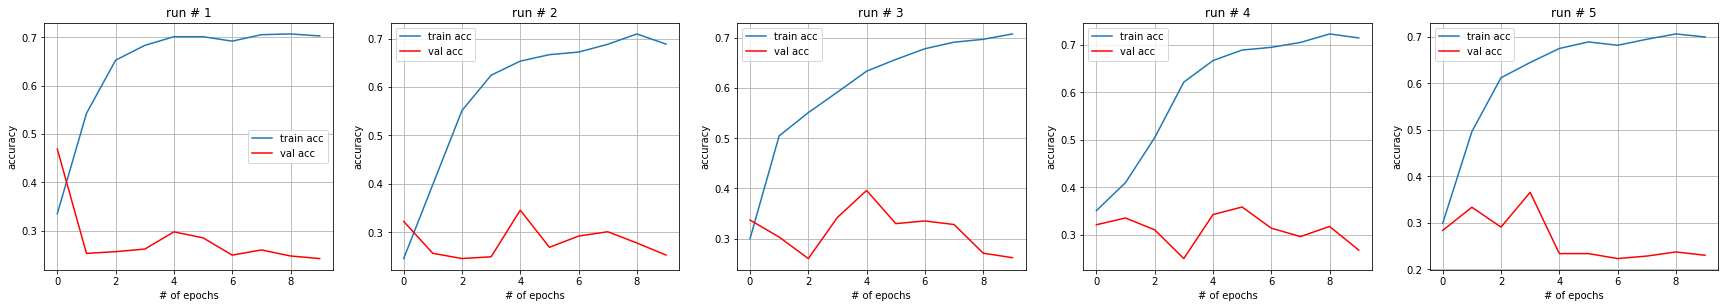

In [ ]:
plotting_five_runs(5,h_total_train_eight_hidden_with20,h_total_val_eight_hidden_with20)

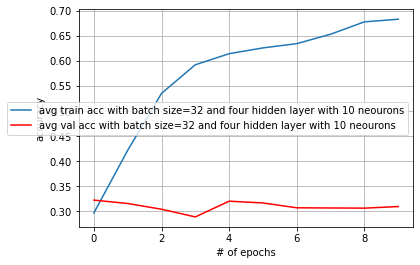

In [ ]:
h_avg_train=np.average(h_total_train_eight_hidden_with20,axis=0)
h_avg_val=np.average(h_total_val_eight_hidden_with20,axis=0)
plt.plot(h_avg_train)
plt.plot(h_avg_val, 'r')
plt.legend(['avg train acc with batch size=128 and four hidden layer with 10 neourons', 'avg val acc with batch size=32 and four hidden layer with 10 neourons'])
plt.xlabel("# of epochs")
plt.ylabel("accuracy")
plt.grid()

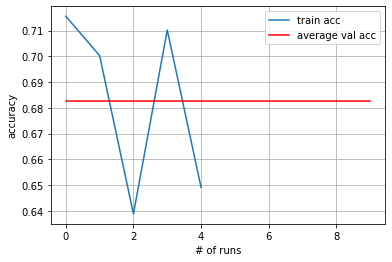

In [ ]:
plotting_train_acc_vs_average_train_acc(5,h_total_train_eight_hidden_with20,h_total_val_eight_hidden_with20)

# **With Eight hidden layer & 30 neouron**

In [ ]:
h_total_train_eight_hidden_with30=np.empty((0,10))
h_total_val_eight_hidden_with30=np.empty((0,10))
h_total_test_eight_hidden_with30=np.empty((0,10))
total_acc_eight_hidden_with30=[]

In [ ]:
h_total_train_eight_hidden_with30,h_total_val_eight_hidden_with30,h_total_test_eight_hidden_with30,total_acc_eight_hidden_with30=create_mlp_eight_hidden_get_total_acc(128,30,X_train_pca,y_train,X_val_pca,y_val,X_test_pca,y_test)

In [ ]:
h_total_train_eight_hidden_with30

array([[0.33791524, 0.53531885, 0.63688433, 0.68079418, 0.68881249,
        0.69759452, 0.71821308, 0.69988543, 0.71783125, 0.72661322],
       [0.30240551, 0.51813668, 0.6032837 , 0.65712106, 0.67621231,
        0.67850327, 0.69263077, 0.70561284, 0.72164947, 0.71515846],
       [0.37113401, 0.59564722, 0.60442919, 0.64681178, 0.66781217,
        0.67773962, 0.70141274, 0.7037037 , 0.71592212, 0.71935856],
       [0.3631157 , 0.55479193, 0.6548301 , 0.66857576, 0.68690342,
        0.69263077, 0.70484918, 0.71477664, 0.71363115, 0.71363115],
       [0.34364262, 0.57731956, 0.65215731, 0.67010307, 0.69492173,
        0.70408553, 0.70752198, 0.71363115, 0.72470409, 0.71363115]])

Max & Min & Avarrage Training accuracy Using** Batch size =128** and eight hidden layer and 30 neourons

In [ ]:
max_acc_train_8h30,min_acc_train_8h30,avg_acc_train_8h30=get_max_min_avg_acc(h_total_train_eight_hidden_with30)

In [ ]:
print(max(max_acc_train_8h30))
print(min(min_acc_train_8h30))
print(Average(avg_acc_train_8h30))

0.7266132235527039
0.3024055063724518
0.6416800355911255


Max & Min & Avarrage Testing accuracy Using** Batch size =128** and eight hidden layer and 30 neourons

In [ ]:
max_acc_test_8h30,min_acc_test_8h30,avg_acc_test_8h30=get_max_min_avg_acc(total_acc_eight_hidden_with30)
print(max_acc_test_8h30,min_acc_test_8h30,avg_acc_test_8h30)

0    0.757576
dtype: float64 0    0.695187
dtype: float64 0.7361853837966919


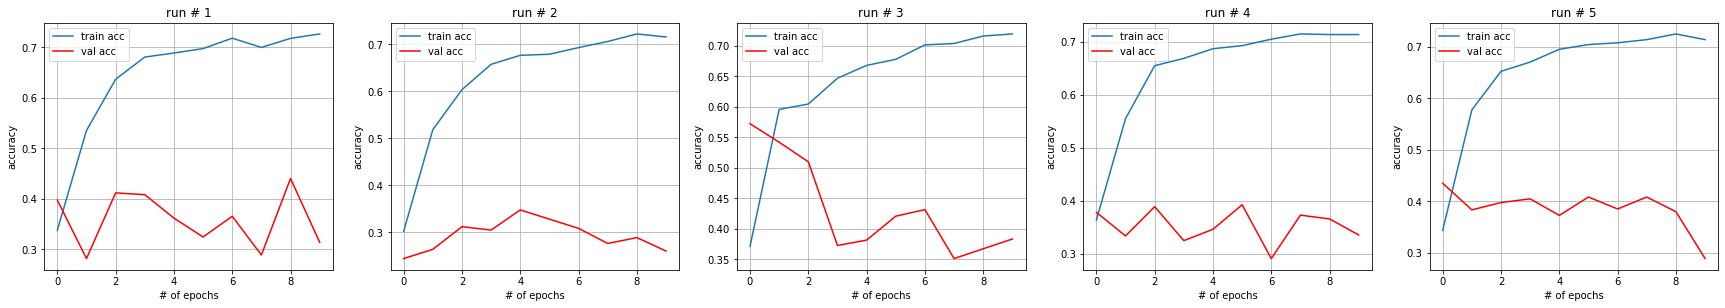

In [ ]:
plotting_five_runs(5,h_total_train_eight_hidden_with30,h_total_val_eight_hidden_with30)

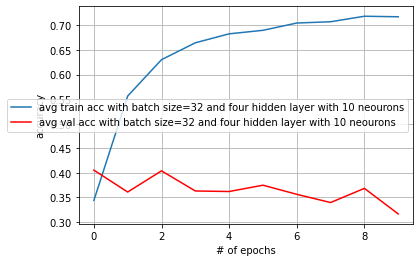

In [ ]:
h_avg_train=np.average(h_total_train_eight_hidden_with30,axis=0)
h_avg_val=np.average(h_total_val_eight_hidden_with30,axis=0)
plt.plot(h_avg_train)
plt.plot(h_avg_val, 'r')
plt.legend(['avg train acc with batch size=128 and four hidden layer with 10 neourons', 'avg val acc with batch size=32 and four hidden layer with 10 neourons'])
plt.xlabel("# of epochs")
plt.ylabel("accuracy")
plt.grid()

# **With Eight hidden layer & 40 neouron**

In [ ]:
h_total_train_eight_hidden_with40=np.empty((0,10))
h_total_val_eight_hidden_with40=np.empty((0,10))
h_total_test_eight_hidden_with40=np.empty((0,10))
total_acc_eight_hidden_with40=[]

In [ ]:
h_total_train_eight_hidden_with40,h_total_val_eight_hidden_with40,h_total_test_eight_hidden_with40,total_acc_eight_hidden_with40=create_mlp_eight_hidden_get_total_acc(128,40,X_train_pca,y_train,X_val_pca,y_val,X_test_pca,y_test)

Max & Min & Avarrage Training accuracy Using** Batch size =128** and eight hidden layer and 40 neourons

In [ ]:
max_acc_train_8h40,min_acc_train_8h40,avg_acc_train_8h40=get_max_min_avg_acc(h_total_train_eight_hidden_with40)

In [ ]:
print(max(max_acc_train_8h40))
print(min(min_acc_train_8h40))
print(Average(avg_acc_train_8h40))

0.7430316805839539
0.3577701449394226
0.6649408203363418


Max & Min & Avarrage Testing accuracy Using** Batch size =128** and eight hidden layer and 40 neourons

In [ ]:
max_acc_test_8h40,min_acc_test_8h40,avg_acc_test_8h40=get_max_min_avg_acc(total_acc_eight_hidden_with40)
print(max_acc_test_8h40,min_acc_test_8h40,avg_acc_test_8h40)

0    0.748663
dtype: float64 0    0.670232
dtype: float64 0.7204991221427918


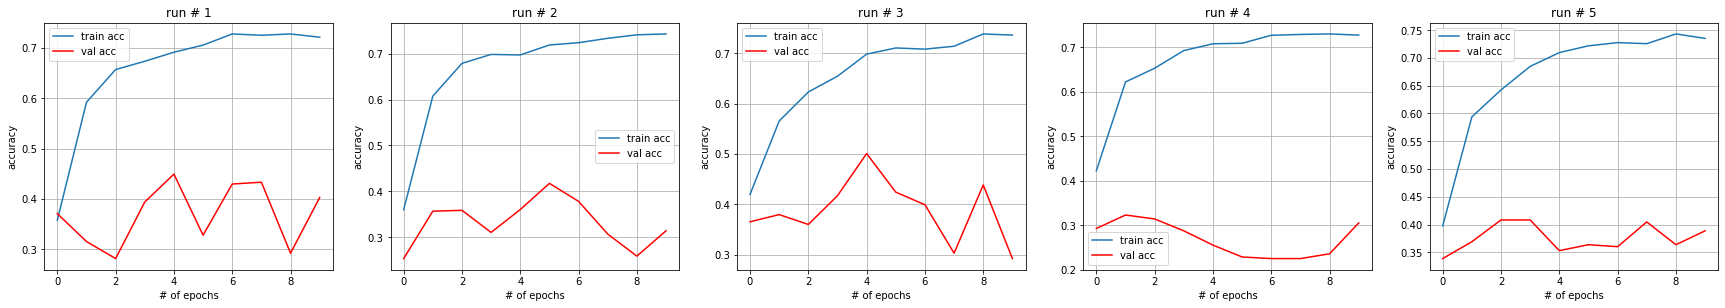

In [ ]:
plotting_five_runs(5,h_total_train_eight_hidden_with40,h_total_val_eight_hidden_with40)

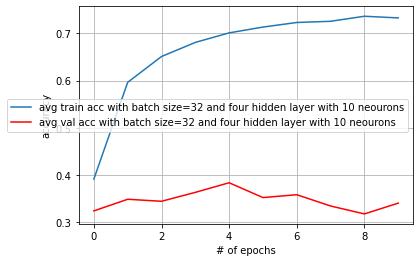

In [ ]:
h_avg_train=np.average(h_total_train_eight_hidden_with40,axis=0)
h_avg_val=np.average(h_total_val_eight_hidden_with40,axis=0)
plt.plot(h_avg_train)
plt.plot(h_avg_val, 'r')
plt.legend(['avg train acc with batch size=128 and four hidden layer with 10 neourons', 'avg val acc with batch size=32 and four hidden layer with 10 neourons'])
plt.xlabel("# of epochs")
plt.ylabel("accuracy")
plt.grid()

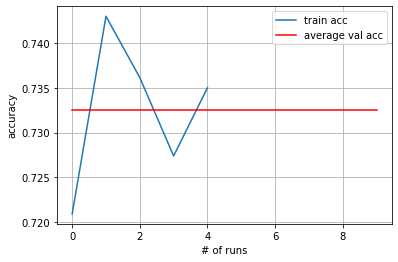

In [ ]:
plotting_train_acc_vs_average_train_acc(5,h_total_train_eight_hidden_with40,h_total_val_eight_hidden_with40)

## **(3.3)**

# **Firstly With four hidden layer & 40 neouron and  batch size = 128 with Optimezer=AdamW and learning rate =0.1**

In [ ]:
h_total_train_adamW_Lr1=np.empty((0,10))
h_total_val_adamW_Lr1=np.empty((0,10))
h_total_test_adamW_Lr1=np.empty((0,10))
total_acc_adamW_Lr1=[]

In [ ]:
def create_mlp_with_optimzer_get_total_acc(optimizer,X_train_pca,y_train,X_val_pca,y_val,X_test_pca,y_test):
  #add another hidden layer to test the performance
  h_total_train=np.empty((0,10))
  h_total_val=np.empty((0,10))
  h_total_test=np.empty((0,10))
  total_acc=[]
  number_of_runs=5
  for i in range(number_of_runs):
    
    mlp=keras.models.Sequential()
    mlp.add(keras.layers.Dense(40, activation='relu', ))
    mlp.add(keras.layers.Dense(40, activation='relu', ))
    mlp.add(keras.layers.Dense(40, activation='relu', ))
    mlp.add(keras.layers.Dense(40, activation='relu', ))
  
    mlp.add(keras.layers.Dense(6, activation='softmax', ))
    

    optimizer = tfa.optimizers.AdamW(learning_rate=0.001, weight_decay=0.001)
    mlp.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    h = mlp.fit(X_train_pca,y_train,validation_data =(X_val_pca, y_val), epochs=10,verbose=0,batch_size=128)
    h_total_train=np.append(h_total_train,np.array([h.history['accuracy']]),axis=0)
    h_total_val=np.append(h_total_val,np.array([h.history['val_accuracy']]),axis=0)

    total_acc.append(mlp.evaluate(X_test_pca,y_test, verbose=0)[1])
  return h_total_train,h_total_val,h_total_test,total_acc

In [ ]:
optimizer = tfa.optimizers.AdamW(learning_rate=0.1, weight_decay=0.1)
h_total_train_adamW_Lr1,h_total_val_adamW_Lr1,h_total_test_adamW_Lr1,total_acc_adamW_Lr1=create_mlp_with_optimzer_get_total_acc(optimizer,X_train_pca,y_train,X_val_pca,y_val,X_test_pca,y_test)

Max & Min & Avarrage Training accuracy Using** Batch size =128** and eight hidden layer and 20 neourons and** adamW optimzer and learning rate=0.1**

In [ ]:
max_acc_train_adamW_Lr1,min_acc_train_adamW_Lr1,avg_acc_train_adamW_Lr1=get_max_min_avg_acc(h_total_train_adamW_Lr1)

In [ ]:
print(max(max_acc_train_adamW_Lr1))
print(min(min_acc_train_adamW_Lr1))
print(Average(avg_acc_train_adamW_Lr1))

0.7495227456092834
0.442917138338089
0.690614736676216


Max & Min & Avarrage Testing accuracy Using** Batch size =128** and eight hidden layer and 20 neourons and **adamw optimzer and learning rate=0.1**

In [ ]:
max_acc_test_adamW_Lr1,min_acc_test_adamW_Lr1,avg_acc_test_adamW_Lr1=get_max_min_avg_acc(total_acc_adamW_Lr1)
print(max_acc_test_adamW_Lr1,min_acc_test_adamW_Lr1,avg_acc_test_adamW_Lr1)

0    0.757576
dtype: float64 0    0.714795
dtype: float64 0.744385015964508


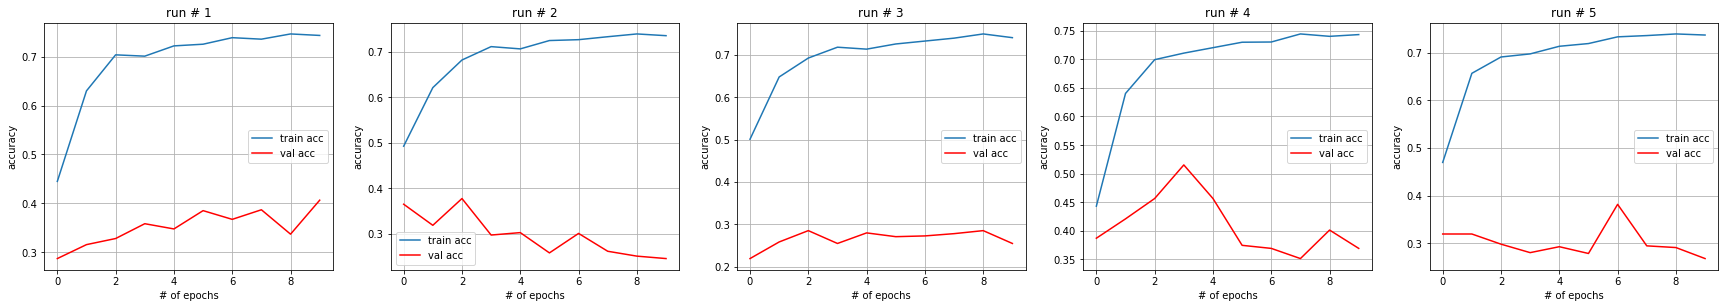

In [ ]:
plotting_five_runs(5,h_total_train_adamW_Lr1,h_total_val_adamW_Lr1)

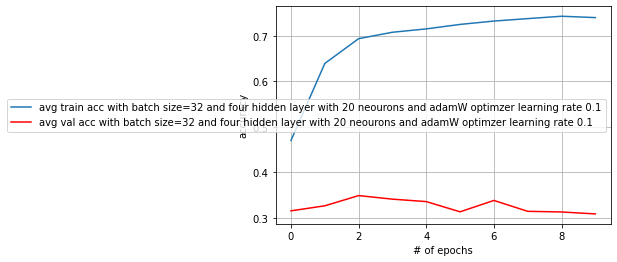

In [ ]:
h_avg_train=np.average(h_total_train_adamW_Lr1,axis=0)
h_avg_val=np.average(h_total_val_adamW_Lr1,axis=0)
plt.plot(h_avg_train)
plt.plot(h_avg_val, 'r')
plt.legend(['avg train acc with batch size=128 and four hidden layer with 20 neourons and adamW optimzer learning rate 0.1', 'avg val acc with batch size=32 and four hidden layer with 20 neourons and adamW optimzer learning rate 0.1'])
plt.xlabel("# of epochs")
plt.ylabel("accuracy")
plt.grid()

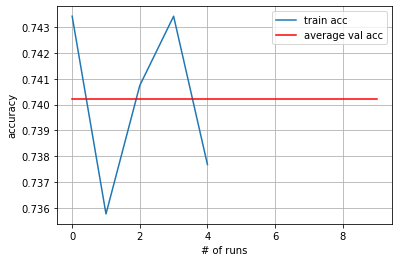

In [ ]:
plotting_train_acc_vs_average_train_acc(5,h_total_train_adamW_Lr1,h_total_val_adamW_Lr1)

# **With four hidden layer & 40 neouron and batch size = 128 with Optimezer=AdamW and learning rate =0.01**

In [ ]:
h_total_train_adamW_Lr2=np.empty((0,10))
h_total_val_adamW_Lr2=np.empty((0,10))
h_total_test_adamW_Lr2=np.empty((0,10))
total_acc_adamW_Lr2=[]

In [ ]:
optimizer = tfa.optimizers.AdamW(learning_rate=0.01, weight_decay=0.1)
h_total_train_adamW_Lr2,h_total_val_adamW_Lr2,h_total_test_adamW_Lr2,total_acc_adamW_Lr2=create_mlp_with_optimzer_get_total_acc(optimizer,X_train_pca,y_train,X_val_pca,y_val,X_test_pca,y_test)

Max & Min & Avarrage Training accuracy Using** Batch size =128** and eight hidden layer and 20 neourons and** adamW optimzer and learning rate=0.01**

In [ ]:
max_acc_train_adamW_Lr2,min_acc_train_adamW_Lr2,avg_acc_train_adamW_Lr2=get_max_min_avg_acc(h_total_train_adamW_Lr2)

Max & Min & Avarrage Testing accuracy Using** Batch size =128** and eight hidden layer and 20 neourons and** adamW optimzer and learning rate=0.01**

In [ ]:
max_acc_test_adamW_Lr2,min_acc_test_adamW_Lr2,avg_acc_test_adamW_Lr2=get_max_min_avg_acc(total_acc_adamW_Lr2)
print(max_acc_test_adamW_Lr2,min_acc_test_adamW_Lr2,avg_acc_test_adamW_Lr2)

In [ ]:
plotting_five_runs(5,h_total_train_adamW_Lr2,h_total_val_adamW_Lr2)

In [ ]:
h_avg_train=np.average(h_total_train_adamW_Lr2,axis=0)
h_avg_val=np.average(h_total_val_adamW_Lr2,axis=0)
plt.plot(h_avg_train)
plt.plot(h_avg_val, 'r')
plt.legend(['avg train acc with batch size=32 and four hidden layer with 20 neourons and adamW optimzer learning rate 0.01', 'avg val acc with batch size=32 and four hidden layer with 20 neourons and adamW optimzer learning rate 0.1'])
plt.xlabel("# of epochs")
plt.ylabel("accuracy")
plt.grid()

In [ ]:
plotting_train_acc_vs_average_train_acc(5,h_total_train_adamW_Lr2,h_total_val_adamW_Lr2)

# **With four hidden layer & 40 neouron and batch size = 128 with Optimezer=SGD (momentum =0.1) and learning rate =0.1**

In [ ]:
h_total_train_SGD1=np.empty((0,10))
h_total_val_SGD1=np.empty((0,10))
h_total_test_SGD1=np.empty((0,10))
total_acc_SGD1=[]

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.1)
h_total_train_SGD1,h_total_val_SGD1,h_total_test_SGD1,total_acc_SGD1=create_mlp_with_optimzer_get_total_acc(optimizer,X_train_pca,y_train,X_val_pca,y_val,X_test_pca,y_test)

Max & Min & Avarrage Training accuracy Using** Batch size =128** and eight hidden layer and 20 neourons and** SGD (momentum =0.1) optimzer and learning rate=0.1**

In [ ]:
max_acc_train_SGD1,min_acc_train_SGD1,avg_acc_train_SGD1=get_max_min_avg_acc(h_total_train_SGD1)

In [ ]:
print(max(max_acc_train_SGD1))
print(min(min_acc_train_SGD1))
print(Average(avg_acc_train_SGD1))

0.7487590909004211
0.4158075749874115
0.6828942370414735


Max & Min & Avarrage Testing accuracy Using** Batch size =128** and eight hidden layer and 20 neourons and** SGD (momentum =0.1) optimzer and learning rate=0.1**

In [ ]:
max_acc_test_SGD1,min_acc_test_SGD1,avg_acc_test_SGD1=get_max_min_avg_acc(total_acc_SGD1)
print(max_acc_test_SGD1,min_acc_test_SGD1,avg_acc_test_SGD1)

0    0.757576
dtype: float64 0    0.743316
dtype: float64 0.749376118183136


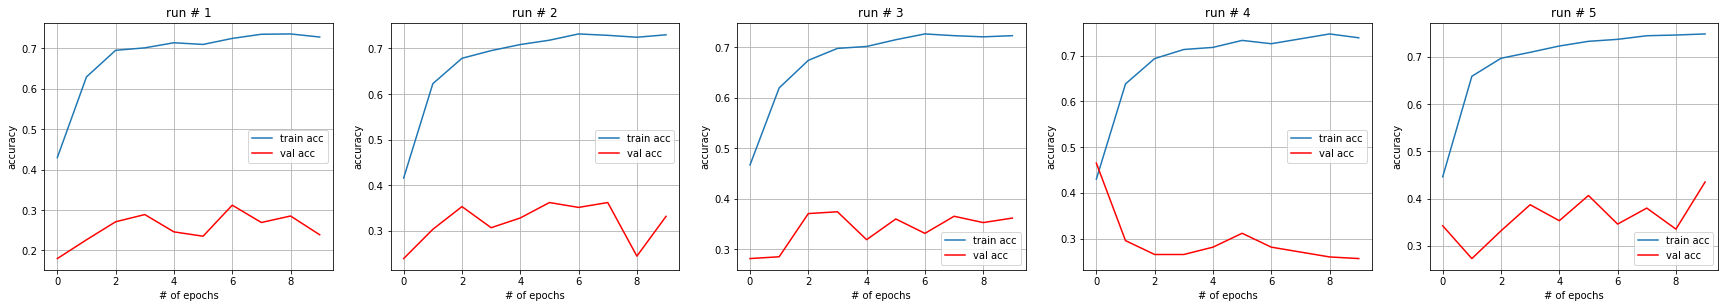

In [ ]:
plotting_five_runs(5,h_total_train_SGD1,h_total_val_SGD1)

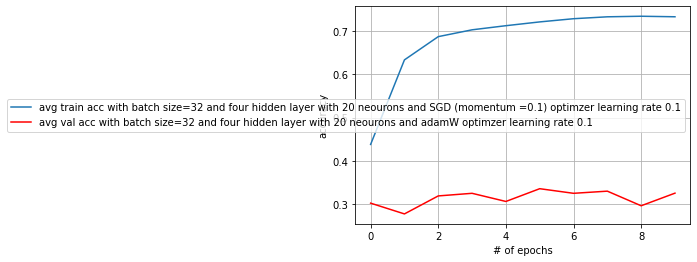

In [ ]:
h_avg_train=np.average(h_total_train_SGD1,axis=0)
h_avg_val=np.average(h_total_val_SGD1,axis=0)
plt.plot(h_avg_train)
plt.plot(h_avg_val, 'r')
plt.legend(['avg train acc with batch size=128 and four hidden layer with 20 neourons and SGD (momentum =0.1) optimzer learning rate 0.1', 'avg val acc with batch size=32 and four hidden layer with 20 neourons and adamW optimzer learning rate 0.1'])
plt.xlabel("# of epochs")
plt.ylabel("accuracy")
plt.grid()

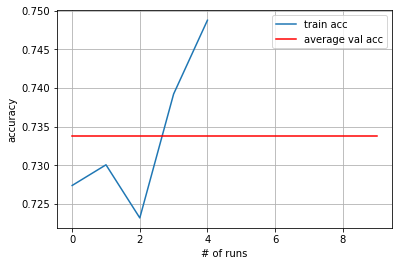

In [ ]:
plotting_train_acc_vs_average_train_acc(5,h_total_train_SGD1,h_total_val_SGD1)

# **With four hidden layer & 20 neouron and batch size = 128 with Optimezer=SGD (momentum =0.1) and learning rate =0.01**

In [ ]:
h_total_train_SGD1_Lr2=np.empty((0,10))
h_total_val_SGD1_Lr2=np.empty((0,10))
h_total_test_SGD1_Lr2=np.empty((0,10))
total_acc_SGD1_Lr2=[]

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.1)
h_total_train_SGD1_Lr2,h_total_val_SGD1_Lr2,h_total_test_SGD1_Lr2,total_acc_SGD1_Lr2=create_mlp_with_optimzer_get_total_acc(optimizer,X_train_pca,y_train,X_val_pca,y_val,X_test_pca,y_test)

Max & Min & Avarrage Training accuracy Using** Batch size =128** and eight hidden layer and 20 neourons and** SGD (momentum =0.1) optimzer and learning rate=0.01**

In [ ]:
max_acc_train_SGD1_Lr2,min_acc_train_SGD1_Lr2,avg_acc_train_SGD1_Lr2=get_max_min_avg_acc(h_total_train_SGD1_Lr2)

In [ ]:
print(max(max_acc_train_SGD1_Lr2))
print(min(min_acc_train_SGD1_Lr2))
print(Average(avg_acc_train_SGD1_Lr2))

0.743413507938385
0.45208093523979187
0.6899198108911515


Max & Min & Avarrage Testing accuracy Using** Batch size =128** and eight hidden layer and 20 neourons and** SGD (momentum =0.1) optimzer and learning rate=0.01**

In [ ]:
max_acc_test_SGD1_Lr2,min_acc_test_SGD1_Lr2,avg_acc_test_SGD1_Lr2=get_max_min_avg_acc(total_acc_SGD1_Lr2)
print(max_acc_test_SGD1_Lr2,min_acc_test_SGD1_Lr2,avg_acc_test_SGD1_Lr2)

0    0.764706
dtype: float64 0    0.709447
dtype: float64 0.736898398399353


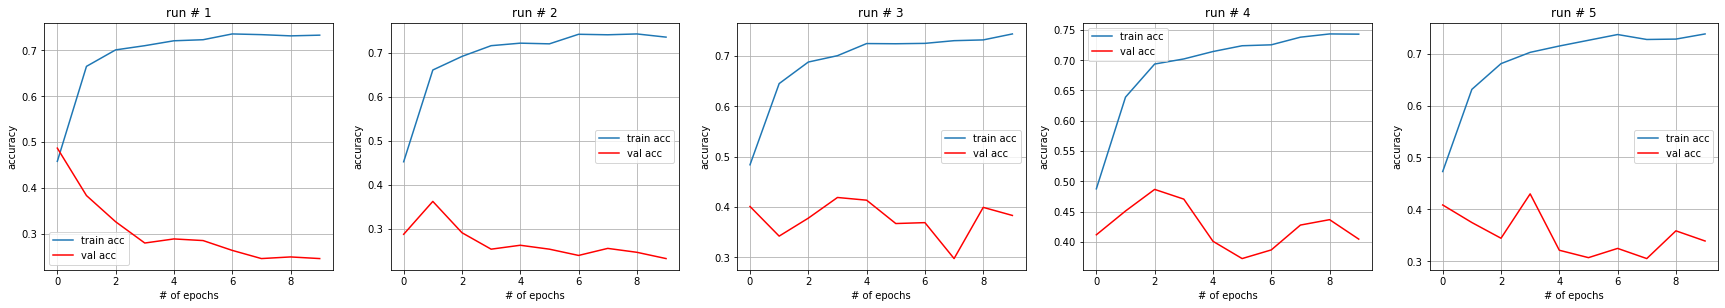

In [ ]:
plotting_five_runs(5,h_total_train_SGD1_Lr2,h_total_val_SGD1_Lr2)

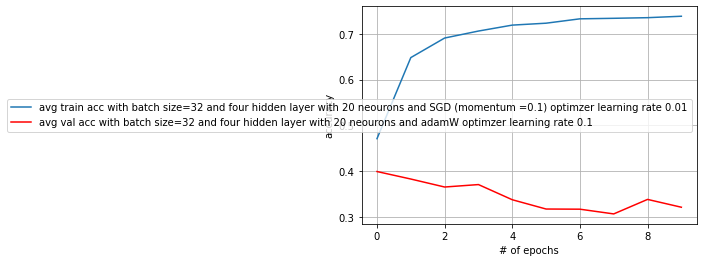

In [ ]:
h_avg_train=np.average(h_total_train_SGD1_Lr2,axis=0)
h_avg_val=np.average(h_total_val_SGD1_Lr2,axis=0)
plt.plot(h_avg_train)
plt.plot(h_avg_val, 'r')
plt.legend(['avg train acc with batch size=128 and four hidden layer with 20 neourons and SGD (momentum =0.1) optimzer learning rate 0.01', 'avg val acc with batch size=32 and four hidden layer with 20 neourons and adamW optimzer learning rate 0.1'])
plt.xlabel("# of epochs")
plt.ylabel("accuracy")
plt.grid()

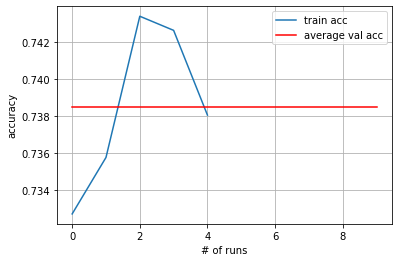

In [ ]:
plotting_train_acc_vs_average_train_acc(5,h_total_train_SGD1_Lr2,h_total_val_SGD1_Lr2)

# **With four hidden layer & 20 neouron and batch size = 128 with Optimezer=SGD (momentum =0.1) and learning rate =0.001** The highest valdiation accuracy 

In [ ]:
h_total_train_SGD1_Lr3=np.empty((0,10))
h_total_val_SGD1_Lr3=np.empty((0,10))
h_total_test_SGD1_Lr3=np.empty((0,10))
total_acc_SGD1_Lr3=[]

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.1)
h_total_train_SGD1_Lr3,h_total_val_SGD1_Lr3,h_total_test_SGD1_Lr3,total_acc_SGD1_Lr3=create_mlp_with_optimzer_get_total_acc(optimizer,X_train_pca,y_train,X_val_pca,y_val,X_test_pca,y_test)

Max & Min & Avarrage Training accuracy Using** Batch size =128** and eight hidden layer and 20 neourons and** SGD (momentum =0.1) optimzer and learning rate=0.001**

In [ ]:
max_acc_train_SGD1_Lr3,min_acc_train_SGD1_Lr3,avg_acc_train_SGD1_Lr3=get_max_min_avg_acc(h_total_train_SGD1_Lr3)

Max & Min & Avarrage Testing accuracy Using** Batch size =128** and eight hidden layer and 20 neourons and** SGD (momentum =0.1) optimzer and learning rate=0.001**

In [ ]:
print(max(max_acc_train_SGD1_Lr3))
print(min(min_acc_train_SGD1_Lr3))
print(Average(avg_acc_train_SGD1_Lr3))

0.757922887802124
0.4093165397644043
0.6868499422073364


In [ ]:
max_acc_test_SGD1_Lr3,min_acc_test_SGD1_Lr3,avg_acc_test_SGD1_Lr3=get_max_min_avg_acc(total_acc_SGD1_Lr3)
print(max_acc_test_SGD1_Lr3,min_acc_test_SGD1_Lr3,avg_acc_test_SGD1_Lr3)

0    0.771836
dtype: float64 0    0.730838
dtype: float64 0.7468805551528931


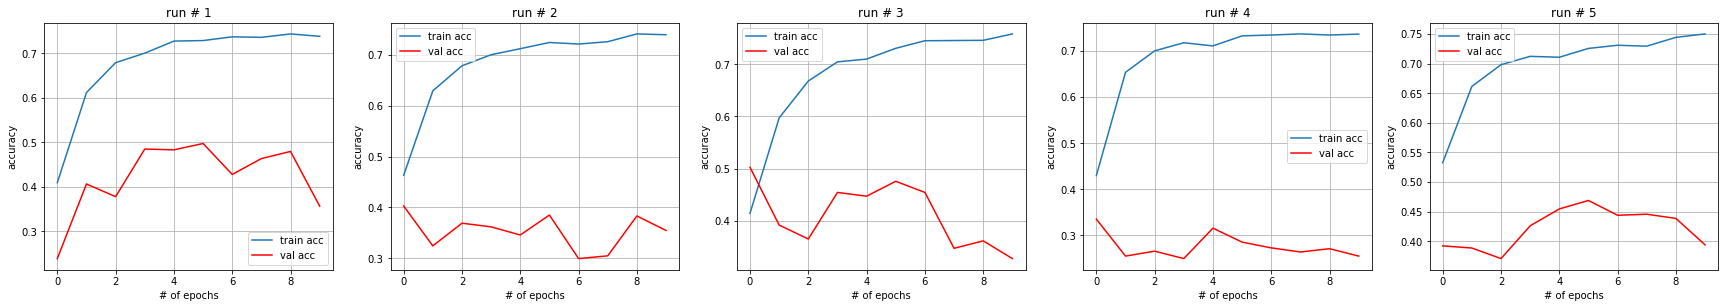

In [ ]:
plotting_five_runs(5,h_total_train_SGD1_Lr3,h_total_val_SGD1_Lr3)

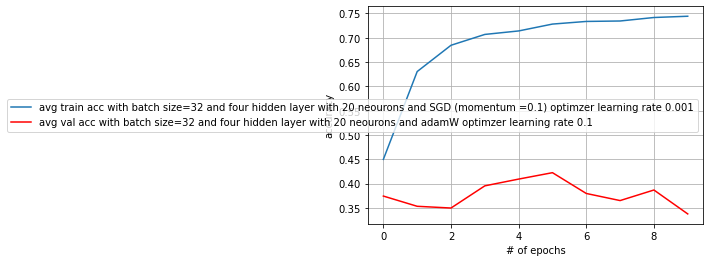

In [ ]:
h_avg_train=np.average(h_total_train_SGD1_Lr3,axis=0)
h_avg_val=np.average(h_total_val_SGD1_Lr3,axis=0)
plt.plot(h_avg_train)
plt.plot(h_avg_val, 'r')
plt.legend(['avg train acc with batch size=128 and four hidden layer with 20 neourons and SGD (momentum =0.1) optimzer learning rate 0.001', 'avg val acc with batch size=32 and four hidden layer with 20 neourons and adamW optimzer learning rate 0.1'])
plt.xlabel("# of epochs")
plt.ylabel("accuracy")
plt.grid()

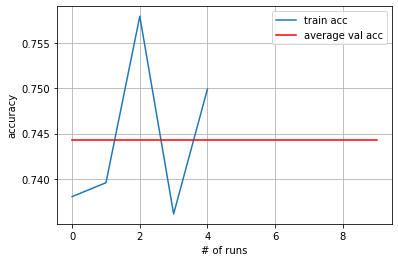

In [ ]:
plotting_train_acc_vs_average_train_acc(5,h_total_train_SGD1_Lr3,h_total_val_SGD1_Lr3)

# **With four hidden layer & 20 neouron and batch size = 128 with Optimezer=SGD (momentum =0.5) and learning rate =0.1**

In [ ]:
h_total_train_SGD2_Lr1=np.empty((0,10))
h_total_val_SGD2_Lr1=np.empty((0,10))
h_total_test_SGD2_Lr1=np.empty((0,10))
total_acc_SGD2_Lr1=[]

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.5)
h_total_train_SGD2_Lr1,h_total_val_SGD2_Lr1,h_total_test_SGD2_Lr1,total_acc_SGD2_Lr1=create_mlp_with_optimzer_get_total_acc(optimizer,X_train_pca,y_train,X_val_pca,y_val,X_test_pca,y_test)

Max & Min & Avarrage Training accuracy Using** Batch size =128** and eight hidden layer and 20 neourons and** SGD (momentum =0.5) optimzer and learning rate=0.1

In [ ]:
max_acc_train_SGD2_Lr1,min_acc_train_SGD2_Lr1,avg_acc_train_SGD2_Lr1=get_max_min_avg_acc(h_total_train_SGD2_Lr1)

In [ ]:
print(max(max_acc_train_SGD2_Lr1))
print(min(min_acc_train_SGD2_Lr1))
print(Average(avg_acc_train_SGD2_Lr1))

0.7464681267738342
0.4142802655696869
0.6869874006509782


Max & Min & Avarrage Testing accuracy Using** Batch size =128** and eight hidden layer and 20 neourons and** SGD (momentum =0.5) optimzer and learning rate=0.1*

In [ ]:
max_acc_test_SGD2_Lr1,min_acc_test_SGD2_Lr1,avg_acc_test_SGD2_Lr1=get_max_min_avg_acc(total_acc_SGD2_Lr1)
print(max_acc_test_SGD2_Lr1,min_acc_test_SGD2_Lr1,avg_acc_test_SGD2_Lr1)

0    0.757576
dtype: float64 0    0.723708
dtype: float64 0.7411764740943909


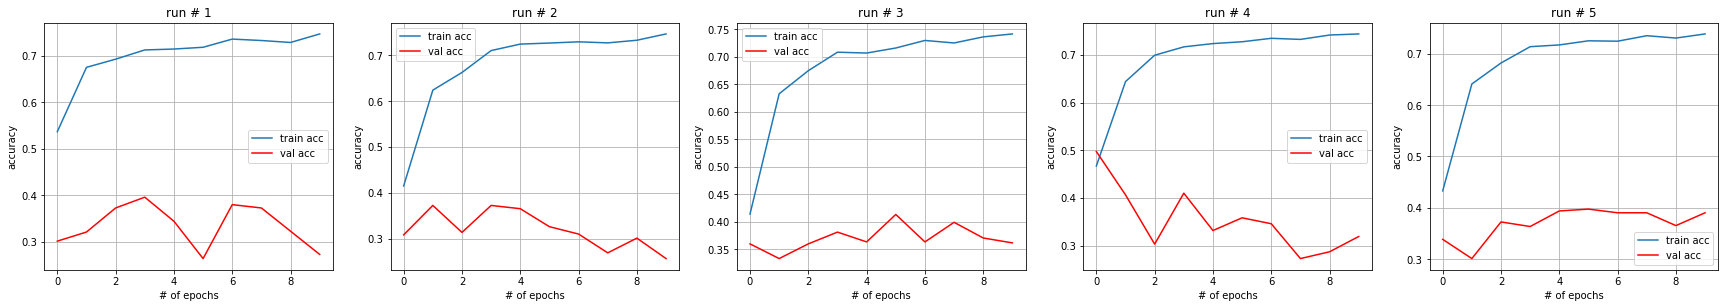

In [ ]:
plotting_five_runs(5,h_total_train_SGD2_Lr1,h_total_val_SGD2_Lr1)

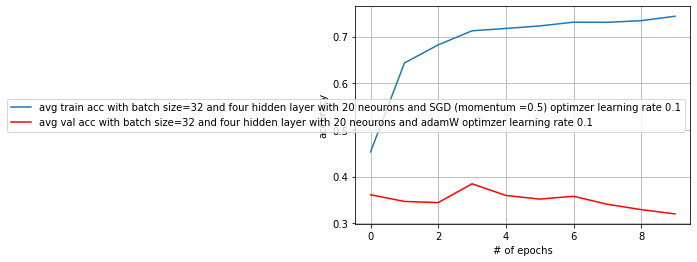

In [ ]:
h_avg_train=np.average(h_total_train_SGD2_Lr1,axis=0)
h_avg_val=np.average(h_total_val_SGD2_Lr1,axis=0)
plt.plot(h_avg_train)
plt.plot(h_avg_val, 'r')
plt.legend(['avg train acc with batch size=128 and four hidden layer with 20 neourons and SGD (momentum =0.5) optimzer learning rate 0.1', 'avg val acc with batch size=32 and four hidden layer with 20 neourons and adamW optimzer learning rate 0.1'])
plt.xlabel("# of epochs")
plt.ylabel("accuracy")
plt.grid()

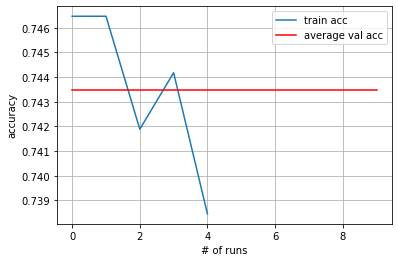

In [ ]:
plotting_train_acc_vs_average_train_acc(5,h_total_train_SGD2_Lr1,h_total_val_SGD2_Lr1)

# **With four hidden layer & 20 neouron and batch size = 128 with Optimezer=SGD (momentum =0.5) and learning rate =0.01**

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.5)

In [ ]:
h_total_train_SGD2_Lr2=np.empty((0,10))
h_total_val_SGD2_Lr2=np.empty((0,10))
h_total_test_SGD2_Lr2=np.empty((0,10))
total_acc_SGD2_Lr2=[]

In [ ]:
h_total_train_SGD2_Lr2,h_total_val_SGD2_Lr2,h_total_test_SGD2_Lr2,total_acc_SGD2_Lr2=create_mlp_with_optimzer_get_total_acc(optimizer,X_train_pca,y_train,X_val_pca,y_val,X_test_pca,y_test)

Max & Min & Avarrage Training accuracy Using** Batch size =128** and eight hidden layer and 20 neourons and** SGD (momentum =0.5) optimzer and learning rate=0.01

In [ ]:
max_acc_train_SGD2_Lr2,min_acc_train_SGD2_Lr2,avg_acc_train_SGD2_Lr2=get_max_min_avg_acc(h_total_train_SGD2_Lr2)

In [ ]:
print(max(max_acc_train_SGD2_Lr2))
print(min(min_acc_train_SGD2_Lr2))
print(Average(avg_acc_train_SGD2_Lr2))

0.7437953352928162
0.436044305562973
0.6884536051750183


Max & Min & Avarrage Testing accuracy Using** Batch size =128** and eight hidden layer and 20 neourons and** SGD (momentum =0.5) optimzer and learning rate=0.01*

In [ ]:
max_acc_test_SGD2_Lr2,min_acc_test_SGD2_Lr2,avg_acc_test_SGD2_Lr2=get_max_min_avg_acc(total_acc_SGD2_Lr2)
print(max_acc_test_SGD2_Lr2,min_acc_test_SGD2_Lr2,avg_acc_test_SGD2_Lr2)

0    0.754011
dtype: float64 0    0.72549
dtype: float64 0.7397504568099975


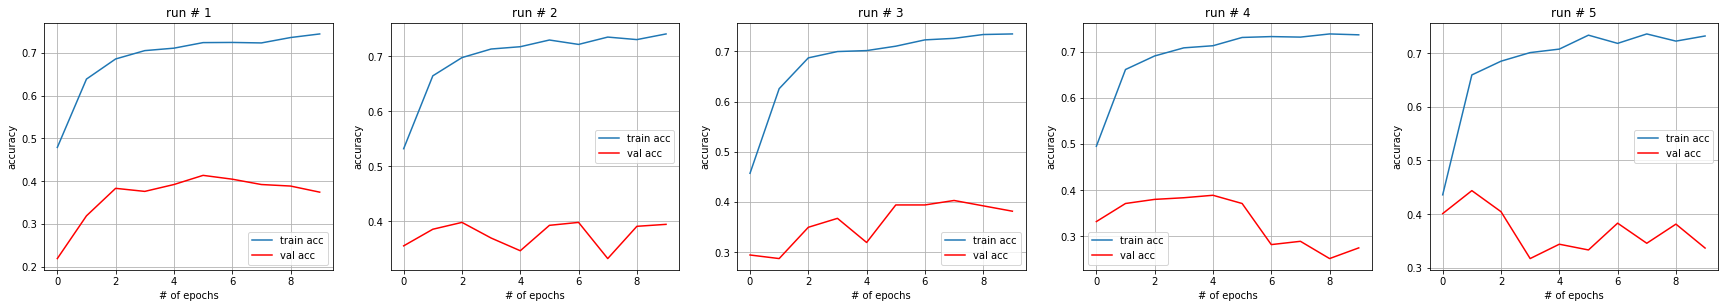

In [ ]:
plotting_five_runs(5,h_total_train_SGD2_Lr2,h_total_val_SGD2_Lr2)

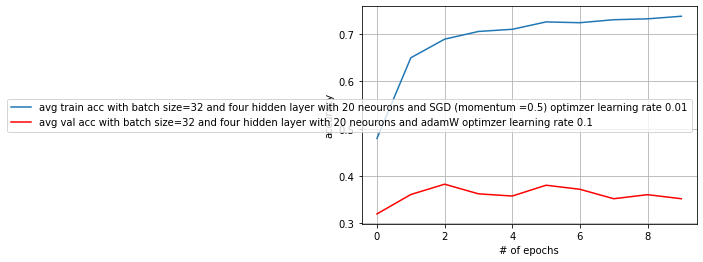

In [ ]:
h_avg_train=np.average(h_total_train_SGD2_Lr2,axis=0)
h_avg_val=np.average(h_total_val_SGD2_Lr2,axis=0)
plt.plot(h_avg_train)
plt.plot(h_avg_val, 'r')
plt.legend(['avg train acc with batch size=128 and four hidden layer with 20 neourons and SGD (momentum =0.5) optimzer learning rate 0.01', 'avg val acc with batch size=32 and four hidden layer with 20 neourons and adamW optimzer learning rate 0.1'])
plt.xlabel("# of epochs")
plt.ylabel("accuracy")
plt.grid()

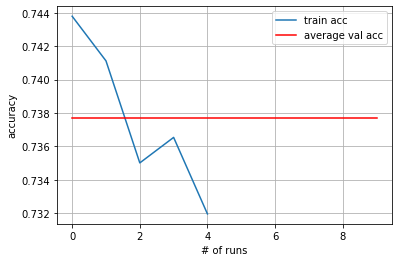

In [ ]:
plotting_train_acc_vs_average_train_acc(5,h_total_train_SGD2_Lr2,h_total_val_SGD2_Lr2)

# **With four hidden layer & 20 neouron and batch size = 128 with Optimezer=SGD (momentum =0.5) and learning rate =0.001**

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.5)

In [ ]:
h_total_train_SGD2_Lr3=np.empty((0,10))
h_total_val_SGD2_Lr3=np.empty((0,10))
h_total_test_SGD2_Lr3=np.empty((0,10))
total_acc_SGD2_Lr3=[]

In [ ]:
h_total_train_SGD2_Lr3,h_total_val_SGD2_Lr3,h_total_test_SGD2_Lr3,total_acc_SGD2_Lr3=create_mlp_with_optimzer_get_total_acc(optimizer,X_train_pca,y_train,X_val_pca,y_val,X_test_pca,y_test)

Max & Min & Avarrage Training accuracy Using** Batch size =128** and eight hidden layer and 20 neourons and** SGD (momentum =0.5) optimzer and learning rate=0.001

In [ ]:
max_acc_train_SGD2_Lr3,min_acc_train_SGD2_Lr3,avg_acc_train_SGD2_Lr3=get_max_min_avg_acc(h_total_train_SGD2_Lr3)

In [ ]:
print(max(max_acc_train_SGD2_Lr3))
print(min(min_acc_train_SGD2_Lr3))
print(Average(avg_acc_train_SGD2_Lr3))

0.7457044720649719
0.44979000091552734
0.6874990469217301


Max & Min & Avarrage Testing accuracy Using** Batch size =128** and eight hidden layer and 20 neourons and** SGD (momentum =0.5) optimzer and learning rate=0.001*

In [ ]:
max_acc_test_SGD2_Lr3,min_acc_test_SGD2_Lr3,avg_acc_test_SGD2_Lr3=get_max_min_avg_acc(total_acc_SGD2_Lr3)
print(max_acc_test_SGD2_Lr3,min_acc_test_SGD2_Lr3,avg_acc_test_SGD2_Lr3)

0    0.743316
dtype: float64 0    0.680927
dtype: float64 0.7229946494102478


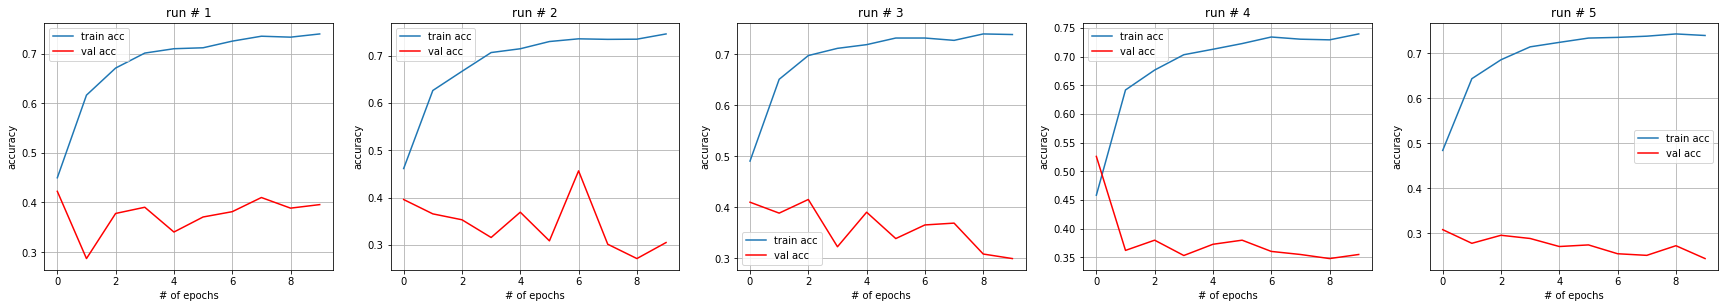

In [ ]:
plotting_five_runs(5,h_total_train_SGD2_Lr3,h_total_val_SGD2_Lr3)

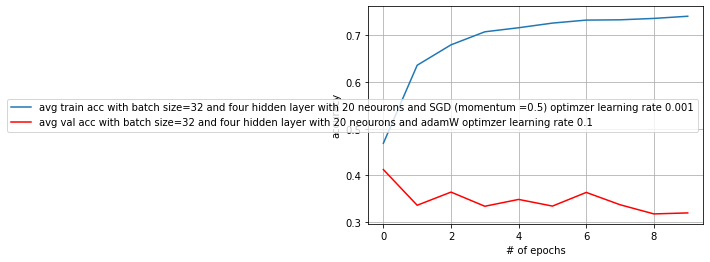

In [ ]:
h_avg_train=np.average(h_total_train_SGD2_Lr3,axis=0)
h_avg_val=np.average(h_total_val_SGD2_Lr3,axis=0)
plt.plot(h_avg_train)
plt.plot(h_avg_val, 'r')
plt.legend(['avg train acc with batch size=128 and four hidden layer with 20 neourons and SGD (momentum =0.5) optimzer learning rate 0.001', 'avg val acc with batch size=32 and four hidden layer with 20 neourons and adamW optimzer learning rate 0.1'])
plt.xlabel("# of epochs")
plt.ylabel("accuracy")
plt.grid()

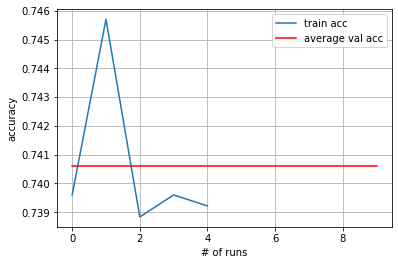

In [ ]:
plotting_train_acc_vs_average_train_acc(5,h_total_train_SGD2_Lr3,h_total_val_SGD2_Lr3)

# **With four hidden layer & 20 neouron and batch size = 128 with Optimezer=SGD (momentum =0.9) and learning rate =0.1**

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9)

In [ ]:
h_total_train_SGD3_Lr1=np.empty((0,10))
h_total_val_SGD3_Lr1=np.empty((0,10))
h_total_test_SGD3_Lr1=np.empty((0,10))
total_acc_SGD3_Lr1=[]

In [ ]:
h_total_train_SGD3_Lr1,h_total_val_SGD3_Lr1,h_total_test_SGD3_Lr1,total_acc_SGD3_Lr1=create_mlp_with_optimzer_get_total_acc(optimizer,X_train_pca,y_train,X_val_pca,y_val,X_test_pca,y_test)

Max & Min & Avarrage Training accuracy Using** Batch size =128** and eight hidden layer and 20 neourons and** SGD (momentum =0.9) optimzer and learning rate=0.1

In [ ]:
max_acc_train_SGD3_Lr1,min_acc_train_SGD3_Lr1,avg_acc_train_SGD3_Lr1=get_max_min_avg_acc(h_total_train_SGD3_Lr1)

In [ ]:
print(max(max_acc_train_SGD3_Lr1))
print(min(min_acc_train_SGD3_Lr1))
print(Average(avg_acc_train_SGD3_Lr1))

0.7479954361915588
0.3951890170574188
0.6884154236316681


Max & Min & Avarrage Testing accuracy Using** Batch size =128** and eight hidden layer and 20 neourons and** SGD (momentum =0.9) optimzer and learning rate=0.1*

In [ ]:
max_acc_test_SGD3_Lr1,min_acc_test_SGD3_Lr1,avg_acc_test_SGD3_Lr1=get_max_min_avg_acc(total_acc_SGD3_Lr1)
print(max_acc_test_SGD3_Lr1,min_acc_test_SGD3_Lr1,avg_acc_test_SGD3_Lr1)

0    0.766488
dtype: float64 0    0.700535
dtype: float64 0.7301247715950012


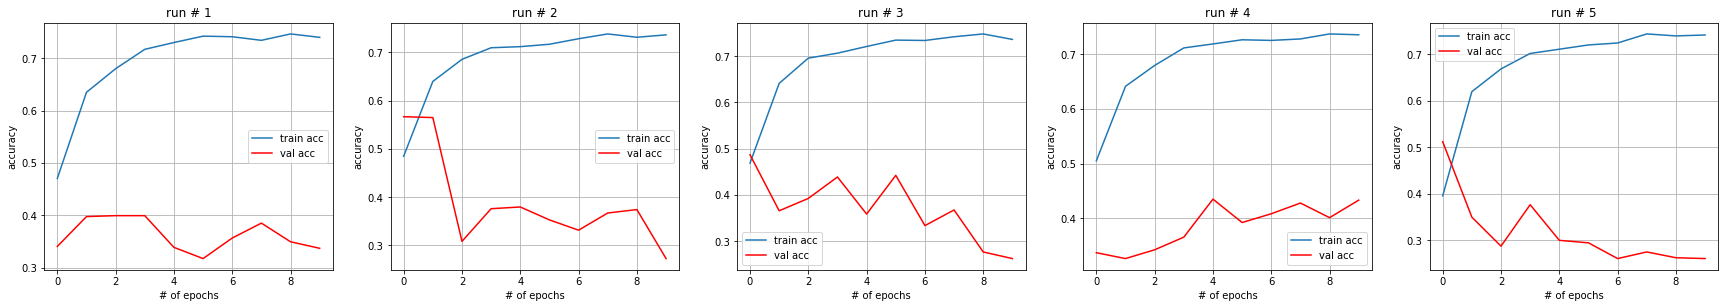

In [ ]:
plotting_five_runs(5,h_total_train_SGD3_Lr1,h_total_val_SGD3_Lr1)

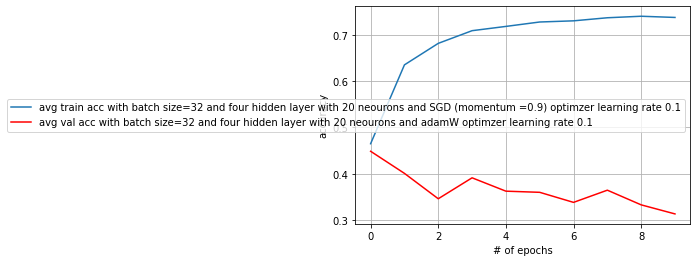

In [ ]:
h_avg_train=np.average(h_total_train_SGD3_Lr1,axis=0)
h_avg_val=np.average(h_total_val_SGD3_Lr1,axis=0)
plt.plot(h_avg_train)
plt.plot(h_avg_val, 'r')
plt.legend(['avg train acc with batch size=128 and four hidden layer with 20 neourons and SGD (momentum =0.9) optimzer learning rate 0.1', 'avg val acc with batch size=32 and four hidden layer with 20 neourons and adamW optimzer learning rate 0.1'])
plt.xlabel("# of epochs")
plt.ylabel("accuracy")
plt.grid()

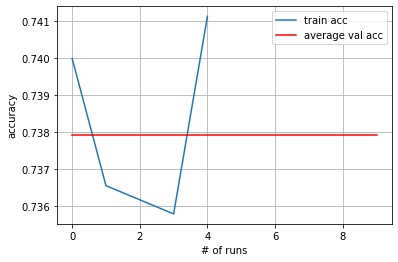

In [ ]:
plotting_train_acc_vs_average_train_acc(5,h_total_train_SGD3_Lr1,h_total_val_SGD3_Lr1)

# **With four hidden layer & 20 neouron and batch size = 128 with Optimezer=SGD (momentum =0.9) and learning rate =0.01**

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)

In [ ]:
h_total_train_SGD3_Lr2=np.empty((0,10))
h_total_val_SGD3_Lr2=np.empty((0,10))
h_total_test_SGD3_Lr2=np.empty((0,10))
total_acc_SGD3_Lr2=[]

In [ ]:
h_total_train_SGD3_Lr2,h_total_val_SGD3_Lr2,h_total_test_SGD3_Lr2,total_acc_SGD3_Lr2=create_mlp_with_optimzer_get_total_acc(optimizer,X_train_pca,y_train,X_val_pca,y_val,X_test_pca,y_test)

Max & Min & Avarrage Training accuracy Using** Batch size =128** and eight hidden layer and 20 neourons and** SGD (momentum =0.9) optimzer and learning rate=0.01

In [ ]:
max_acc_train_SGD3_Lr2,min_acc_train_SGD3_Lr2,avg_acc_train_SGD3_Lr2=get_max_min_avg_acc(h_total_train_SGD3_Lr2)

In [ ]:
print(max(max_acc_train_SGD3_Lr2))
print(min(min_acc_train_SGD3_Lr2))
print(Average(avg_acc_train_SGD3_Lr2))

0.743413507938385
0.4516991078853607
0.6869263070821762


Max & Min & Avarrage Testing accuracy Using** Batch size =128** and eight hidden layer and 20 neourons and** SGD (momentum =0.9) optimzer and learning rate=0.01*

In [ ]:
max_acc_test_SGD3_Lr2,min_acc_test_SGD3_Lr2,avg_acc_test_SGD3_Lr2=get_max_min_avg_acc(total_acc_SGD3_Lr2)
print(max_acc_test_SGD3_Lr2,min_acc_test_SGD3_Lr2,avg_acc_test_SGD3_Lr2)

0    0.757576
dtype: float64 0    0.707665
dtype: float64 0.7422459840774536


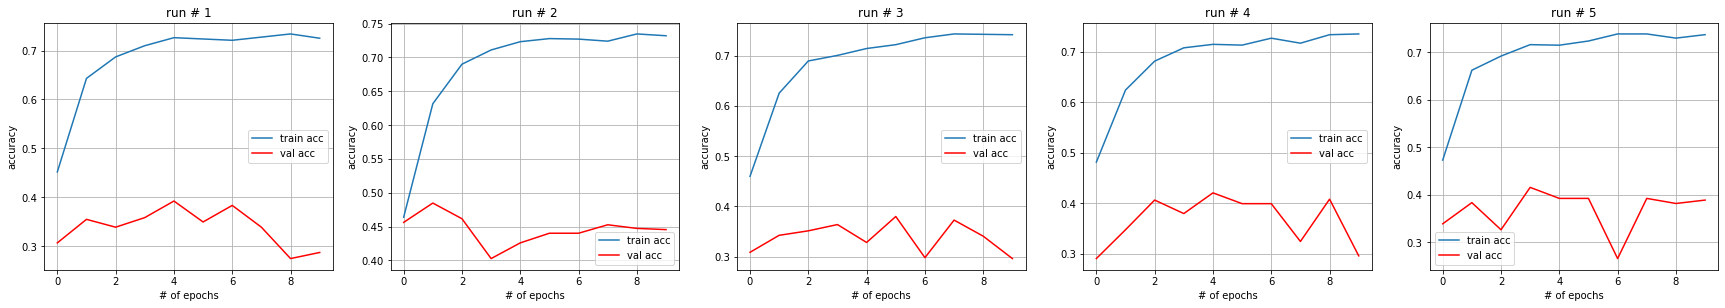

In [ ]:
plotting_five_runs(5,h_total_train_SGD3_Lr2,h_total_val_SGD3_Lr2)

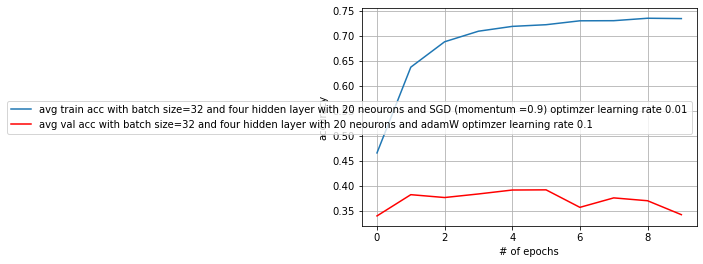

In [ ]:
h_avg_train=np.average(h_total_train_SGD3_Lr2,axis=0)
h_avg_val=np.average(h_total_val_SGD3_Lr2,axis=0)
plt.plot(h_avg_train)
plt.plot(h_avg_val, 'r')
plt.legend(['avg train acc with batch size=128 and four hidden layer with 20 neourons and SGD (momentum =0.9) optimzer learning rate 0.01', 'avg val acc with batch size=32 and four hidden layer with 20 neourons and adamW optimzer learning rate 0.1'])
plt.xlabel("# of epochs")
plt.ylabel("accuracy")
plt.grid()

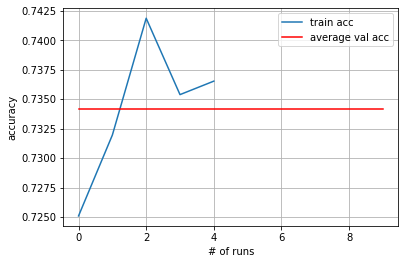

In [ ]:
plotting_train_acc_vs_average_train_acc(5,h_total_train_SGD3_Lr2,h_total_val_SGD3_Lr2)

# **With four hidden layer & 20 neouron and batch size = 128 with Optimezer=SGD (momentum =0.9) and learning rate =0.001**

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

In [ ]:
h_total_train_SGD3_Lr3=np.empty((0,10))
h_total_val_SGD3_Lr3=np.empty((0,10))
h_total_test_SGD3_Lr3=np.empty((0,10))
total_acc_SGD3_Lr3=[]

In [ ]:
h_total_train_SGD3_Lr3,h_total_val_SGD3_Lr3,h_total_test_SGD3_Lr3,total_acc_SGD3_Lr3=create_mlp_with_optimzer_get_total_acc(optimizer,X_train_pca,y_train,X_val_pca,y_val,X_test_pca,y_test)

Max & Min & Avarrage Training accuracy Using** Batch size =128** and eight hidden layer and 20 neourons and** SGD (momentum =0.5) optimzer and learning rate=0.01

In [ ]:
max_acc_train_SGD3_Lr3,min_acc_train_SGD3_Lr3,avg_acc_train_SGD3_Lr3=get_max_min_avg_acc(h_total_train_SGD3_Lr3)

In [ ]:
print(max(max_acc_train_SGD3_Lr3))
print(min(min_acc_train_SGD3_Lr3))
print(Average(avg_acc_train_SGD3_Lr3))

0.743413507938385
0.38449791073799133
0.6817640298604964


Max & Min & Avarrage Testing accuracy Using** Batch size =128** and eight hidden layer and 20 neourons and** SGD (momentum =0.9) optimzer and learning rate=0.001*

In [ ]:
max_acc_test_SGD3_Lr3,min_acc_test_SGD3_Lr3,avg_acc_test_SGD3_Lr3=get_max_min_avg_acc(total_acc_SGD3_Lr3)
print(max_acc_test_SGD3_Lr3,min_acc_test_SGD3_Lr3,avg_acc_test_SGD3_Lr3)

0    0.771836
dtype: float64 0    0.721925
dtype: float64 0.7454545378684998


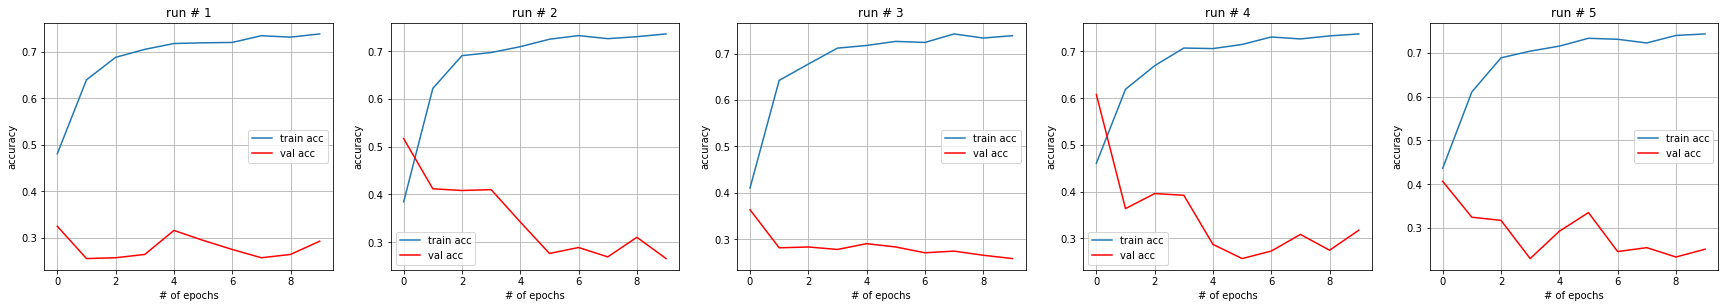

In [ ]:
plotting_five_runs(5,h_total_train_SGD3_Lr3,h_total_val_SGD3_Lr3)

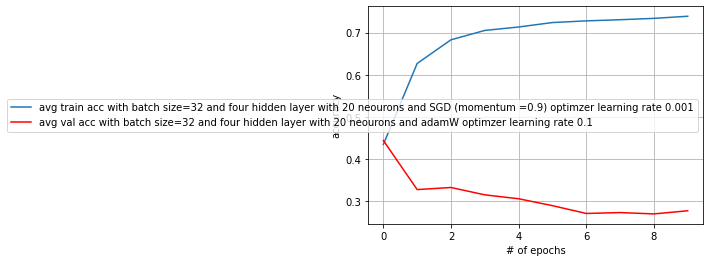

In [ ]:
h_avg_train=np.average(h_total_train_SGD3_Lr3,axis=0)
h_avg_val=np.average(h_total_val_SGD3_Lr3,axis=0)
plt.plot(h_avg_train)
plt.plot(h_avg_val, 'r')
plt.legend(['avg train acc with batch size=128 and four hidden layer with 20 neourons and SGD (momentum =0.9) optimzer learning rate 0.001', 'avg val acc with batch size=32 and four hidden layer with 20 neourons and adamW optimzer learning rate 0.1'])
plt.xlabel("# of epochs")
plt.ylabel("accuracy")
plt.grid()

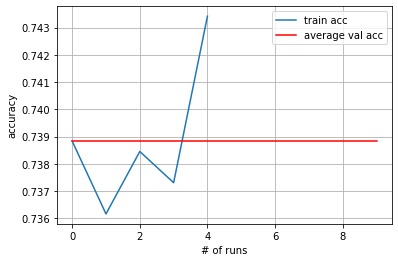

In [ ]:
plotting_train_acc_vs_average_train_acc(5,h_total_train_SGD3_Lr3,h_total_val_SGD3_Lr3)

# **With four hidden layer & 20 neouron and batch size = 128 with Optimezer=Rprop and learning rate =0.1**

In [ ]:
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.1)

In [ ]:
h_total_train_Rprop_Lr1=np.empty((0,10))
h_total_val_Rprop_Lr1=np.empty((0,10))
h_total_test_Rprop_Lr1=np.empty((0,10))
total_acc_Rprop_Lr1=[]

In [ ]:
h_total_train_Rprop_Lr1,h_total_val_Rprop_Lr1,h_total_test_Rprop_Lr1,total_acc_Rprop_Lr1=create_mlp_with_optimzer_get_total_acc(optimizer,X_train_pca,y_train,X_val_pca,y_val,X_test_pca,y_test)

Max & Min & Avarrage Training accuracy Using** Batch size =128** and eight hidden layer and 20 neourons and** Optimezer=Rprop and learning rate=0.1

In [ ]:
max_acc_train_Rprop_Lr1,min_acc_train_Rprop_Lr1,avg_acc_train_Rprop_Lr1=get_max_min_avg_acc(h_total_train_Rprop_Lr1)

In [ ]:
print(max(max_acc_train_Rprop_Lr1))
print(min(min_acc_train_Rprop_Lr1))
print(Average(avg_acc_train_Rprop_Lr1))

0.74837726354599
0.40397098660469055
0.6892936247587204


Max & Min & Avarrage Testing accuracy Using** Batch size =128** and eight hidden layer and 20 neourons and** Rprop optimzer and learning rate=0.1*

In [ ]:
max_acc_test_Rprop_Lr1,min_acc_test_Rprop_Lr1,avg_acc_test_Rprop_Lr1=get_max_min_avg_acc(total_acc_Rprop_Lr1)
print(max_acc_test_Rprop_Lr1,min_acc_test_Rprop_Lr1,avg_acc_test_Rprop_Lr1)

0    0.755793
dtype: float64 0    0.705882
dtype: float64 0.736898398399353


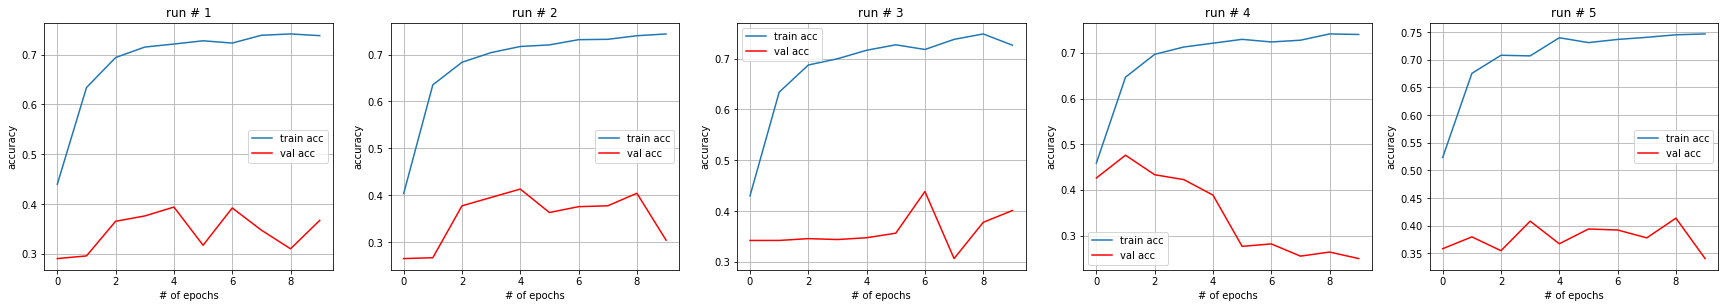

In [ ]:
plotting_five_runs(5,h_total_train_Rprop_Lr1,h_total_val_Rprop_Lr1)

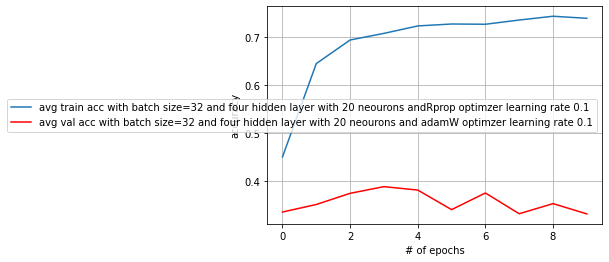

In [ ]:
h_avg_train=np.average(h_total_train_Rprop_Lr1,axis=0)
h_avg_val=np.average(h_total_val_Rprop_Lr1,axis=0)
plt.plot(h_avg_train)
plt.plot(h_avg_val, 'r')
plt.legend(['avg train acc with batch size=128 and four hidden layer with 20 neourons andRprop optimzer learning rate 0.1', 'avg val acc with batch size=32 and four hidden layer with 20 neourons and adamW optimzer learning rate 0.1'])
plt.xlabel("# of epochs")
plt.ylabel("accuracy")
plt.grid()

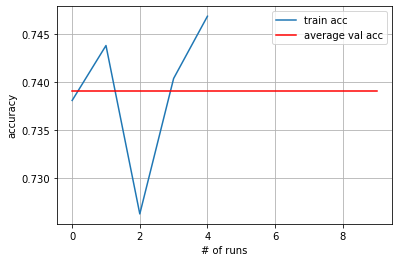

In [ ]:
plotting_train_acc_vs_average_train_acc(5,h_total_train_Rprop_Lr1,h_total_val_Rprop_Lr1)

# **With four hidden layer & 20 neouron and batch size = 128 with Optimezer=Rprop and learning rate =0.01**

In [ ]:
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.01)

In [ ]:
h_total_train_Rprop_Lr2=np.empty((0,10))
h_total_val_Rprop_Lr2=np.empty((0,10))
h_total_test_Rprop_Lr2=np.empty((0,10))
total_acc_Rprop_Lr2=[]

In [ ]:
h_total_train_Rprop_Lr2,h_total_val_Rprop_Lr2,h_total_test_Rprop_Lr2,total_acc_Rprop_Lr2=create_mlp_with_optimzer_get_total_acc(optimizer,X_train_pca,y_train,X_val_pca,y_val,X_test_pca,y_test)

Max & Min & Avarrage Training accuracy Using** Batch size =128** and eight hidden layer and 20 neourons and** Optimezer=Rprop and learning rate=0.01

In [ ]:
max_acc_train_Rprop_Lr2,min_acc_train_Rprop_Lr2,avg_acc_train_Rprop_Lr2=get_max_min_avg_acc(h_total_train_Rprop_Lr2)

In [ ]:
print(max(max_acc_train_Rprop_Lr2))
print(min(min_acc_train_Rprop_Lr2))
print(Average(avg_acc_train_Rprop_Lr2))

0.7533409595489502
0.41122564673423767
0.6853073662519454


Max & Min & Avarrage Testing accuracy Using** Batch size =128** and eight hidden layer and 20 neourons and** Rprop optimzer and learning rate=0.01*

In [ ]:
max_acc_test_Rprop_Lr2,min_acc_test_Rprop_Lr2,avg_acc_test_Rprop_Lr2=get_max_min_avg_acc(total_acc_Rprop_Lr2)
print(max_acc_test_Rprop_Lr2,min_acc_test_Rprop_Lr2,avg_acc_test_Rprop_Lr2)

0    0.746881
dtype: float64 0    0.720143
dtype: float64 0.7379679203033447


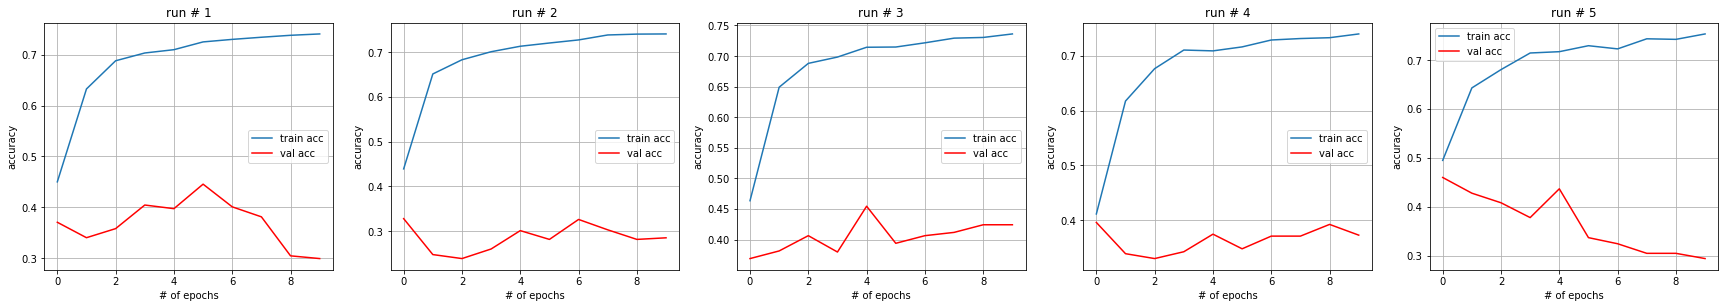

In [ ]:
plotting_five_runs(5,h_total_train_Rprop_Lr2,h_total_val_Rprop_Lr2)

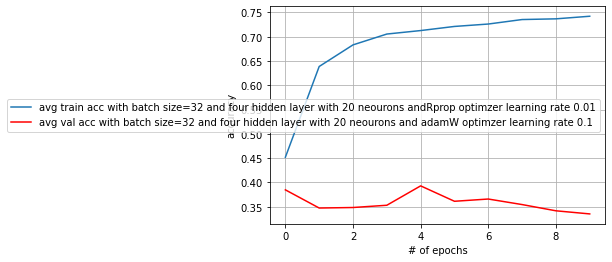

In [ ]:
h_avg_train=np.average(h_total_train_Rprop_Lr2,axis=0)
h_avg_val=np.average(h_total_val_Rprop_Lr2,axis=0)
plt.plot(h_avg_train)
plt.plot(h_avg_val, 'r')
plt.legend(['avg train acc with batch size=128 and four hidden layer with 20 neourons andRprop optimzer learning rate 0.01', 'avg val acc with batch size=32 and four hidden layer with 20 neourons and adamW optimzer learning rate 0.1'])
plt.xlabel("# of epochs")
plt.ylabel("accuracy")
plt.grid()

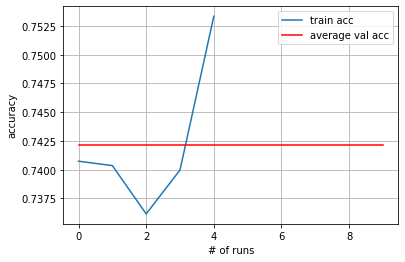

In [ ]:
plotting_train_acc_vs_average_train_acc(5,h_total_train_Rprop_Lr2,h_total_val_Rprop_Lr2)

# **With four hidden layer & 20 neouron and batch size = 128 with Optimezer=Rprop and learning rate =0.001**

In [ ]:
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)

In [ ]:
h_total_train_Rprop_Lr3=np.empty((0,10))
h_total_val_Rprop_Lr3=np.empty((0,10))
h_total_test_Rprop_Lr3=np.empty((0,10))
total_acc_Rprop_Lr3=[]

In [ ]:
h_total_train_Rprop_Lr3,h_total_val_Rprop_Lr3,h_total_test_Rprop_Lr3,total_acc_Rprop_Lr3=create_mlp_with_optimzer_get_total_acc(optimizer,X_train_pca,y_train,X_val_pca,y_val,X_test_pca,y_test)

Max & Min & Avarrage Training accuracy Using** Batch size =128** and eight hidden layer and 20 neourons and** Optimezer=Rprop and learning rate=0.001

In [ ]:
max_acc_train_Rprop_Lr3,min_acc_train_Rprop_Lr3,avg_acc_train_Rprop_Lr3=get_max_min_avg_acc(h_total_train_Rprop_Lr3)

In [ ]:
print(max(max_acc_train_Rprop_Lr3))
print(min(min_acc_train_Rprop_Lr3))
print(Average(avg_acc_train_Rprop_Lr3))

0.7468499541282654
0.4303169250488281
0.6858190137147904


Max & Min & Avarrage Testing accuracy Using** Batch size =128** and eight hidden layer and 20 neourons and** Rprop optimzer and learning rate=0.001*

In [ ]:
max_acc_test_Rprop_Lr3,min_acc_test_Rprop_Lr3,avg_acc_test_Rprop_Lr3=get_max_min_avg_acc(total_acc_Rprop_Lr3)
print(max_acc_test_Rprop_Lr3,min_acc_test_Rprop_Lr3,avg_acc_test_Rprop_Lr3)

0    0.752228
dtype: float64 0    0.714795
dtype: float64 0.734402847290039


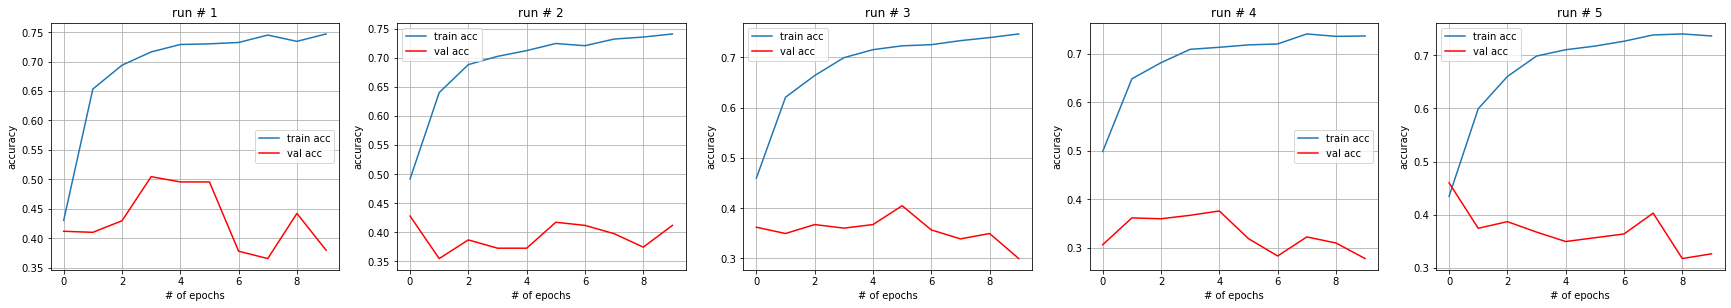

In [ ]:
plotting_five_runs(5,h_total_train_Rprop_Lr3,h_total_val_Rprop_Lr3)

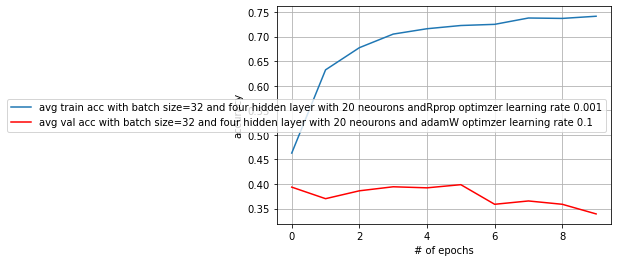

In [ ]:
h_avg_train=np.average(h_total_train_Rprop_Lr3,axis=0)
h_avg_val=np.average(h_total_val_Rprop_Lr3,axis=0)
plt.plot(h_avg_train)
plt.plot(h_avg_val, 'r')
plt.legend(['avg train acc with batch size=128 and four hidden layer with 20 neourons andRprop optimzer learning rate 0.001', 'avg val acc with batch size=32 and four hidden layer with 20 neourons and adamW optimzer learning rate 0.1'])
plt.xlabel("# of epochs")
plt.ylabel("accuracy")
plt.grid()

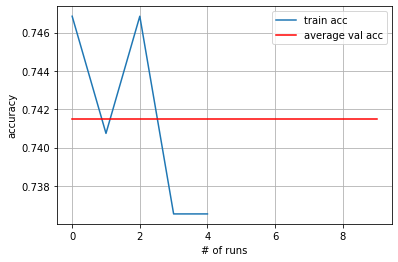

In [ ]:
plotting_train_acc_vs_average_train_acc(5,h_total_train_Rprop_Lr3,h_total_val_Rprop_Lr3)

# **Q3.4) Activation functions ****	

# Firstly using Relu activation function # 
**With four One layer & 20 neouron and batch size = 128 with Optimezer=SGD (momentum =0.1) and learning rate =0.001** The highest valdiation accuracy 

In [1]:
h_total_train_ReluFun=np.empty((0,10))
h_total_val_ReluFun=np.empty((0,10))
h_total_test_ReluFun=np.empty((0,10))
total_acc_ReluFun=[]

NameError: name 'np' is not defined

In [66]:
def create_mlp_with_actvationFun_get_total_acc(actvation_fun,X_train_pca,y_train,X_val_pca,y_val,X_test_pca,y_test):
  #add another hidden layer to test the performance
  h_total_train=np.empty((0,10))
  h_total_val=np.empty((0,10))
  h_total_test=np.empty((0,10))
  total_acc=[]
  number_of_runs=5
  for i in range(number_of_runs):
    
    mlp=keras.models.Sequential()
    mlp.add(keras.layers.Dense(20, activation=actvation_fun, ))
    # mlp.add(keras.layers.Dense(40, activation=actvation_fun, ))
    # mlp.add(keras.layers.Dense(40, activation=actvation_fun, ))
    # mlp.add(keras.layers.Dense(40, activation=actvation_fun, ))
  
    mlp.add(keras.layers.Dense(6, activation='softmax', ))
    

    optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.1)
    mlp.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    h = mlp.fit(X_train_pca,y_train,validation_data =(X_val_pca, y_val), epochs=10,verbose=0,batch_size=128)
    h_total_train=np.append(h_total_train,np.array([h.history['accuracy']]),axis=0)
    h_total_val=np.append(h_total_val,np.array([h.history['val_accuracy']]),axis=0)

    total_acc.append(mlp.evaluate(X_test_pca,y_test, verbose=0)[1])
  return h_total_train,h_total_val,h_total_test,total_acc

In [ ]:
activation_function='relu'
h_total_train_ReluFun,h_total_val_ReluFun,h_total_test_ReluFun,total_acc_ReluFun=create_mlp_with_actvationFun_get_total_acc(activation_function,X_train_pca,y_train,X_val_pca,y_val,X_test_pca,y_test)

Max & Min & Avarrage Training accuracy Using** Batch size =128** and eight hidden layer and 20 neourons and** adamW optimzer and learning rate=0.1 and Activation function=Relu

In [ ]:
max_acc_train_ReluFun,min_acc_train_ReluFun,avg_acc_train_ReluFun=get_max_min_avg_acc(h_total_train_ReluFun)

Max & Min & Avarrage Testing accuracy Using** Batch size =128** and eight hidden layer and 20 neourons and** adamW optimzer and learning rate=0.1 and Activation function=Relu

In [ ]:
print(max(max_acc_train_ReluFun))
print(min(min_acc_train_ReluFun))
print(Average(avg_acc_train_ReluFun))

0.3848797380924225
0.15005727112293243
0.2964261165261269


In [ ]:
max_acc_test_ReluFun,min_acc_test_ReluFun,avg_acc_test_ReluFun=get_max_min_avg_acc(total_acc_ReluFun)
print(max_acc_test_ReluFun,min_acc_test_ReluFun,avg_acc_test_ReluFun)

0    0.409982
dtype: float64 0    0.292335
dtype: float64 0.3554367184638977


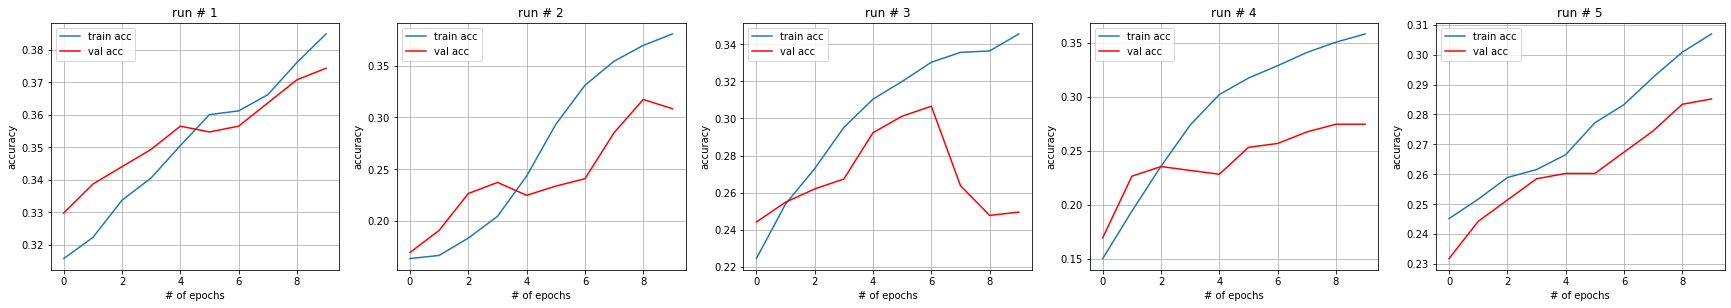

In [ ]:
plotting_five_runs(5,h_total_train_ReluFun,h_total_val_ReluFun)

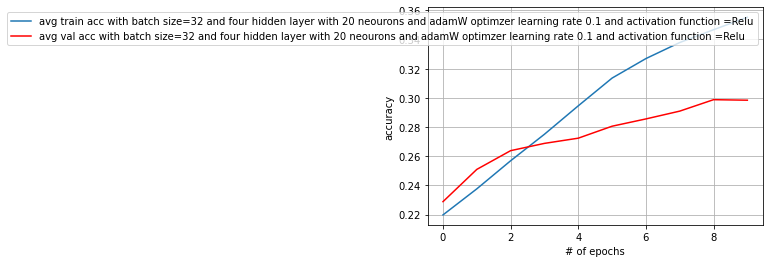

In [ ]:
h_avg_train=np.average(h_total_train_ReluFun,axis=0)
h_avg_val=np.average(h_total_val_ReluFun,axis=0)
plt.plot(h_avg_train)
plt.plot(h_avg_val, 'r')
plt.legend(['avg train acc with batch size=128 and four hidden layer with 20 neourons and adamW optimzer learning rate 0.1 and activation function =Relu', 'avg val acc with batch size=32 and four hidden layer with 20 neourons and adamW optimzer learning rate 0.1 and activation function =Relu'])
plt.xlabel("# of epochs")
plt.ylabel("accuracy")
plt.grid()

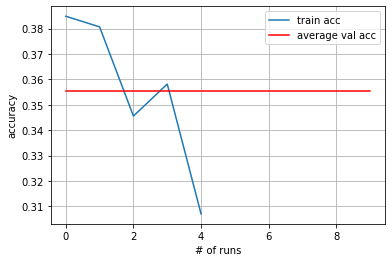

In [ ]:
plotting_train_acc_vs_average_train_acc(5,h_total_train_ReluFun,h_total_val_ReluFun)

# Secondly using Leaky Relu activation function

In [ ]:
h_total_train_LeakyReluFun=np.empty((0,10))
h_total_val_LeakyReluFun=np.empty((0,10))
h_total_test_LeakyReluFun=np.empty((0,10))
total_acc_LeakyReluFun=[]

In [ ]:
activation_function='LeakyReLU'
h_total_train_LeakyReluFun,h_total_val_LeakyReluFun,h_total_test_LeakyReluFun,total_acc_aLeakyReluFun=create_mlp_with_actvationFun_get_total_acc(activation_function,X_train_pca,y_train,X_val_pca,y_val,X_test_pca,y_test)

Max & Min & Avarrage Training accuracy Using** Batch size =128** and eight hidden layer and 20 neourons and** adamW optimzer and learning rate=0.1 and Activation function= Leaky Relu

In [ ]:
max_acc_train_LeakyReluFun,min_acc_train_LeakyReluFun,avg_acc_train_LeakyReluFun=get_max_min_avg_acc(h_total_train_LeakyReluFun)

In [ ]:
print(max(max_acc_train_LeakyReluFun))
print(min(min_acc_train_LeakyReluFun))
print(Average(avg_acc_train_LeakyReluFun))

0.4967544972896576
0.05765559524297714
0.3504314623773098


In [ ]:
total_acc_aLeakyReluFun

[0.36185383796691895,
 0.42959001660346985,
 0.4260249435901642,
 0.44028520584106445,
 0.5098039507865906]

Max & Min & Avarrage Testing accuracy Using** Batch size =128** and eight hidden layer and 20 neourons and** adamW optimzer and learning rate=0.1 and Activation function= Leaky Relu

In [ ]:
max_acc_test_LeakyReluFun,min_acc_test_LeakyReluFun,avg_acc_test_LeakyReluFun=get_max_min_avg_acc(total_acc_aLeakyReluFun)
print(max_acc_test_LeakyReluFun,min_acc_test_LeakyReluFun,avg_acc_test_LeakyReluFun)

0    0.509804
dtype: float64 0    0.361854
dtype: float64 0.4335115909576416


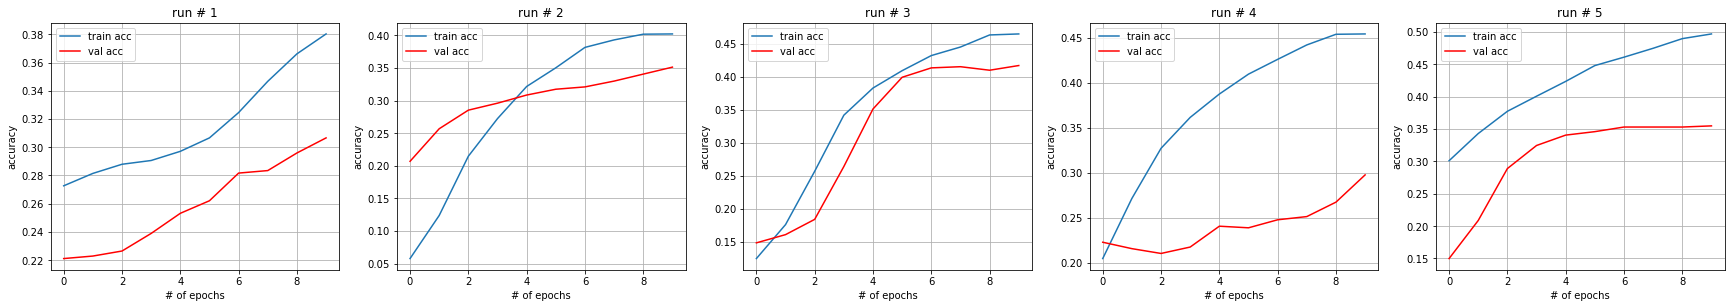

In [ ]:
plotting_five_runs(5,h_total_train_LeakyReluFun,h_total_val_LeakyReluFun)

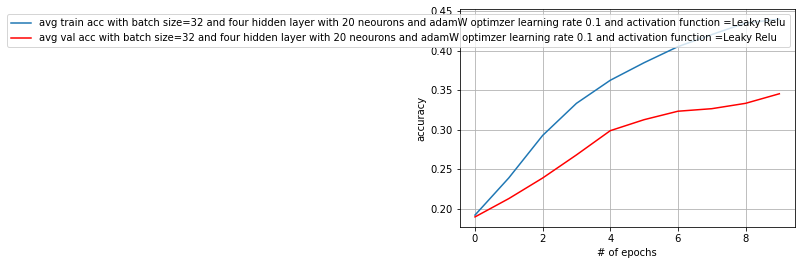

In [ ]:
h_avg_train=np.average(h_total_train_LeakyReluFun,axis=0)
h_avg_val=np.average(h_total_val_LeakyReluFun,axis=0)
plt.plot(h_avg_train)
plt.plot(h_avg_val, 'r')
plt.legend(['avg train acc with batch size=32 and four hidden layer with 20 neourons and adamW optimzer learning rate 0.1 and activation function =Leaky Relu', 'avg val acc with batch size=32 and four hidden layer with 20 neourons and adamW optimzer learning rate 0.1 and activation function =Leaky Relu'])
plt.xlabel("# of epochs")
plt.ylabel("accuracy")
plt.grid()

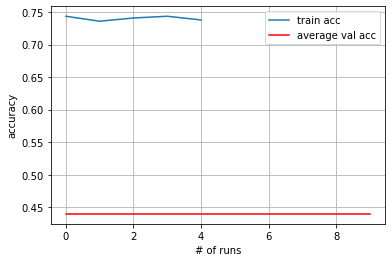

In [ ]:
plotting_train_acc_vs_average_train_acc(5,h_total_train_adamW_Lr1,h_total_val_adamW_Lr1)

# Thirdly using Leaky Sigmoid activation function

In [ ]:
h_total_train_LeakySigmoid=np.empty((0,10))
h_total_val_LeakySigmoid=np.empty((0,10))
h_total_test_LeakySigmoid=np.empty((0,10))
total_acc_LeakySigmoid=[]

In [ ]:
activation_function='sigmoid'
h_total_train_LeakySigmoid,h_total_val_LeakySigmoid,h_total_test_LeakySigmoid,total_acc_LeakySigmoid=create_mlp_with_actvationFun_get_total_acc(activation_function,X_train_pca,y_train,X_val_pca,y_val,X_test_pca,y_test)

Max & Min & Avarrage Training accuracy Using** Batch size =128** and eight hidden layer and 20 neourons and** adamW optimzer and learning rate=0.1 and Activation function=Leaky Sigmoid

In [ ]:
max_acc_train_LeakySigmoid,min_acc_train_LeakySigmoid,avg_acc_train_LeakySigmoid=get_max_min_avg_acc(h_total_train_LeakySigmoid)

In [ ]:
print(max(max_acc_train_LeakySigmoid))
print(min(min_acc_train_LeakySigmoid))
print(Average(avg_acc_train_LeakySigmoid))

0.25544100999832153
0.027873234823346138
0.2392516190186143


Max & Min & Avarrage Testing accuracy Using** Batch size =128** and eight hidden layer and 20 neourons and** adamW optimzer and learning rate=0.1 and Activation function=Leaky Sigmoid

In [ ]:
max_acc_test_LeakySigmoid,min_acc_test_LeakySigmoid,avg_acc_test_LeakySigmoid=get_max_min_avg_acc(total_acc_LeakySigmoid)
print(max_acc_test_LeakySigmoid,min_acc_test_LeakySigmoid,avg_acc_test_LeakySigmoid)

0    0.226381
dtype: float64 0    0.226381
dtype: float64 0.22638146579265594


In [ ]:
plotting_five_runs(5,h_total_train_LeakySigmoid,h_total_val_LeakySigmoid)

In [ ]:
h_avg_train=np.average(h_total_train_LeakySigmoid,axis=0)
h_avg_val=np.average(h_total_val_LeakySigmoid,axis=0)
plt.plot(h_avg_train)
plt.plot(h_avg_val, 'r')
plt.legend(['avg train acc with batch size=128 and four hidden layer with 20 neourons and adamW optimzer learning rate 0.1 and activation function = Leaky Sigmoid', 'avg val acc with batch size=32 and four hidden layer with 20 neourons and adamW optimzer learning rate 0.1 and activation function = Leaky Sigmoid'])
plt.xlabel("# of epochs")
plt.ylabel("accuracy")
plt.grid()

In [ ]:
plotting_train_acc_vs_average_train_acc(5,h_total_train_LeakySigmoid,h_total_val_LeakySigmoid)

# Finally using Tanh Sigmoid activation function

In [ ]:
h_total_train_TanhSigmoid=np.empty((0,10))
h_total_val_TanhSigmoid=np.empty((0,10))
h_total_test_TanhSigmoid=np.empty((0,10))
total_acc_TanhSigmoid=[]

In [ ]:
activation_function='tanh'
h_total_train_TanhSigmoid,h_total_val_TanhSigmoid,h_total_test_TanhSigmoid,total_acc_TanhSigmoid=create_mlp_with_actvationFun_get_total_acc(activation_function,X_train_pca,y_train,X_val_pca,y_val,X_test_pca,y_test)

Max & Min & Avarrage Training accuracy Using** Batch size =128** and eight hidden layer and 20 neourons and** adamW optimzer and learning rate=0.1 and Activation function=Tanh Sigmoid

In [ ]:
max_acc_train_TanhSigmoid,min_acc_train_TanhSigmoid,avg_acc_train_TanhSigmoid=get_max_min_avg_acc(h_total_train_TanhSigmoid)

Max & Min & Avarrage Testing accuracy Using** Batch size =128** and eight hidden layer and 20 neourons and** adamW optimzer and learning rate=0.1 and Activation function=Tanh Sigmoid

In [ ]:
max_acc_test_TanhSigmoid,min_acc_test_TanhSigmoid,avg_acc_test_TanhSigmoid=get_max_min_avg_acc(total_acc_TanhSigmoid)
print(max_acc_test_TanhSigmoid,min_acc_test_TanhSigmoid,avg_acc_test_aTanhSigmoid)

In [ ]:
plotting_five_runs(5,h_total_train_TanhSigmoid,h_total_val_TanhSigmoid)

In [ ]:
h_avg_train=np.average(h_total_train_TanhSigmoid,axis=0)
h_avg_val=np.average(h_total_val_TanhSigmoid,axis=0)
plt.plot(h_avg_train)
plt.plot(h_avg_val, 'r')
plt.legend(['avg train acc with batch size=128 and four hidden layer with 20 neourons and adamW optimzer learning rate 0.1 and activation function =Tanh Sigmoid', 'avg val acc with batch size=32 and four hidden layer with 20 neourons and adamW optimzer learning rate 0.1 and activation function =Tanh Sigmoid'])
plt.xlabel("# of epochs")
plt.ylabel("accuracy")
plt.grid()

In [ ]:
plotting_train_acc_vs_average_train_acc(5,h_total_train_TanhSigmoid,h_total_val_TanhSigmoid)

# (3.5) Bonus Question

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Epoch 1/100
21/21 [==============================] - 1s 27ms/step - loss: 1.8738 - accuracy: 0.1963 - val_loss: 1.8061 - val_accuracy: 0.1979
Epoch 2/100
21/21 [==============================] - 0s 8ms/step - loss: 1.7561 - accuracy: 0.2283 - val_loss: 1.7083 - val_accuracy: 0.2317
Epoch 3/100
21/21 [==============================] - 0s 8ms/step - loss: 1.6652 - accuracy: 0.2707 - val_loss: 1.6296 - val_accuracy: 0.2799
Epoch 4/100
21/21 [==============================] - 0s 7ms/step - loss: 1.5876 - accuracy: 0.3303 - val_loss: 1.5594 - val_accuracy: 0.3529
Epoch 5/100
21/21 [==============================] - 0s 11ms/step - loss: 1.5174 - accuracy: 0.3963 - val_loss: 1.4926 - val_accuracy: 0.3957
Epoch 6/100
21/21 [==============================] - 0s 10ms/step - loss: 1.4508 - accuracy: 0.4353 - val_loss: 1.4273 - val_accuracy: 0.4635
Epoch 7/100
21/21 [==============================] -

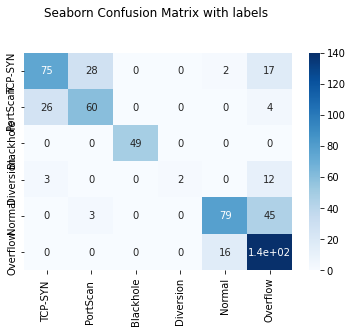

Epoch 1/100
21/21 [==============================] - 1s 10ms/step - loss: 1.9079 - accuracy: 0.2554 - val_loss: 1.8520 - val_accuracy: 0.2620
Epoch 2/100
21/21 [==============================] - 0s 4ms/step - loss: 1.7751 - accuracy: 0.3032 - val_loss: 1.7385 - val_accuracy: 0.3048
Epoch 3/100
21/21 [==============================] - 0s 4ms/step - loss: 1.6768 - accuracy: 0.3429 - val_loss: 1.6519 - val_accuracy: 0.3494
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 1.6001 - accuracy: 0.3803 - val_loss: 1.5750 - val_accuracy: 0.3886
Epoch 5/100
21/21 [==============================] - 0s 4ms/step - loss: 1.5306 - accuracy: 0.4200 - val_loss: 1.5049 - val_accuracy: 0.4349
Epoch 6/100
21/21 [==============================] - 0s 4ms/step - loss: 1.4636 - accuracy: 0.4551 - val_loss: 1.4355 - val_accuracy: 0.4563
Epoch 7/100
21/21 [==============================] - 0s 4ms/step - loss: 1.3970 - accuracy: 0.4857 - val_loss: 1.3676 - val_accuracy: 0.4777
Epoch 8/100


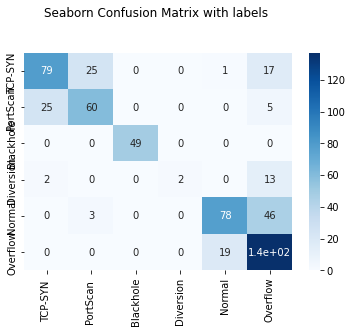

Epoch 1/100
21/21 [==============================] - 1s 10ms/step - loss: 1.9491 - accuracy: 0.1970 - val_loss: 1.8112 - val_accuracy: 0.2371
Epoch 2/100
21/21 [==============================] - 0s 3ms/step - loss: 1.7712 - accuracy: 0.2455 - val_loss: 1.6542 - val_accuracy: 0.3048
Epoch 3/100
21/21 [==============================] - 0s 4ms/step - loss: 1.6296 - accuracy: 0.3093 - val_loss: 1.5278 - val_accuracy: 0.3957
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 1.5145 - accuracy: 0.3948 - val_loss: 1.4273 - val_accuracy: 0.4563
Epoch 5/100
21/21 [==============================] - 0s 4ms/step - loss: 1.4247 - accuracy: 0.4433 - val_loss: 1.3496 - val_accuracy: 0.5027
Epoch 6/100
21/21 [==============================] - 0s 4ms/step - loss: 1.3517 - accuracy: 0.4746 - val_loss: 1.2879 - val_accuracy: 0.5223
Epoch 7/100
21/21 [==============================] - 0s 4ms/step - loss: 1.2920 - accuracy: 0.4945 - val_loss: 1.2345 - val_accuracy: 0.5312
Epoch 8/100


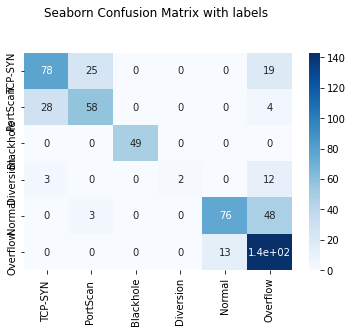

Epoch 1/100
21/21 [==============================] - 1s 11ms/step - loss: 2.1345 - accuracy: 0.2005 - val_loss: 1.9635 - val_accuracy: 0.2478
Epoch 2/100
21/21 [==============================] - 0s 4ms/step - loss: 1.9371 - accuracy: 0.2455 - val_loss: 1.8011 - val_accuracy: 0.2923
Epoch 3/100
21/21 [==============================] - 0s 4ms/step - loss: 1.7788 - accuracy: 0.2806 - val_loss: 1.6721 - val_accuracy: 0.3405
Epoch 4/100
21/21 [==============================] - 0s 4ms/step - loss: 1.6564 - accuracy: 0.3200 - val_loss: 1.5726 - val_accuracy: 0.3868
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 1.5629 - accuracy: 0.3669 - val_loss: 1.4940 - val_accuracy: 0.4367
Epoch 6/100
21/21 [==============================] - 0s 4ms/step - loss: 1.4886 - accuracy: 0.4257 - val_loss: 1.4329 - val_accuracy: 0.4848
Epoch 7/100
21/21 [==============================] - 0s 4ms/step - loss: 1.4290 - accuracy: 0.4658 - val_loss: 1.3795 - val_accuracy: 0.5134
Epoch 8/100


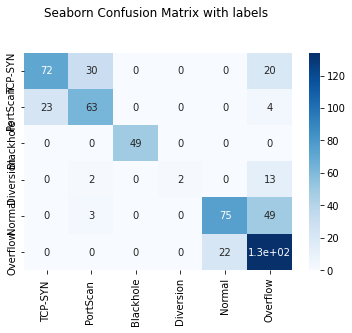

Epoch 1/100
21/21 [==============================] - 1s 16ms/step - loss: 1.9249 - accuracy: 0.2047 - val_loss: 1.8435 - val_accuracy: 0.1943
Epoch 2/100
21/21 [==============================] - 0s 6ms/step - loss: 1.7695 - accuracy: 0.2596 - val_loss: 1.7045 - val_accuracy: 0.2585
Epoch 3/100
21/21 [==============================] - 0s 5ms/step - loss: 1.6504 - accuracy: 0.3356 - val_loss: 1.5981 - val_accuracy: 0.3690
Epoch 4/100
21/21 [==============================] - 0s 6ms/step - loss: 1.5558 - accuracy: 0.4219 - val_loss: 1.5130 - val_accuracy: 0.4207
Epoch 5/100
21/21 [==============================] - 0s 6ms/step - loss: 1.4778 - accuracy: 0.4593 - val_loss: 1.4393 - val_accuracy: 0.4742
Epoch 6/100
21/21 [==============================] - 0s 6ms/step - loss: 1.4101 - accuracy: 0.4971 - val_loss: 1.3767 - val_accuracy: 0.5169
Epoch 7/100
21/21 [==============================] - 0s 6ms/step - loss: 1.3504 - accuracy: 0.5220 - val_loss: 1.3200 - val_accuracy: 0.5383
Epoch 8/100


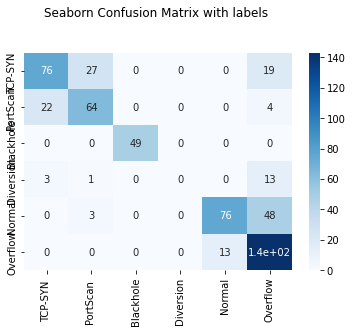

In [82]:
from tensorflow import keras
!pip install tensorflow_addons 
import tensorflow_addons as tfa
from keras.layers import Input, Dense, Flatten
from keras.models import Model
#rom keras_adamw import AdamW
from sklearn.metrics import confusion_matrix
import numpy as np

h_total_train= []
h_total_val= []
loss_train=[]
loss_test=[]
total_acc=[]
confusion=[]
number_of_runs=5
model = keras.models.Sequential()
for i in range(number_of_runs):
    #ptimizer=tfaAdamw.optimizers.AdamW(learning_rate= 0.001, weight_decay= 0.001)
    optimizer=tfa.optimizers.AdamW(learning_rate= 0.001, weight_decay= 0.001)
    model = keras.models.Sequential()
    model.add(Dense(10, input_shape = (21,), activation = 'relu'))
    model.add(Dense(6, activation = "softmax"))
    model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics = ["accuracy"])
    model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_test, y_test))
    model.history.history
    h_total_train.append(model.history.history['accuracy'])
    h_total_val.append(model.history.history['val_accuracy'])
    loss_train.append(model.history.history['loss'])
    loss_test.append(model.history.history['val_loss'])
    total_acc.append(model.evaluate(X_test,y_test, verbose=0)[1])

    y_pred = np.argmax(model.predict(X_test), axis=-1)
    data= confusion_matrix(y_test, y_pred)
    confusion.append(data)
    labels =['TCP-SYN ','PortScan ','Blackhole','Diversion','Normal','Overflow']
    from sklearn.metrics import confusion_matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    import seaborn as sns

    ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

    ax.set_title('Seaborn Confusion Matrix with labels \n\n');
    #ax.set_xlabel('\nPredicted Values')
    #ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['TCP-SYN ','PortScan ','Blackhole','Diversion','Normal','Overflow'])
    ax.yaxis.set_ticklabels(['TCP-SYN ','PortScan ','Blackhole','Diversion','Normal','Overflow'])
    plt.xticks(rotation = 90) 

    ## Display the visualization of the Confusion Matrix.
    plt.show()


In [85]:
max_acc_tun=(max(h_total_train))
print(max(max_acc_tun))

0.7254677414894104
